<h1 style="text-align: center;"><img class="responsive" style="float: left;" src="https://is1-ssl.mzstatic.com/image/thumb/Purple112/v4/b5/6e/20/b56e2053-ccd2-d63f-e0fb-a1bf3774eb0b/AppIcon-0-0-1x_U007emarketing-0-0-0-10-0-0-sRGB-0-0-0-GLES2_U002c0-512MB-85-220-0-0.png/230x0w.webp" alt="" width="143" height="143" /></h1>
<h1 style="text-align: center;"><img class="responsive" style="font-size: 14px; float: right;" src="https://i0.wp.com/mosefparis1.fr/wp-content/uploads/2022/10/cropped-image-1.png?fit=532%2C540&amp;ssl=1" alt="" width="163" height="165" /></h1>
<h1 style="text-align: center;"><span style="color: #000080; font-family: arial, helvetica, sans-serif;"><strong style="font-size: 24pt;">LCL Challenge</strong></span></h1>
<p style="text-align: center;"><span style="font-size: 14pt;">Scoring Immobilier: Syst&egrave;me Expert BEST&nbsp;IMMO</span></p>
<p style="text-align: center;"><span style="font-size: 10pt; font-family: verdana, geneva, sans-serif;">Lucie Gabagnou,&nbsp;Ghiles Idris,&nbsp;Armand L'Huillier,&nbsp;Yanis Rehoune</span></p>

Ce projet se fait dans le cadre d'un challenge proposé par Mohamed Sneiba Hamoud. Le but est de challenger le modèle de scoring existant dans l'octroi de crédit immobilier.
Les milestones de sont projets sont les suivantes: 
- Vision globale de la base de données: étude de la période + constitution des échantillons
- Preprocessing sur l'ensemble des variables (valeurs manquantes, traitement de types, etc..)
- Sélection de variables (Lasso et tests univariés avec target) + réflexion nouvelles variables
- Discrétisation des variables quantitatives + regroupement de modalités des variables qualitatives (inclut data viz stabilité)
- Modélisation classique: régression logistique + performances
- Modélisation alternative: modèle challengeant
- Grille de score



# Installation de l'environnement de travail

### Packages

In [1]:
# import des modules
#import scipy.stats as stats

from scipy import stats
from scipy.stats import pointbiserialr
import scipy
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection  import train_test_split,GridSearchCV,StratifiedKFold
import warnings 
warnings.filterwarnings("ignore")
import sklearn
from sklearn.linear_model import LogisticRegression
from scripts.firststep_dataviz import min_max_for_datetime_col,missing_rate_report,stabilite_global_temps
from scripts.processing import convert_modalities_to_quali,na_sup_20_fill_by_0_vs_autres,comparer_na_variables_doublons,fill_by_0,imputation_for_na,get_dummies_var,drop_columns,proxys_processing,replace_if_not_in
from scripts.feature_selection import test_chi2_all_quali_variables, test_pointbiserial_all_quanti_variables,cramers_v_all_cat_var,selection_avec_lasso,non_significativité_chi2
from scripts.discretisation import discretisation_variables_from_chi2,verification_par_moyenne_defaut, get_binned_df
from scripts.group_cat_variables import liste_quali_a_regrouper, replace_encoding_by_real_mod, regrouper_modalites,group_modalities_with_optbinning,encoding_col_and_cat
from scripts.stability_pipeline import pipeline, intervalles_semestre, intervalles_annee, stability_according_to_the_target, stability_by_repartition_of_modalities, stability_by_repartition_of_defaults

In [2]:
#Importation des données
raw_data = pd.read_excel("data/Bases_recents.xlsx")

In [3]:
display(raw_data)

region_cri  date_debloc_avec_crd DAT_VALIDE_ACCORD_CRI  nb_pret  \
0          ILE DE FRANCE                201405            2010-12-01        1   
1          ILE DE FRANCE                201405            2011-03-14        2   
2                   PACA                201407            2011-06-21        1   
3               AUVERGNE                201404            2011-06-27        1   
4          ILE DE FRANCE                201404            2011-09-29        3   
...                  ...                   ...                   ...      ...   
114411  PAYS DE LA LOIRE                201804            2018-04-06        1   
114412          AUVERGNE                201804            2018-03-29        2   
114413     ILE DE FRANCE                201804            2018-03-28        1   
114414          BRETAGNE                201804            2018-03-29        1   
114415     ILE DE FRANCE                201804            2018-03-30        2   

        TOP_CONNU_BRP  TOP_SCI_BRP  ASU_BIEN_FIN_BRP  NAT_BIEN_FIN_BRP  \
0                   0            0                40                10   
1                   0            0                10                10   
2                   0            0                40                20   
3                   0            0                20                20   
4                   0            0                10                10   
...               ...          ...               ...               ...   
114411              0            0                10                20   
114412              0            0                10                10   
114413              0            0                10                10   
114414              0            0                20                20   
114415              0            0                10                10   

        NBR_INT_BRP  NBR_TOT_COEMPR_CRI  ... Mt_credit_nb_ans_rev_prof  \
0                 2                   1  ...                  3.140729   
1                 2                   1  ...                  0.999205   
2                 1                   0  ...                  4.375182   
3                 2                   1  ...                  2.006637   
4                 1                   0  ...                  4.536824   
...             ...                 ...  ...                       ...   
114411            2                   1  ...                  3.743370   
114412            1                   0  ...                  3.726499   
114413            2                   1  ...                  6.028812   
114414            2                   1  ...                  3.269921   
114415            2                   1  ...                  5.005622   

        Epargne_nb_ans_rev_prof rentabilite_loc  financement_tot   quotite  \
0                           NaN             NaN         301510.0  1.083166   
1                           NaN             NaN         190962.0  0.310507   
2                           NaN             NaN         105000.0  1.000000   
3                      0.389825             NaN         215280.0  0.800000   
4                      0.287687             NaN         177700.0  0.585158   
...                         ...             ...              ...       ...   
114411                 2.582877             NaN         252670.0  1.052792   
114412                      NaN             NaN         244000.0  1.000000   
114413                 0.697618             NaN         345680.0  1.002698   
114414                      NaN             NaN         147330.0  1.091333   
114415                 0.540564             NaN         231500.0  0.926000   

        top_locatif  top_pret_int_ext  top_autre_pret_int  top_autre_pret_ext  \
0                 1                 0                   0                   0   
1                 0                 0                   0                   0   
2                 1                 0                   0                   0   
3 

# Etude générale
- Observations de la base, partiulièrement la période étudiée
- Choix de la date de découpage Temps/ Hors-temps
- Constitution des échantillons 
- Map


#### Définition de la période d'étude
Rq: la date à considérer au cours de l'étude est la date de déblocage et non la date de validation

In [4]:
#Conversion format date
date_columns=["DAT_VALIDE_ACCORD_CRI","date_debloc_avec_crd"]
raw_data["date_debloc_avec_crd"]=pd.to_datetime(raw_data["date_debloc_avec_crd"],format="%Y%m")

In [5]:
for col in date_columns:
    min_max_for_datetime_col(raw_data,col)

Date minimale pour DAT_VALIDE_ACCORD_CRI: 2014-04-01 00:00:00
Date maximale pour DAT_VALIDE_ACCORD_CRI: 2018-04-01 00:00:00
Date minimale pour date_debloc_avec_crd: 2014-04-01 00:00:00
Date maximale pour date_debloc_avec_crd: 2018-04-01 00:00:00


#### Stabilité dans le temps?

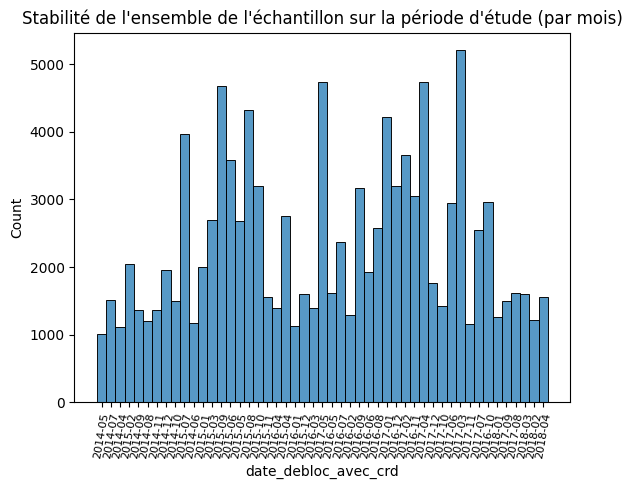

<Figure size 1400x1400 with 0 Axes>

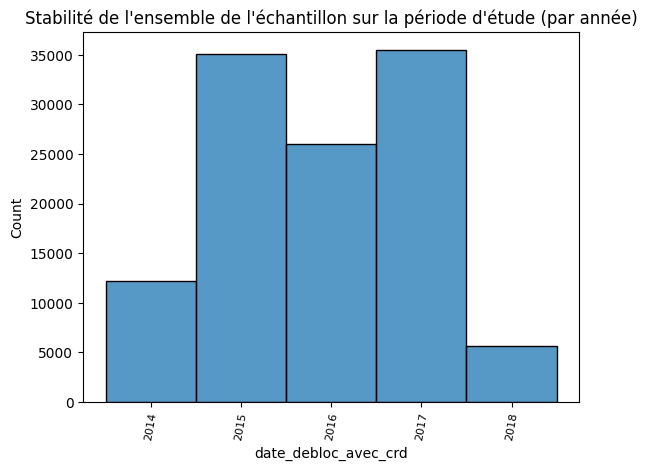

<Figure size 1400x1400 with 0 Axes>

In [6]:
stabilite_global_temps(raw_data)

Même si la base de données semble comporter des valeurs "extrêmes" (au delà de 3000 observations), il n'y a pas une distribution asymétrique entre les années (les données se comportent de la même façon au sein d'une année). On peut donc envisager un découpage hors-temps classique. Par année, le nombre d'observations peut  être différent mais cela peut être largement expliqué par le fait que les années ne sont pas complètes (pour 2014 et 2018).

In [7]:
# Vérification des moyennes sur les potentielles base temps or temps 
print('base OOT :' , raw_data[raw_data["date_debloc_avec_crd"]>"2017-04-01"].mean()['defaut_36mois'] )
print('base principale :', raw_data[(raw_data["date_debloc_avec_crd"]<="2017-04-01") & (raw_data["date_debloc_avec_crd"]>= "2014-04-01"  ) ].mean()['defaut_36mois'] )



base OOT : 0.009738727530138573
base principale : 0.0063661409112362385


Les gens qui ont octroyé un prêt après 04/2017 ont eu plus de défaut sur cette période. On aura sûrement moins de facilité à trouver le défaut sachant que la base OOT a plus d'observations en moyenne comportant des défauts.
Remarque: une explication plausible du taux de défaut plus élevé pourraît être la crise de covid. En effet, les clients considérés à partir d'avril 2017 ont été observés jusqu'en avril 2021 (au max). Cela signifie, contrairement aux autres clients, qu'ils ont connu la crise du covid et la récession qui s'en suit. Peut-être, peut-on considérer base hors temps comme un choc inhabituel? 

#### Découpage de la base

- Découpage temps/hors temps (df_etude, df_hors_temps)
- Découpage base temps: échantillon d'apprentissage et de test (X_train, X_test)

##### Découpage temps/hors-temps

In [8]:
#DECOUPAGE TEMPS/HORS TEMPS
df_hors_temps=raw_data[raw_data["date_debloc_avec_crd"]>="2017-04-01"]
df_etude=raw_data[(raw_data["date_debloc_avec_crd"]<"2017-04-01") & (raw_data["date_debloc_avec_crd"]> "2014-04-01"  ) ]
print("Effectif base temps:", len(df_etude), " VS  Effectif base hors temps:",len(df_hors_temps) )
# Le découpage semble être plutôt approprié

Effectif base temps: 85270  VS  Effectif base hors temps: 28037


##### Découpage Apprentissage/Test
Remarque: on utilise l'option stratify lors de la constitution des échantillons Train et Test de sorte à avoir un taux de défaut représentatif de l'ensemble de l'échantillon

In [9]:

X_train, X_test=train_test_split(df_etude,test_size=0.2 , stratify =df_etude['defaut_36mois'] )
# Vérification que le taux de défaut sur l'échantillon d'apprentissage et validation
print("TAUX DE DEFAUT POUR LES DEUX ECHANTILLONS:")
print( 'train :' , X_train['defaut_36mois'].mean() * 100, " vs ",'test : ' , X_test['defaut_36mois'].mean()*100)
y_train=X_train["defaut_36mois"].astype(int)
drop_columns(X_train,["defaut_36mois"])


TAUX DE DEFAUT POUR LES DEUX ECHANTILLONS:
train : 0.6435440365896563  vs  test :  0.6450099683358743
Ces colonnes vont être retirées: ['defaut_36mois']


region_cri date_debloc_avec_crd DAT_VALIDE_ACCORD_CRI  nb_pret  \
70233      GRAND EST           2016-11-01            2016-08-23        1   
2570            PACA           2014-08-01            2014-03-27        2   
36133       AUVERGNE           2015-08-01            2015-07-16        1   
32594       BRETAGNE           2015-06-01            2015-05-13        1   
53619      AQUITAINE           2016-04-01            2016-03-16        1   
...              ...                  ...                   ...      ...   
48292      NORMANDIE           2016-03-01            2015-11-27        1   
29537      GRAND EST           2015-05-01            2015-03-28        1   
47725  ILE DE FRANCE           2016-01-01            2015-11-27        1   
54034  ILE DE FRANCE           2016-07-01            2016-03-24        1   
72307           PACA           2016-10-01            2016-09-14        1   

       TOP_CONNU_BRP  TOP_SCI_BRP  ASU_BIEN_FIN_BRP  NAT_BIEN_FIN_BRP  \
70233              0            0                10                10   
2570               0            0                10                10   
36133              0            0                10                20   
32594              0            0                10                20   
53619              0            0                10                20   
...              ...          ...               ...               ...   
48292              0            0                10                20   
29537              0            0                40                10   
47725              0            0                10                10   
54034              0            0                10                20   
72307              0            0                10                10   

       NBR_INT_BRP  NBR_TOT_COEMPR_CRI  ... Mt_credit_nb_ans_rev_prof  \
70233            2                   1  ...                  3.075747   
2570             2                   1  ...                  3.774155   
36133            2                   1  ...                  4.181486   
32594            2                   1  ...                  2.344920   
53619            2                   1  ...                  0.375847   
...            ...                 ...  ...                       ...   
48292            1                   0  ...                  5.013796   
29537            2                   1  ...                  1.197151   
47725            2                   1  ...                  4.583686   
54034            2                   1  ...                  5.993108   
72307            1                   0  ...                  3.355330   

       Epargne_nb_ans_rev_prof rentabilite_loc  financement_tot   quotite  \
70233                      NaN             NaN        108660.00  1.021433   
2570                  0.263285             NaN        425000.00  1.011905   
36133                 0.086365             NaN        193665.52  1.014643   
32594                 2.132423             NaN        131958.00  0.581313   
53619                      NaN             NaN         15345.00  0.968993   
...                        ...             ...              ...       ...   
48292                      NaN             NaN        133186.47  1.013415   
29537                 0.454614           0.072         71100.00  1.185000   
47725                      NaN             NaN        398647.76  1.027377   
54034                      NaN             NaN        262600.00  1.010000   
72307                 0.355139             NaN         94479.38  0.981824   

       top_locatif  top_pret_int_ext  top_autre_pret_int  top_autre_pret_ext  \
70233            0                 0                   0                   0   
2570             0                 0                   0                   0   
36133            0                 0                   0                   0   
32594            0                 0                   0                   0   
53619            0

L'échantillon test comporte pour l'instant 20% des observations et l'échantillon d'apprentissage 80%. Par ailleurs, on remarque le taux de défaut est quasiment égal (au millième près). La stratification de l'échantillon a été efficace. 

#### Map

# Preprocessing global
- Suppression des colonnes inutiles (indiquées par le métier ou considérées comme inutiles à la suite de l'analyse)
- Traitement des types 
- Valeurs manquantes



####

### Suppression de variables a priori
- TOP_GARANTIE_CL (indiqué sur la description des variables)
- ID n'est pas utilisable


In [10]:
colonnes_drop=['TOP_GARANTIE_CL',"ID"]
X_train.drop(columns= colonnes_drop, inplace = True)

### Traitement des types 

#### Variables de temps:
- On les supprime de l'analyse car ne sont pas forcément pertinente (ça aurait été le cas si on connaissait la date de tombée en défaut..)
- On garde date_for_viz pour stabilité temporelle

In [11]:
date_for_viz=X_train["date_debloc_avec_crd"]
X_train.drop(columns=date_columns,inplace=True)

#### Variables catégorielles

- On convertit les dummies en qualitatives
- On récupère la liste des variables catégorielles (présentes dans le lexique + celles qui sont géographiques..)
- On remarque que certaines variables sont en double, on regardera si certaines ont plus de NA que d'autres par la suite
- Les modalités sont souvent notées 1, 2, 3, etc... ==> Elles vont être lues comme numériques donc il faut les transformer en str (object)

In [12]:
# Il faut peut-être mettre dummies dans variables qualitatives?
list_dummies=get_dummies_var(X_train)
print("Variables dummies: ",list_dummies)
convert_modalities_to_quali(X_train,list_dummies)

Variables dummies:  ['TOP_CONNU_BRP', 'TOP_SCI_BRP', 'TOP_ETR_BRP', 'TOP_PRET_RELAIS_BRP', 'TOP_SURFINANCEMENT_BRP', 'top_exist_conso_revo_BRP', 'TOP_ASC_DESC_BRP', 'ROL_INT_MAX_BRP', 'IND_INCIDENT_BDF_CRI', 'IND_PRIMO_ACCEDT_CRI', 'TOP_BIEN_FR_CRI', 'TOP_NAT_FR_CRI', 'top_locatif', 'top_pret_int_ext', 'top_autre_pret_int', 'top_autre_pret_ext', 'top_pers_seule']


region_cri  nb_pret TOP_CONNU_BRP TOP_SCI_BRP  ASU_BIEN_FIN_BRP  \
70233      GRAND EST        1             0           0                10   
2570            PACA        2             0           0                10   
36133       AUVERGNE        1             0           0                10   
32594       BRETAGNE        1             0           0                10   
53619      AQUITAINE        1             0           0                10   
...              ...      ...           ...         ...               ...   
48292      NORMANDIE        1             0           0                10   
29537      GRAND EST        1             0           0                40   
47725  ILE DE FRANCE        1             0           0                10   
54034  ILE DE FRANCE        1             0           0                10   
72307           PACA        1             0           0                10   

       NAT_BIEN_FIN_BRP  NBR_INT_BRP  NBR_TOT_COEMPR_CRI COD_POSTAL_BIEN_CRI  \
70233                10            2                   1               67200   
2570                 10            2                   1               13008   
36133                20            2                   1               01140   
32594                20            2                   1               35590   
53619                20            2                   1               86700   
...                 ...          ...                 ...                 ...   
48292                20            1                   0               76117   
29537                10            2                   1               54000   
47725                10            2                   1               75009   
54034                20            2                   1               93360   
72307                10            1                   0               06520   

      CODPAY_BIEN_CRI  ...  Mt_credit_nb_ans_rev_prof  \
70233             FRA  ...                   3.075747   
2570              FRA  ...                   3.774155   
36133             FRA  ...                   4.181486   
32594             FRA  ...                   2.344920   
53619             FRA  ...                   0.375847   
...               ...  ...                        ...   
48292             FRA  ...                   5.013796   
29537             FRA  ...                   1.197151   
47725             FRA  ...                   4.583686   
54034             FRA  ...                   5.993108   
72307             FRA  ...                   3.355330   

       Epargne_nb_ans_rev_prof  rentabilite_loc  financement_tot   quotite  \
70233                      NaN              NaN        108660.00  1.021433   
2570                  0.263285              NaN        425000.00  1.011905   
36133                 0.086365              NaN        193665.52  1.014643   
32594                 2.132423              NaN        131958.00  0.581313   
53619                      NaN              NaN         15345.00  0.968993   
...                        ...              ...              ...       ...   
48292                      NaN              NaN        133186.47  1.013415   
29537                 0.454614            0.072         71100.00  1.185000   
47725                      NaN              NaN        398647.76  1.027377   
54034                      NaN              NaN        262600.00  1.010000   
72307                 0.355139              NaN         94479.38  0.981824   

       top_locatif  top_pret_int_ext  top_autre_pret_int top_autre_pret_ext  \
70233            0                 0                   0                  0   
2570             0                 0                   0                  0   
36133            0                 0                   0                  0   
32594            0                 0                   0                  0   
53619            0                 0                   0                  0   
...            ...          

In [13]:
# On récupère toutes les qualis et on les convertit si elles sont numériques encore (convert_modalities_to_quali)
modalities_var=["TYP_CNT_TRA_MAX_BRP",
                "CODTYPE_PROJET_CRI",
                "COD_ETA_BIEN_CRI",
                "COD_USAGE_BIEN_CRI",
                "STA_CLP_BRP",
                "TYP_LOG_ACT_BRP",
                "QUA_INT_MAX_BRP",
                "ROL_INT_MAX_BRP",
                "CODTYP_CRT_TRAVAIL_CRI",
                "COD_SITU_LOGT_CRI",
                "COD_SIT_FAM_EMPRUNTEUR_CRI",
                "COD_TYPE_MARCHE_CRI",
                "NAT_BIEN_FIN_BRP",
                "SIT_FAM_INT_BRP",
                "COD_CPPOP_CRI", 
                "COD_CSP_BRP",
                "CSP_RGP_BRP",
                "ASU_BIEN_FIN_BRP",
                "CODTYPE_PROJET_CRI",
                "QUA_INT_1_BRP",
                "CODPAY_NAT_EMPRUNTEUR_CRI",
                "DEPARTEMENT_CRI",
                "COD_POSTAL_BIEN_CRI",
                "IRPAR_USAGE_V12_MAX",
                "IRPRO_USAGE_V12_MAX",
                ]  
                



convert_modalities_to_quali(X_train, modalities_var)


region_cri  nb_pret TOP_CONNU_BRP TOP_SCI_BRP ASU_BIEN_FIN_BRP  \
70233      GRAND EST        1             0           0               10   
2570            PACA        2             0           0               10   
36133       AUVERGNE        1             0           0               10   
32594       BRETAGNE        1             0           0               10   
53619      AQUITAINE        1             0           0               10   
...              ...      ...           ...         ...              ...   
48292      NORMANDIE        1             0           0               10   
29537      GRAND EST        1             0           0               40   
47725  ILE DE FRANCE        1             0           0               10   
54034  ILE DE FRANCE        1             0           0               10   
72307           PACA        1             0           0               10   

      NAT_BIEN_FIN_BRP  NBR_INT_BRP  NBR_TOT_COEMPR_CRI COD_POSTAL_BIEN_CRI  \
70233               10            2                   1               67200   
2570                10            2                   1               13008   
36133               20            2                   1               01140   
32594               20            2                   1               35590   
53619               20            2                   1               86700   
...                ...          ...                 ...                 ...   
48292               20            1                   0               76117   
29537               10            2                   1               54000   
47725               10            2                   1               75009   
54034               20            2                   1               93360   
72307               10            1                   0               06520   

      CODPAY_BIEN_CRI  ... Mt_credit_nb_ans_rev_prof Epargne_nb_ans_rev_prof  \
70233             FRA  ...                  3.075747                     NaN   
2570              FRA  ...                  3.774155                0.263285   
36133             FRA  ...                  4.181486                0.086365   
32594             FRA  ...                  2.344920                2.132423   
53619             FRA  ...                  0.375847                     NaN   
...               ...  ...                       ...                     ...   
48292             FRA  ...                  5.013796                     NaN   
29537             FRA  ...                  1.197151                0.454614   
47725             FRA  ...                  4.583686                     NaN   
54034             FRA  ...                  5.993108                     NaN   
72307             FRA  ...                  3.355330                0.355139   

      rentabilite_loc financement_tot   quotite  top_locatif  \
70233             NaN       108660.00  1.021433            0   
2570              NaN       425000.00  1.011905            0   
36133             NaN       193665.52  1.014643            0   
32594             NaN       131958.00  0.581313            0   
53619             NaN        15345.00  0.968993            0   
...               ...             ...       ...          ...   
48292             NaN       133186.47  1.013415            0   
29537           0.072        71100.00  1.185000            1   
47725             NaN       398647.76  1.027377            0   
54034             NaN       262600.00  1.010000            0   
72307             NaN        94479.38  0.981824            0   

       top_pret_int_ext  top_autre_pret_int top_autre_pret_ext top_pers_seule  
70233                 0                   0                  0              0  
2570                  0                   0                  0              0  
36133                 0                   0                  0              0  
32594                 0                   0                  0              0  
53619             

### Valeurs manquantes

Ici, on a distingué trois types de valeurs manquantes: 
- si taux > 90% on vire ces variables
- si taux entre 20 % et 90 %, on a plusieurs possibilités:
    +  si SUM = NA correspond à une valeur nulle 
    +  sinon on fait la même chose pour les variables quali et quanti que pour les na faibles

In [14]:
df_missing_rate=missing_rate_report(X_train)

count       rate
FINANCEMENT_PR_BRP         67117  98.388941
SUM_MNT_PRE_INTERNE_BRP    66400  97.337868
TX_FINANCEMENT_AGENCE_BRP  66196  97.038818
TX_APPORT_AGENCE_BRP       66196  97.038818
TX_FINANCEMENT_BRP         66168  96.997772
...                          ...        ...
COUT_PROJET_HF_AT_BRP          0   0.000000
MNT_COUT_TOT_CREDIT_CRI        0   0.000000
PCT_TEG_TAEG_CRI               0   0.000000
PCT_NEGOC_CRI                  0   0.000000
top_pers_seule                 0   0.000000

[118 rows x 2 columns]

#### NA > 90%

In [15]:
#On enleve les variables comportant trop de na cad supérieur à 90%
high_na=df_missing_rate.index[df_missing_rate["rate"]> 90 ].tolist()
print("TRAITEMENT VALEURS MANQUANTES > 90%")
drop_columns(X_train,high_na)

TRAITEMENT VALEURS MANQUANTES > 90%
Ces colonnes vont être retirées: ['FINANCEMENT_PR_BRP', 'SUM_MNT_PRE_INTERNE_BRP', 'TX_FINANCEMENT_AGENCE_BRP', 'TX_APPORT_AGENCE_BRP', 'TX_FINANCEMENT_BRP', 'TX_APPORT_BRP', 'mnt_pret_ext_brp', 'SUM_LOYER_BRP', 'SUM_AUTRES_CHARG_BRP']


region_cri  nb_pret TOP_CONNU_BRP TOP_SCI_BRP ASU_BIEN_FIN_BRP  \
70233      GRAND EST        1             0           0               10   
2570            PACA        2             0           0               10   
36133       AUVERGNE        1             0           0               10   
32594       BRETAGNE        1             0           0               10   
53619      AQUITAINE        1             0           0               10   
...              ...      ...           ...         ...              ...   
48292      NORMANDIE        1             0           0               10   
29537      GRAND EST        1             0           0               40   
47725  ILE DE FRANCE        1             0           0               10   
54034  ILE DE FRANCE        1             0           0               10   
72307           PACA        1             0           0               10   

      NAT_BIEN_FIN_BRP  NBR_INT_BRP  NBR_TOT_COEMPR_CRI COD_POSTAL_BIEN_CRI  \
70233               10            2                   1               67200   
2570                10            2                   1               13008   
36133               20            2                   1               01140   
32594               20            2                   1               35590   
53619               20            2                   1               86700   
...                ...          ...                 ...                 ...   
48292               20            1                   0               76117   
29537               10            2                   1               54000   
47725               10            2                   1               75009   
54034               20            2                   1               93360   
72307               10            1                   0               06520   

      CODPAY_BIEN_CRI  ... Mt_credit_nb_ans_rev_prof Epargne_nb_ans_rev_prof  \
70233             FRA  ...                  3.075747                     NaN   
2570              FRA  ...                  3.774155                0.263285   
36133             FRA  ...                  4.181486                0.086365   
32594             FRA  ...                  2.344920                2.132423   
53619             FRA  ...                  0.375847                     NaN   
...               ...  ...                       ...                     ...   
48292             FRA  ...                  5.013796                     NaN   
29537             FRA  ...                  1.197151                0.454614   
47725             FRA  ...                  4.583686                     NaN   
54034             FRA  ...                  5.993108                     NaN   
72307             FRA  ...                  3.355330                0.355139   

      rentabilite_loc financement_tot   quotite  top_locatif  \
70233             NaN       108660.00  1.021433            0   
2570              NaN       425000.00  1.011905            0   
36133             NaN       193665.52  1.014643            0   
32594             NaN       131958.00  0.581313            0   
53619             NaN        15345.00  0.968993            0   
...               ...             ...       ...          ...   
48292             NaN       133186.47  1.013415            0   
29537           0.072        71100.00  1.185000            1   
47725             NaN       398647.76  1.027377            0   
54034             NaN       262600.00  1.010000            0   
72307             NaN        94479.38  0.981824            0   

       top_pret_int_ext  top_autre_pret_int top_autre_pret_ext top_pers_seule  
70233                 0                   0                  0              0  
2570                  0                   0                  0              0  
36133                 0                   0                  0              0  
32594                 0                   0                  0              0  
53619             

#### NA < 90% 

On a fait plusieurs constats: 
- On a des variables catégorielles en double: intéressant de voir si une comporte plus de na que son doublon   / Démarche à faire pour quanti si il y a 
- SUM => Il semblerait que ces variables contiennent des na si c'est = 0 (épargne non renseignée = n'a pas d'épargne)
#

On propose une fonction qui :
- pour SUM => fill par 0
- pour variables catégorielles = imputation par mode
- pour variables quantitatives = imputation par médiane 

##### Traitement variables catégorielles en double et NaN

In [16]:

#On remarque directement dans le lexique qu'il y a des variables en double. Si l'une des variables en doublons est plus complète qu'une autre, on a interêt à la garder 

dict_doublons={"NAT_BIEN_FIN_BRP" : "CODTYPE_PROJET_CRI",
                        "ASU_BIEN_FIN_BRP" : "COD_USAGE_BIEN_CRI",
                        "TYP_CNT_TRA_MAX_BRP" : "CODTYP_CRT_TRAVAIL_CRI",
                        "SIT_FAM_INT_BRP" : "COD_SIT_FAM_EMPRUNTEUR_CRI",
                        "TYP_LOG_ACT_BRP" : "COD_SITU_LOGT_CRI"
                        }
     
colonnes_doublons_to_drop=comparer_na_variables_doublons(X_train,dict_doublons)
drop_columns(X_train,colonnes_doublons_to_drop)


COMPARAISON NA POUR COLONNES EN DOUBLE
NAT_BIEN_FIN_BRP  VS  CODTYPE_PROJET_CRI
0  VS  0
ASU_BIEN_FIN_BRP  VS  COD_USAGE_BIEN_CRI
0  VS  0
TYP_CNT_TRA_MAX_BRP  VS  CODTYP_CRT_TRAVAIL_CRI
559  VS  559
SIT_FAM_INT_BRP  VS  COD_SIT_FAM_EMPRUNTEUR_CRI
0  VS  0
TYP_LOG_ACT_BRP  VS  COD_SITU_LOGT_CRI
0  VS  0
DONE
Ces colonnes vont être retirées: ['NAT_BIEN_FIN_BRP', 'ASU_BIEN_FIN_BRP', 'TYP_CNT_TRA_MAX_BRP', 'SIT_FAM_INT_BRP', 'TYP_LOG_ACT_BRP']


region_cri  nb_pret TOP_CONNU_BRP TOP_SCI_BRP  NBR_INT_BRP  \
70233      GRAND EST        1             0           0            2   
2570            PACA        2             0           0            2   
36133       AUVERGNE        1             0           0            2   
32594       BRETAGNE        1             0           0            2   
53619      AQUITAINE        1             0           0            2   
...              ...      ...           ...         ...          ...   
48292      NORMANDIE        1             0           0            1   
29537      GRAND EST        1             0           0            2   
47725  ILE DE FRANCE        1             0           0            2   
54034  ILE DE FRANCE        1             0           0            2   
72307           PACA        1             0           0            1   

       NBR_TOT_COEMPR_CRI COD_POSTAL_BIEN_CRI CODPAY_BIEN_CRI  \
70233                   1               67200             FRA   
2570                    1               13008             FRA   
36133                   1               01140             FRA   
32594                   1               35590             FRA   
53619                   1               86700             FRA   
...                   ...                 ...             ...   
48292                   0               76117             FRA   
29537                   1               54000             FRA   
47725                   1               75009             FRA   
54034                   1               93360             FRA   
72307                   0               06520             FRA   

      CODTYPE_PROJET_CRI COD_CPPOP_CRI  ... Mt_credit_nb_ans_rev_prof  \
70233                 10           130  ...                  3.075747   
2570                  10            10  ...                  3.774155   
36133                 20           130  ...                  4.181486   
32594                 20            10  ...                  2.344920   
53619                 20            60  ...                  0.375847   
...                  ...           ...  ...                       ...   
48292                 20           130  ...                  5.013796   
29537                 10            20  ...                  1.197151   
47725                 10            70  ...                  4.583686   
54034                 20            10  ...                  5.993108   
72307                 10            70  ...                  3.355330   

      Epargne_nb_ans_rev_prof  rentabilite_loc  financement_tot   quotite  \
70233                     NaN              NaN        108660.00  1.021433   
2570                 0.263285              NaN        425000.00  1.011905   
36133                0.086365              NaN        193665.52  1.014643   
32594                2.132423              NaN        131958.00  0.581313   
53619                     NaN              NaN         15345.00  0.968993   
...                       ...              ...              ...       ...   
48292                     NaN              NaN        133186.47  1.013415   
29537                0.454614            0.072         71100.00  1.185000   
47725                     NaN              NaN        398647.76  1.027377   
54034                     NaN              NaN        262600.00  1.010000   
72307                0.355139              NaN         94479.38  0.981824   

       top_locatif top_pret_int_ext top_autre_pret_int  top_autre_pret_ext  \
70233            0                0                  0                   0   
2570             0                0                  0                   0   
36133            0                0                  0                   0   
32594            0                0                  0                   0   
53619            0                0                  0                   0   
...            ...              ...                ...                 ...   
48292           

#### NA > 20%

In [17]:
#On traite les na qui doivent avoir un traitement particulier cad qu'elles comportent bcp de na mais ne doivent pas être supprimé
# Remarque: On garde les variables de coût pour la suite
df_missing_rate=missing_rate_report(X_train)
missing_rate_sup_20=df_missing_rate.index[df_missing_rate["rate"]>20 ].tolist()
print("TRAITEMENT POUR VALEURS MANQUANTES >20%: ", missing_rate_sup_20)
variables_a_fill_0, variables_na_to_drop = na_sup_20_fill_by_0_vs_autres(missing_rate_sup_20)
variables_a_fill_0.append("COUT_NOTAIRE_BRP")
variables_a_fill_0.append("COUT_ACQ_BRP")
variables_na_to_drop.remove("COUT_NOTAIRE_BRP")
variables_na_to_drop.remove("COUT_ACQ_BRP")
print("Variables non supprimées: ",variables_a_fill_0)
fill_by_0(X_train, variables_a_fill_0)
drop_columns(X_train,variables_na_to_drop)


count       rate
rentabilite_loc          56849  83.336754
SUM_RESS_IMMO_BRP        56736  83.171104
COUT_NOTAIRE_BRP         38970  57.127360
COUT_ACQ_BRP             38158  55.937024
SUM_PATR_IMMO_BRP        35288  51.729799
...                        ...        ...
MNT_COUT_TOT_CREDIT_CRI      0   0.000000
PCT_TEG_TAEG_CRI             0   0.000000
PCT_NEGOC_CRI                0   0.000000
MNT_PRET_CRI                 0   0.000000
top_pers_seule               0   0.000000

[104 rows x 2 columns]

TRAITEMENT POUR VALEURS MANQUANTES >20%:  ['rentabilite_loc', 'SUM_RESS_IMMO_BRP', 'COUT_NOTAIRE_BRP', 'COUT_ACQ_BRP', 'SUM_PATR_IMMO_BRP', 'SUM_MTENCBIE_IMMO_BRP', 'SUM_MNT_PRE_EXTERNE_BRP', 'Epargne_nb_ans_rev_prof', 'SUM_EPARGNE_BRP', 'SUM_MTENCBIE_EPARGNE_BRP', 'SUM_TAX_FISC_BRP']
Variables non supprimées:  ['SUM_RESS_IMMO_BRP', 'SUM_PATR_IMMO_BRP', 'SUM_MTENCBIE_IMMO_BRP', 'SUM_MNT_PRE_EXTERNE_BRP', 'SUM_EPARGNE_BRP', 'SUM_MTENCBIE_EPARGNE_BRP', 'SUM_TAX_FISC_BRP', 'COUT_NOTAIRE_BRP', 'COUT_ACQ_BRP']
IMPUTATION PAR 0
OK
Ces colonnes vont être retirées: ['rentabilite_loc', 'Epargne_nb_ans_rev_prof']


region_cri  nb_pret TOP_CONNU_BRP TOP_SCI_BRP  NBR_INT_BRP  \
70233      GRAND EST        1             0           0            2   
2570            PACA        2             0           0            2   
36133       AUVERGNE        1             0           0            2   
32594       BRETAGNE        1             0           0            2   
53619      AQUITAINE        1             0           0            2   
...              ...      ...           ...         ...          ...   
48292      NORMANDIE        1             0           0            1   
29537      GRAND EST        1             0           0            2   
47725  ILE DE FRANCE        1             0           0            2   
54034  ILE DE FRANCE        1             0           0            2   
72307           PACA        1             0           0            1   

       NBR_TOT_COEMPR_CRI COD_POSTAL_BIEN_CRI CODPAY_BIEN_CRI  \
70233                   1               67200             FRA   
2570                    1               13008             FRA   
36133                   1               01140             FRA   
32594                   1               35590             FRA   
53619                   1               86700             FRA   
...                   ...                 ...             ...   
48292                   0               76117             FRA   
29537                   1               54000             FRA   
47725                   1               75009             FRA   
54034                   1               93360             FRA   
72307                   0               06520             FRA   

      CODTYPE_PROJET_CRI COD_CPPOP_CRI  ... TOP_NAT_FR_CRI CSP_RGP_BRP  \
70233                 10           130  ...              1         5.0   
2570                  10            10  ...              0         4.0   
36133                 20           130  ...              1         5.0   
32594                 20            10  ...              1         3.0   
53619                 20            60  ...              1         5.0   
...                  ...           ...  ...            ...         ...   
48292                 20           130  ...              1         6.0   
29537                 10            20  ...              1         3.0   
47725                 10            70  ...              1         3.0   
54034                 20            10  ...              1         5.0   
72307                 10            70  ...              1         6.0   

       Mt_credit_nb_ans_rev_prof  financement_tot   quotite  top_locatif  \
70233                   3.075747        108660.00  1.021433            0   
2570                    3.774155        425000.00  1.011905            0   
36133                   4.181486        193665.52  1.014643            0   
32594                   2.344920        131958.00  0.581313            0   
53619                   0.375847         15345.00  0.968993            0   
...                          ...              ...       ...          ...   
48292                   5.013796        133186.47  1.013415            0   
29537                   1.197151         71100.00  1.185000            1   
47725                   4.583686        398647.76  1.027377            0   
54034                   5.993108        262600.00  1.010000            0   
72307                   3.355330         94479.38  0.981824            0   

      top_pret_int_ext top_autre_pret_int  top_autre_pret_ext  top_pers_seule  
70233                0                  0                   0               0  
2570                 0                  0                   0               0  
36133                0                  0                   0               0  
32594                0                  0                   0               0  
53619                0                  0                   0               0  
...                ...                ...                 ...             ...  
48

#### NA faible (<20%)

In [18]:
imputation_for_na(X_train)


IMPUTATION PAR MODE OU MEDIANE
OK


region_cri  nb_pret TOP_CONNU_BRP TOP_SCI_BRP  NBR_INT_BRP  \
70233      GRAND EST        1             0           0            2   
2570            PACA        2             0           0            2   
36133       AUVERGNE        1             0           0            2   
32594       BRETAGNE        1             0           0            2   
53619      AQUITAINE        1             0           0            2   
...              ...      ...           ...         ...          ...   
48292      NORMANDIE        1             0           0            1   
29537      GRAND EST        1             0           0            2   
47725  ILE DE FRANCE        1             0           0            2   
54034  ILE DE FRANCE        1             0           0            2   
72307           PACA        1             0           0            1   

       NBR_TOT_COEMPR_CRI COD_POSTAL_BIEN_CRI CODPAY_BIEN_CRI  \
70233                   1               67200             FRA   
2570                    1               13008             FRA   
36133                   1               01140             FRA   
32594                   1               35590             FRA   
53619                   1               86700             FRA   
...                   ...                 ...             ...   
48292                   0               76117             FRA   
29537                   1               54000             FRA   
47725                   1               75009             FRA   
54034                   1               93360             FRA   
72307                   0               06520             FRA   

      CODTYPE_PROJET_CRI COD_CPPOP_CRI  ... TOP_NAT_FR_CRI CSP_RGP_BRP  \
70233                 10           130  ...              1         5.0   
2570                  10            10  ...              0         4.0   
36133                 20           130  ...              1         5.0   
32594                 20            10  ...              1         3.0   
53619                 20            60  ...              1         5.0   
...                  ...           ...  ...            ...         ...   
48292                 20           130  ...              1         6.0   
29537                 10            20  ...              1         3.0   
47725                 10            70  ...              1         3.0   
54034                 20            10  ...              1         5.0   
72307                 10            70  ...              1         6.0   

       Mt_credit_nb_ans_rev_prof  financement_tot   quotite  top_locatif  \
70233                   3.075747        108660.00  1.021433            0   
2570                    3.774155        425000.00  1.011905            0   
36133                   4.181486        193665.52  1.014643            0   
32594                   2.344920        131958.00  0.581313            0   
53619                   0.375847         15345.00  0.968993            0   
...                          ...              ...       ...          ...   
48292                   5.013796        133186.47  1.013415            0   
29537                   1.197151         71100.00  1.185000            1   
47725                   4.583686        398647.76  1.027377            0   
54034                   5.993108        262600.00  1.010000            0   
72307                   3.355330         94479.38  0.981824            0   

      top_pret_int_ext top_autre_pret_int  top_autre_pret_ext  top_pers_seule  
70233                0                  0                   0               0  
2570                 0                  0                   0               0  
36133                0                  0                   0               0  
32594                0                  0                   0               0  
53619                0                  0                   0               0  
...                ...                ...                 ...             ...  
48

In [19]:
verif_valeurs_manquantes = X_train.isna().sum().sort_values()
print("Nombre de NaN:",verif_valeurs_manquantes)
print("TRAITEMENT DES VALEURS MANQUANTES: OK ")


Nombre de NaN: region_cri                    0
IND_PRIMO_ACCEDT_CRI          0
IND_INCIDENT_BDF_CRI          0
COD_TYPE_MARCHE_CRI           0
COD_SIT_FAM_EMPRUNTEUR_CRI    0
                             ..
MNT_PRET_CRI                  0
NBR_DUREE_TOT_PRET_CRI        0
top_exist_conso_revo_BRP      0
COUT_NOTAIRE_BRP              0
top_pers_seule                0
Length: 102, dtype: int64
TRAITEMENT DES VALEURS MANQUANTES: OK 


# Sélection de variables: Régression Lasso VS étude univariée


#### Variables considérées comme utiles mais qui ne seront pas significatives: proxys
Les variables comme le code postal, la région, etc.. ne doivent pas être utilisé lors de cette sélection


In [20]:
chomage=pd.read_excel("data/taux_chomage.xlsx")
richesse=pd.read_excel("data/richesse.xlsx")
inondation=pd.read_excel("data/Gaspar.xlsx")

In [21]:
display(chomage)
#richesse.drop(columns="Unnamed: 0",inplace=True)
display(richesse)

display(inondation)

Code  MOYENNE
0    01    8.700
1    02    6.970
2    03   13.370
3    04   10.060
4    05   10.960
..  ...      ...
92   92    7.420
93   93    7.410
94   94   12.485
95   95    8.620
96   97   18.180

[97 rows x 2 columns]

Unnamed: 0  Loyer moyen par mètre carré de surface habitable (en €)  \
0          01                                             5.9000         
1          02                                             5.3300         
2          03                                             5.2200         
3          04                                             5.8700         
4          05                                             5.3200         
..        ...                                                ...         
92         92                                             7.1700         
93         93                                             6.7800         
94         94                                             6.9400         
95         95                                             6.5800         
96         97                                             6.1325         

    Taux de logements sociaux  
0                      7.1600  
1                      7.7900  
2                      6.0900  
3                      4.5500  
4                      5.6900  
..                        ...  
92                    12.4700  
93                    14.0800  
94                    12.6500  
95                    10.1200  
96                     8.8325  

[97 rows x 3 columns]

Commune  Somme de nb_com_ddrm
0       01001                     1
1       01002                     0
2       01004                     1
3       01005                     0
4       01006                     0
...       ...                   ...
34959   97612                     1
34960   97613                     1
34961   97614                     1
34962   97615                     1
34963   97616                     1

[34964 rows x 2 columns]

On a deux types de jeu de données: 
- Un basé sur les codes postaux des communes
- L'autre sur les départements

On dispose des deux colonnes dans le dataframe de base, ce qui va nous permettre de réaliser facilement un merge:
- DEPARTEMENT_CRI

In [22]:
proxys_processing(X_train,richesse,chomage,inondation)

In [23]:
#Drop colonnes géo et nationalité pour l'instant = on les réintroduira dans l'analyse pour variables auxiliaires
list_geo_features=["region_cri","COD_POSTAL_BIEN_CRI","DEPARTEMENT_CRI","NAT_INT_MAX_BRP","CODPAY_NAT_EMPRUNTEUR_CRI","CODPAY_BIEN_CRI"]
drop_columns(X_train,list_geo_features)

Ces colonnes vont être retirées: ['region_cri', 'COD_POSTAL_BIEN_CRI', 'DEPARTEMENT_CRI', 'NAT_INT_MAX_BRP', 'CODPAY_NAT_EMPRUNTEUR_CRI', 'CODPAY_BIEN_CRI']


nb_pret TOP_CONNU_BRP TOP_SCI_BRP  NBR_INT_BRP  NBR_TOT_COEMPR_CRI  \
70233        1             0           0            2                   1   
2570         2             0           0            2                   1   
36133        1             0           0            2                   1   
32594        1             0           0            2                   1   
53619        1             0           0            2                   1   
...        ...           ...         ...          ...                 ...   
48292        1             0           0            1                   0   
29537        1             0           0            2                   1   
47725        1             0           0            2                   1   
54034        1             0           0            2                   1   
72307        1             0           0            1                   0   

      CODTYPE_PROJET_CRI COD_CPPOP_CRI COD_ETA_BIEN_CRI COD_USAGE_BIEN_CRI  \
70233                 10           130               40                 10   
2570                  10            10               60                 10   
36133                 20           130               40                 10   
32594                 20            10               50                 10   
53619                 20            60               60                 10   
...                  ...           ...              ...                ...   
48292                 20           130               60                 10   
29537                 10            20               60                 40   
47725                 10            70               60                 10   
54034                 20            10               60                 10   
72307                 10            70               50                 10   

       BEST_APPORT_MT_BRP  ...  financement_tot   quotite  top_locatif  \
70233            48340.00  ...        108660.00  1.021433            0   
2570             29799.00  ...        425000.00  1.011905            0   
36133            18334.48  ...        193665.52  1.014643            0   
32594           101042.00  ...        131958.00  0.581313            0   
53619              491.03  ...         15345.00  0.968993            0   
...                   ...  ...              ...       ...          ...   
48292            16813.53  ...        133186.47  1.013415            0   
29537            29799.00  ...         71100.00  1.185000            1   
47725             1352.24  ...        398647.76  1.027377            0   
54034            29799.00  ...        262600.00  1.010000            0   
72307            15520.62  ...         94479.38  0.981824            0   

      top_pret_int_ext top_autre_pret_int  top_autre_pret_ext  top_pers_seule  \
70233                0                  0                   0               0   
2570                 0                  0                   0               0   
36133                0                  0                   0               0   
32594                0                  0                   0               0   
53619                0                  0                   0               0   
...                ...                ...                 ...             ...   
48292                0                  0                   0               1   
29537                0                  0                   0               1   
47725                0                  0                   0               1   
54034                0                  0                   0               0   
72307                0                  0                   0               1   

       TAUX_HLM  TAUX_CHOMAGE  PRIX_LOYER  
70233      6.09          9.02        5.98  
2570       7.91          9.02        5.93  
36133      7.16          8.70        5.90  
32594      6.73          9.02        5.55  
53619      5.89          9.02        5.38  
...         ...    

In [24]:
proxys_var=["PRIX_LOYER","TAUX_CHOMAGE","TAUX_HLM"]

### Etude univariée

#### Variables quantitatives: Point Biserial


In [25]:
#Since the p-value of this correlation is not less than .05, this correlation is not statistically significant. 
print("si la pvalue<0.05  alors la variable associée est significative au seuil de 5%")
df_point_bis=test_pointbiserial_all_quanti_variables(X_train,y_train)
quanti_non_significatives = df_point_bis["variable"][df_point_bis["pvalue"]<0.05].tolist()
display(df_point_bis[df_point_bis['pvalue'] <= 0.05])


si la pvalue<0.05  alors la variable associée est significative au seuil de 5%


variable   corr  pvalue
3             BEST_APPORT_MT_BRP -0.017   0.000
4             BEST_APPORT_TX_BRP -0.030   0.000
7            TX_APPORT_HF_AT_BRP -0.008   0.040
8            TX_APPORT_HF_HT_BRP -0.024   0.000
10           TX_APPORT_TF_HT_BRP -0.018   0.000
11            FINANCEMENT_LT_BRP  0.009   0.018
12              TX_APPORT_SE_BRP -0.032   0.000
13                LTV_OCTROI_BRP  0.028   0.000
14                  LTV_ACPR_BRP  0.032   0.000
15        NBR_DUREE_TOT_PRET_CRI  0.025   0.000
16                  MNT_PRET_CRI  0.010   0.012
17                 PCT_NEGOC_CRI  0.023   0.000
18              PCT_TEG_TAEG_CRI  0.031   0.000
19         MNT_TOT_ASSURANCE_CRI  0.030   0.000
20       MNT_COUT_TOT_CREDIT_CRI  0.027   0.000
21                  COUT_ACQ_BRP  0.016   0.000
24              COUT_NOTAIRE_BRP  0.021   0.000
25               AUTRES_COUT_BRP -0.010   0.012
30              COUT_TRAVAUX_BRP  0.030   0.000
31         COUT_BIEN_FINANCE_BRP -0.009   0.015
32  COUT_BIEN_FINANCE_AGENCE_BRP  0.017   0.000
33               COUT_RACHAT_BRP -0.029   0.000
38              ANC_PROF_MAX_BRP -0.011   0.003
39                   PAR_SCI_BRP  0.011   0.003
44              MOY_ANC_PROF_BRP -0.012   0.002
59              SUM_TAX_FISC_BRP -0.008   0.040
62               financement_tot  0.009   0.022
63                       quotite  0.008   0.042
65                  TAUX_CHOMAGE  0.011   0.005

#### Variables qualitatives: Chi2


In [26]:
print("si la pvalue<0.05  alors la variable associée est significative au seuil de 5%")
df_chi2=test_chi2_all_quali_variables(X_train,y_train)
quali_non_significatives=df_chi2["variable"][df_chi2["pvalue"]<0.05].tolist()
display(df_chi2[df_chi2['pvalue'] <= 0.05].sort_values(by="Chi2",ascending=False))

display(cramers_v_all_cat_var(X_train).style.highlight_between(left=60/100,right=98/100))

si la pvalue<0.05  alors la variable associée est significative au seuil de 5%


variable        Chi2  pvalue
10       IRPAR_USAGE_V12_MAX  226.151164   0.000
3              COD_CPPOP_CRI  133.150625   0.000
12               COD_CSP_BRP  118.927852   0.000
19         COD_SITU_LOGT_CRI   96.614850   0.000
11       IRPRO_USAGE_V12_MAX   82.112736   0.000
18    CODTYP_CRT_TRAVAIL_CRI   58.638888   0.000
23      IND_PRIMO_ACCEDT_CRI   43.283383   0.000
4           COD_ETA_BIEN_CRI   42.829984   0.000
14          TOP_ASC_DESC_BRP   31.723873   0.000
26               CSP_RGP_BRP   23.173663   0.003
6                TOP_ETR_BRP   15.599182   0.000
21       COD_TYPE_MARCHE_CRI   13.876326   0.001
15             QUA_INT_1_BRP   13.068309   0.004
8     TOP_SURFINANCEMENT_BRP   12.497511   0.000
7        TOP_PRET_RELAIS_BRP   12.266671   0.000
25            TOP_NAT_FR_CRI    9.554384   0.002
16           QUA_INT_MAX_BRP    7.997947   0.046
9   top_exist_conso_revo_BRP    7.406265   0.006
28          top_pret_int_ext    6.791841   0.009

[INTERPRETATON CRAMER]

### Croisement de variable

#### Croisement de la variable COD_CPOP_CRI (type de projet) et des coûts 
On va combiner deux informations simultanément: 
- La nature du projet 
- Les coûts pour chaque type de projet

Selon le type de projet, les coûts peuvent être différents, il est donc important de remarquer cette information

In [27]:


COD_CPPOP_CRI={"10":"ACQUISITION_SEULE",
    "20":"ACQUISITION_TRAVAUX",
    "70":"RACHAT_DE_PRET",
    "30":"TERRAIN_CONSTRUCTION",
    "40":"CONSTRUCTION_SEULE",
    "60":"TRAVAUX",
    "50":"TRAVAUX_CONSTRUCTION",
    "80":"PAIEMENT_SOULTE",
    "90":"PAIEMENT_SOULTE_TRAVAUX",
    "110":"RACHAT_DE_PRET",
    "130":"RACHAT_DE_PRET"}
X_train["COD_CPPOP_CRI"]=X_train["COD_CPPOP_CRI"].map(COD_CPPOP_CRI)

In [28]:
group_modalities_with_optbinning(X_train,y_train,["COD_CPPOP_CRI"],0.1,False)

################################ COD_CPPOP_CRI ################################
STATUS : OPTIMAL


Bin  Count  Count (%)  \
0                                        [RACHAT_DE_PRET]  34448   0.504984   
1                                     [ACQUISITION_SEULE]  27621   0.404905   
2       [ACQUISITION_TRAVAUX, TRAVAUX, TERRAIN_CONSTRU...   6147   0.090111   
3                                                 Special      0   0.000000   
4                                                 Missing      0   0.000000   
Totals                                                     68216   1.000000   

        Non-event  Event  Event rate       WoE        IV        JS  
0           34327    121    0.003513  0.608418  0.140449  0.017290  
1           27392    229    0.008291 -0.255194  0.029983  0.003738  
2            6058     89    0.014479  -0.81898  0.092833  0.011290  
3               0      0    0.000000       0.0  0.000000  0.000000  
4               0      0    0.000000       0.0  0.000000  0.000000  
Totals      67777    439    0.006435            0.263266  0.032318

['RACHAT_DE_PRET']                                                                                                                                    34448
['ACQUISITION_SEULE']                                                                                                                                 27621
['ACQUISITION_TRAVAUX' 'TRAVAUX' 'TERRAIN_CONSTRUCTION' 'PAIEMENT_SOULTE'\n 'CONSTRUCTION_SEULE' 'TRAVAUX_CONSTRUCTION' 'PAIEMENT_SOULTE_TRAVAUX']     6147
dtype: int64


{}

In [29]:
COD_CPPOP_CRI_GROUPED={'RACHAT_DE_PRET':'RACHAT_DE_PRET',
    'ACQUISITION_SEULE':'ACQUISITION_SEULE',
    'TRAVAUX':'TRAVAUX',
    'TERRAIN_CONSTRUCTION':"TERRAIN_CONSTRUCTION",
    'ACQUISITION_TRAVAUX':"ACQUISITION_SEULE",
    'PAIEMENT_SOULTE':"PAIEMENT_SOULTE",
    'CONSTRUCTION_SEULE':"TERRAIN_CONSTRUCTION",
    'TRAVAUX_CONSTRUCTION':"TRAVAUX",
   'PAIEMENT_SOULTE_TRAVAUX':"PAIEMENT_SOULTE"}
X_train["COD_CPPOP_CRI"]=X_train["COD_CPPOP_CRI"].map(COD_CPPOP_CRI_GROUPED)

In [30]:
#for elem in X_train.COD_CPPOP_CRI.unique():
#    print(elem)
 #   df=X_train[list_costs][X_train["COD_CPPOP_CRI"]==elem]
 #   display(df)


In [31]:

def get_cross_var(X_train_costs,cppop_cri):
    results=pd.DataFrame()
    results["montants"]=X_train_costs.sum(axis=1)
    results["type"]=cppop_cri
    table = pd.pivot_table(results,values="montants", index=results.index, columns="type", fill_value=0)
    return table



        

In [32]:
def cross_variable_for_project_type(X_train):
    list_costs=[
        "COUT_BIEN_FINANCE_BRP",
        "AUTRES_COUT_BRP"]
    cross_var_mount= get_cross_var(X_train[list_costs],X_train["COD_CPPOP_CRI"])
    list_col_drop=list_costs
    new_col_from_cross=cross_var_mount.columns.tolist()
    print("Nouvelles variables créées:",new_col_from_cross)
    X_train=pd.concat([X_train.reset_index(drop=True),cross_var_mount.reset_index(drop=True)],axis=1)
    return X_train,list_col_drop,new_col_from_cross

    

In [33]:
X_train,list_col_to_drop,col_cross_var_mount=cross_variable_for_project_type(X_train)


Nouvelles variables créées: ['ACQUISITION_SEULE', 'PAIEMENT_SOULTE', 'RACHAT_DE_PRET', 'TERRAIN_CONSTRUCTION', 'TRAVAUX']


In [34]:
df_point_bis=test_pointbiserial_all_quanti_variables(X_train[col_cross_var_mount],y_train)


In [35]:
df_point_bis

variable   corr  pvalue
0     ACQUISITION_SEULE  0.006   0.113
1       PAIEMENT_SOULTE -0.004   0.324
2        RACHAT_DE_PRET -0.009   0.021
3  TERRAIN_CONSTRUCTION  0.002   0.632
4               TRAVAUX -0.000   0.938

### Régression Lasso

#### Sur variables quantitatives uniquement:

In [36]:
var_quanti_selectionnees = selection_avec_lasso(X_train,y_train,20,'num')
print("Variables quantitatives sélectionnées par Lasso (seulement sur les variables quanti):",var_quanti_selectionnees)

coef
COUT_NOTAIRE_BRP        0.569844
PCT_TEG_TAEG_CRI        0.446193
COUT_RACHAT_BRP         0.243232
COUT_PROJET_HF_HT_BRP   0.234054
AGE_INT_MAX_BRP         0.224465
NBR_DUREE_TOT_PRET_CRI  0.222733
nb_pret                 0.216593
SUM_MTENCBIE_IMMO_BRP   0.214411
PCT_NEGOC_CRI           0.196158
COUT_PROJET_HF_AT_BRP   0.183861
SUM_PATR_IMMO_BRP       0.181434
PAR_SCI_BRP             0.177654
TX_APPORT_TF_AT_BRP     0.176142
MOY_ANC_PROF_BRP        0.171490
PCT_APPORT_PERS_CRI     0.171396
cout_projet_tf_ht_BRP   0.160107
BEST_APPORT_TX_BRP      0.155012
AUTRES_COUT_BRP         0.150519
MNT_TOT_ASSURANCE_CRI   0.145717
NBR_AGE_CLIENT_CRI      0.134360

Variables quantitatives sélectionnées par Lasso (seulement sur les variables quanti): ['COUT_NOTAIRE_BRP', 'PCT_TEG_TAEG_CRI', 'COUT_RACHAT_BRP', 'COUT_PROJET_HF_HT_BRP', 'AGE_INT_MAX_BRP', 'NBR_DUREE_TOT_PRET_CRI', 'nb_pret', 'SUM_MTENCBIE_IMMO_BRP', 'PCT_NEGOC_CRI', 'COUT_PROJET_HF_AT_BRP', 'SUM_PATR_IMMO_BRP', 'PAR_SCI_BRP', 'TX_APPORT_TF_AT_BRP', 'MOY_ANC_PROF_BRP', 'PCT_APPORT_PERS_CRI', 'cout_projet_tf_ht_BRP', 'BEST_APPORT_TX_BRP', 'AUTRES_COUT_BRP', 'MNT_TOT_ASSURANCE_CRI', 'NBR_AGE_CLIENT_CRI']


In [37]:
list_costs=["COUT_ACQ_BRP",
"AUTRES_COUT_BRP",
"COUT_BIEN_FINANCE_AGENCE_BRP",
"COUT_PROJET_HF_AT_BRP",
"COUT_PROJET_HF_HT_BRP",
"cout_projet_tf_ht_BRP",
"COUT_PROJET_TF_AT_BRP",
"COUT_TRAVAUX_BRP",
"COUT_RACHAT_BRP",
"COUT_SOULTE_BRP"]

In [38]:
var_quanti_selectionnees = selection_avec_lasso(X_train.drop(columns=list_costs),y_train,20,'num')

print("Variables quantitatives sélectionnées par Lasso (seulement sur les variables quanti):",var_quanti_selectionnees)


coef
PCT_TEG_TAEG_CRI        0.488535
COUT_NOTAIRE_BRP        0.414839
SUM_MTENCBIE_IMMO_BRP   0.323232
TX_APPORT_TF_AT_BRP     0.277680
TX_APPORT_HF_HT_BRP     0.255395
quotite                 0.248218
NBR_DUREE_TOT_PRET_CRI  0.242795
PCT_NEGOC_CRI           0.235118
financement_tot         0.225733
AGE_INT_MAX_BRP         0.190423
PAR_SCI_BRP             0.181213
MNT_TOT_ASSURANCE_CRI   0.171344
nb_pret                 0.167604
MOY_ANC_PROF_BRP        0.162882
BEST_APPORT_TX_BRP      0.146218
NBR_AGE_CLIENT_CRI      0.126131
PCT_APPORT_PERS_CRI     0.125159
SUM_PATR_IMMO_BRP       0.117906
RACHAT_DE_PRET          0.117699
SUM_RESS_PROF_BRP       0.108301

Variables quantitatives sélectionnées par Lasso (seulement sur les variables quanti): ['PCT_TEG_TAEG_CRI', 'COUT_NOTAIRE_BRP', 'SUM_MTENCBIE_IMMO_BRP', 'TX_APPORT_TF_AT_BRP', 'TX_APPORT_HF_HT_BRP', 'quotite', 'NBR_DUREE_TOT_PRET_CRI', 'PCT_NEGOC_CRI', 'financement_tot', 'AGE_INT_MAX_BRP', 'PAR_SCI_BRP', 'MNT_TOT_ASSURANCE_CRI', 'nb_pret', 'MOY_ANC_PROF_BRP', 'BEST_APPORT_TX_BRP', 'NBR_AGE_CLIENT_CRI', 'PCT_APPORT_PERS_CRI', 'SUM_PATR_IMMO_BRP', 'RACHAT_DE_PRET', 'SUM_RESS_PROF_BRP']


Avant de poursuivre l'analyse avec ces variables, il faut s'assurer de la non-multicolinéarité des variables. En effet, il se peut que certaines variables perdent de l'importance (du poids) dans la régression du fait de la multicolinéarité. Par conséquent, on regarde la matrice de corrélation:

<AxesSubplot: >

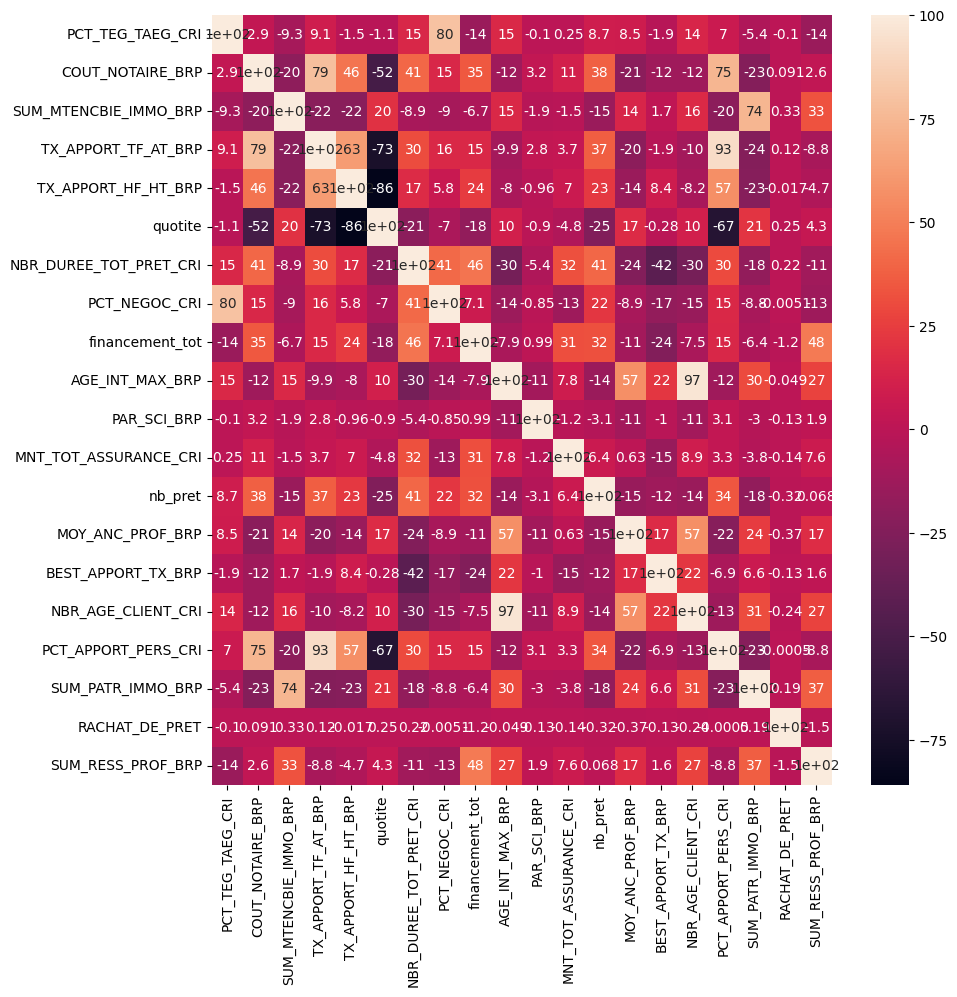

In [39]:
# heatmap apres suppressions des variables qui causent de la multi colinéarité 
plt.figure(figsize = (10,10))
sns.heatmap(X_train[var_quanti_selectionnees].corr(method = 'spearman')*100 , annot = True) 

Plusieurs variables semblent générer de la multicolinéarité, on va donc les supprimer:
- [A COMPLETER]

In [40]:
# # suppresion des variables qui causent de la multi corr

# var_quanti_selectionnees.remove('TX_APPORT_TF_AT_BRP' )
# var_quanti_selectionnees.remove('TX_APPORT_HF_HT_BRP' )
# var_quanti_selectionnees.remove('COUT_PROJET_HF_HT_BRP' )
# var_quanti_selectionnees.remove('BEST_APPORT_MT_BRP' )

# # prendre les 10 premieres 

#### Sur l'ensemble des variables:

In [41]:
var_selectionnees = selection_avec_lasso(X_train,y_train,20,'all')
print("Variables sélectionnées par Lasso:",var_selectionnees)

coef
IRPAR_USAGE_V12_MAX_8.0   0.911539
IRPAR_USAGE_V12_MAX_1.0   0.686987
CODTYP_CRT_TRAVAIL_CRI_4  0.548607
IRPAR_USAGE_V12_MAX_2.0   0.546520
COD_ETA_BIEN_CRI_20       0.423008
IRPAR_USAGE_V12_MAX_7.0   0.419932
COD_SITU_LOGT_CRI_20.0    0.400735
IND_PRIMO_ACCEDT_CRI_1.0  0.353092
COD_ETA_BIEN_CRI_60       0.339372
TOP_PRET_RELAIS_BRP_1     0.330921
COD_SITU_LOGT_CRI_50.0    0.326597
CODTYP_CRT_TRAVAIL_CRI_Y  0.320127
CODTYP_CRT_TRAVAIL_CRI_1  0.313901
PCT_TEG_TAEG_CRI          0.287938
COD_CSP_BRP_3300.0        0.284183
PCT_APPORT_PERS_CRI       0.281957
COUT_RACHAT_BRP           0.280425
QUA_INT_1_BRP_3           0.278644
IRPAR_USAGE_V12_MAX_3.0   0.276798
TOP_ASC_DESC_BRP_1        0.252068

Variables sélectionnées par Lasso: ['IRPAR_USAGE_V12_MAX_8.0', 'IRPAR_USAGE_V12_MAX_1.0', 'CODTYP_CRT_TRAVAIL_CRI_4', 'IRPAR_USAGE_V12_MAX_2.0', 'COD_ETA_BIEN_CRI_20', 'IRPAR_USAGE_V12_MAX_7.0', 'COD_SITU_LOGT_CRI_20.0', 'IND_PRIMO_ACCEDT_CRI_1.0', 'COD_ETA_BIEN_CRI_60', 'TOP_PRET_RELAIS_BRP_1', 'COD_SITU_LOGT_CRI_50.0', 'CODTYP_CRT_TRAVAIL_CRI_Y', 'CODTYP_CRT_TRAVAIL_CRI_1', 'PCT_TEG_TAEG_CRI', 'COD_CSP_BRP_3300.0', 'PCT_APPORT_PERS_CRI', 'COUT_RACHAT_BRP', 'QUA_INT_1_BRP_3', 'IRPAR_USAGE_V12_MAX_3.0', 'TOP_ASC_DESC_BRP_1']


#### Variables candidates pour l'instant:

On stocke quand même les variables auxiliaires et croisées au cas où:

variables_selected=[]

In [42]:
variables_selected=col_cross_var_mount+proxys_var+var_quanti_selectionnees

## Discrétisation  + regroupement de modalités 
Dans cette partie, on se charge de:
-  discrétiser les variables quantitatives en modalités 
-  réduire le nombre de modalités pour les variables qualitatives (trop de modalités ==> surapprentissage)

### Regroupement des modalités pour les variables catégorielles


#### Nécessaire de regrouper des modalités?
Sans exception, toutes les variables qualitatives sont catégorielles. On va regarder le nombre de modalités pour chacune d'entre elles


Certaines variables ont trop (surapprentissage) ou pas assez de modalités (nombre de modalités =1 => aucune discrimination):
- On ne traite pas la CSP avec bcp de modalités (l'autre variable CSP disponible est plus pertinente et a le bon nombre de modalité)
- la variable STA qui n'a pas de modalités interprétables
- ROL_INT_MAX n'a pas plus d'une modalité


In [43]:
drop_columns(X_train,["COD_CSP_BRP","STA_CLP_BRP","ROL_INT_MAX_BRP","TOP_CONNU_BRP","COD_CPPOP_CRI","IRPRO_USAGE_V12_MAX"])

Ces colonnes vont être retirées: ['COD_CSP_BRP', 'STA_CLP_BRP', 'ROL_INT_MAX_BRP', 'TOP_CONNU_BRP', 'COD_CPPOP_CRI', 'IRPRO_USAGE_V12_MAX']


nb_pret TOP_SCI_BRP  NBR_INT_BRP  NBR_TOT_COEMPR_CRI  \
0            1           0            2                   1   
1            2           0            2                   1   
2            1           0            2                   1   
3            1           0            2                   1   
4            1           0            2                   1   
...        ...         ...          ...                 ...   
68211        1           0            1                   0   
68212        1           0            2                   1   
68213        1           0            2                   1   
68214        1           0            2                   1   
68215        1           0            1                   0   

      CODTYPE_PROJET_CRI COD_ETA_BIEN_CRI COD_USAGE_BIEN_CRI  \
0                     10               40                 10   
1                     10               60                 10   
2                     20               40                 10   
3                     20               50                 10   
4                     20               60                 10   
...                  ...              ...                ...   
68211                 20               60                 10   
68212                 10               60                 40   
68213                 10               60                 10   
68214                 20               60                 10   
68215                 10               50                 10   

       BEST_APPORT_MT_BRP  BEST_APPORT_TX_BRP  PCT_APPORT_PERS_CRI  ...  \
0                48340.00               30.79                    0  ...   
1                29799.00               16.03                    8  ...   
2                18334.48                8.65                    0  ...   
3               101042.00               43.37                   53  ...   
4                  491.03                3.10                    6  ...   
...                   ...                 ...                  ...  ...   
68211            16813.53               11.21                    0  ...   
68212            29799.00               16.03                    0  ...   
68213             1352.24                0.34                    0  ...   
68214            29799.00               16.03                    8  ...   
68215            15520.62               14.11                    6  ...   

       top_autre_pret_ext top_pers_seule TAUX_HLM  TAUX_CHOMAGE  PRIX_LOYER  \
0                       0              0     6.09          9.02        5.98   
1                       0              0     7.91          9.02        5.93   
2                       0              0     7.16          8.70        5.90   
3                       0              0     6.73          9.02        5.55   
4                       0              0     5.89          9.02        5.38   
...                   ...            ...      ...           ...         ...   
68211                   0              1    11.89          9.02        5.52   
68212                   0              1     7.35          9.02        5.58   
68213                   0              1    11.05          9.02        8.20   
68214                   0              0    14.08          9.02        6.78   
68215                   0              1     5.39          9.02        6.72   

       ACQUISITION_SEULE  PAIEMENT_SOULTE  RACHAT_DE_PRET  \
0              294360.00              0.0             0.0   
1                   0.00              0.0             0.0   
2              346399.50              0.0             0.0   
3              372399.50              0.0             0.0   
4              852399.50              0.0             0.0   
...                  ...              ...             ...   
68211          240000.00              0.0             0.0   
68212          230000.00              0.0             0.0   
68213          190000.00              0.0             0.0   
68214          243399

#### Regroupement des modalités

 Avant regroupement: On regarde si certaines sont déja non significatives. Si jamais on vient à toucher aux modalités, c'est important de vérifier que ce n'est pas l'encodage qui a fait ça


In [44]:
print("Les variables qualitatives sont:", X_train.select_dtypes(include="object").columns.tolist())

Les variables qualitatives sont: ['TOP_SCI_BRP', 'CODTYPE_PROJET_CRI', 'COD_ETA_BIEN_CRI', 'COD_USAGE_BIEN_CRI', 'TOP_ETR_BRP', 'TOP_PRET_RELAIS_BRP', 'TOP_SURFINANCEMENT_BRP', 'top_exist_conso_revo_BRP', 'IRPAR_USAGE_V12_MAX', 'TOP_ASC_DESC_BRP', 'QUA_INT_1_BRP', 'QUA_INT_MAX_BRP', 'CODTYP_CRT_TRAVAIL_CRI', 'COD_SITU_LOGT_CRI', 'COD_SIT_FAM_EMPRUNTEUR_CRI', 'COD_TYPE_MARCHE_CRI', 'IND_INCIDENT_BDF_CRI', 'IND_PRIMO_ACCEDT_CRI', 'TOP_BIEN_FR_CRI', 'TOP_NAT_FR_CRI', 'CSP_RGP_BRP', 'top_locatif', 'top_pret_int_ext', 'top_autre_pret_int', 'top_autre_pret_ext', 'top_pers_seule']


In [45]:
list_quali_var=X_train.select_dtypes(include="object").columns.tolist()

In [46]:
non_significatif_avant_regroupement=non_significativité_chi2(X_train,y_train)

VARIABLES QUALITATIVES NON SIGNIFICATIVES AU SEUIL DE 5%
['COD_USAGE_BIEN_CRI']


##### Regroupement des modalités manuellement
- On récupère la liste des variables ayant plus de 5 modalités: il s'agit d'un seuil arbitraire, qui selon nous, semble pertinent. En effet, lorsqu'il y a trop de modalités, qui ont, qui plus est, peu d'observations, il convient de les regrouper pour éviter du surapprentissage

La priorité est de traiter les variables ayant trop de modalités (>8). D'une part on va renommer les catégories et effectuer un rassemblement de certaines modalités à la main. Dans un second temps, on va procéder à une sélection automatique. A la fin, on aura l'ensemble des variables catégorielles qui ont encore plus d'une modalité. 

In [47]:
replace_encoding_by_real_mod(X_train)


nb_pret TOP_SCI_BRP  NBR_INT_BRP  NBR_TOT_COEMPR_CRI  \
0            1           0            2                   1   
1            2           0            2                   1   
2            1           0            2                   1   
3            1           0            2                   1   
4            1           0            2                   1   
...        ...         ...          ...                 ...   
68211        1           0            1                   0   
68212        1           0            2                   1   
68213        1           0            2                   1   
68214        1           0            2                   1   
68215        1           0            1                   0   

        CODTYPE_PROJET_CRI   COD_ETA_BIEN_CRI    COD_USAGE_BIEN_CRI  \
0              appartement  ancien_inf_10_ans  residence principale   
1              appartement  ancien_sup_10_ans  residence principale   
2      maison individuelle  ancien_inf_10_ans  residence principale   
3      maison individuelle  ancien_sup_10_ans  residence principale   
4      maison individuelle  ancien_sup_10_ans  residence principale   
...                    ...                ...                   ...   
68211  maison individuelle  ancien_sup_10_ans  residence principale   
68212          appartement  ancien_sup_10_ans     locatif principal   
68213          appartement  ancien_sup_10_ans  residence principale   
68214  maison individuelle  ancien_sup_10_ans  residence principale   
68215          appartement  ancien_sup_10_ans  residence principale   

       BEST_APPORT_MT_BRP  BEST_APPORT_TX_BRP  PCT_APPORT_PERS_CRI  ...  \
0                48340.00               30.79                    0  ...   
1                29799.00               16.03                    8  ...   
2                18334.48                8.65                    0  ...   
3               101042.00               43.37                   53  ...   
4                  491.03                3.10                    6  ...   
...                   ...                 ...                  ...  ...   
68211            16813.53               11.21                    0  ...   
68212            29799.00               16.03                    0  ...   
68213             1352.24                0.34                    0  ...   
68214            29799.00               16.03                    8  ...   
68215            15520.62               14.11                    6  ...   

       top_autre_pret_ext top_pers_seule TAUX_HLM  TAUX_CHOMAGE  PRIX_LOYER  \
0                       0              0     6.09          9.02        5.98   
1                       0              0     7.91          9.02        5.93   
2                       0              0     7.16          8.70        5.90   
3                       0              0     6.73          9.02        5.55   
4                       0              0     5.89          9.02        5.38   
...                   ...            ...      ...           ...         ...   
68211                   0              1    11.89          9.02        5.52   
68212                   0              1     7.35          9.02        5.58   
68213                   0              1    11.05          9.02        8.20   
68214                   0              0    14.08          9.02        6.78   
68215                   0              1     5.39          9.02        6.72   

       ACQUISITION_SEULE  PAIEMENT_SOULTE  RACHAT_DE_PRET  \
0              294360.00              0.0             0.0   
1                   0.00              0.0             0.0   
2              346399.50              0.0             0.0   
3              372399.50              0.0             0.0   
4              852399.50              0.0             0.0   
...                  ...              ...             ...   
68211          240000.00              0.0             0.0   
68212          230000.00              0.0             0.0  

#### Regroupement des modalités automatiquement
- On a crée un algorithme qui permet de rassembler les modalités si elles ne sont pas assez remplies ou ne sont pas significatives.
- Deux objectifs: diminuer nombre de modalités et vérifier leur pertinence
- Si une modalités comporte moins de 5% ==> on doit la merge avec une autre modalité = on tente par modalité ayant la moyenne la plus proche
- Si la variable la plus proche n'est pas plus importante, alors on prend la classe majoritaire

In [48]:
import optbinning
from sklearn.preprocessing import LabelEncoder

dict_encoding=group_modalities_with_optbinning(X_train,y_train,None,0.1,True)

################################ TOP_SCI_BRP ################################
STATUS : OPTIMAL


Bin  Count  Count (%)  Non-event  Event  Event rate       WoE  \
0           [0]  67657   0.991805      67219    438    0.006474 -0.005986   
1           [1]    559   0.008195        558      1    0.001789   1.28488   
2       Special      0   0.000000          0      0    0.000000       0.0   
3       Missing      0   0.000000          0      0    0.000000       0.0   
Totals           68216   1.000000      67777    439    0.006435             

              IV        JS  
0       0.000036  0.000004  
1       0.007651  0.000896  
2       0.000000  0.000000  
3       0.000000  0.000000  
Totals  0.007687  0.000900

['0']    67657
['1']      559
dtype: int64
ENCODING...
################################ CODTYPE_PROJET_CRI ################################
STATUS : OPTIMAL


Bin  Count  Count (%)  \
0                                           [appartement]  32423   0.475299   
1                                   [maison individuelle]  35213   0.516199   
2       [garage, box, parking, local mixte, sci/scpi, ...    580   0.008502   
3                                                 Special      0   0.000000   
4                                                 Missing      0   0.000000   
Totals                                                     68216   1.000000   

        Non-event  Event  Event rate       WoE        IV        JS  
0           32239    184    0.005675  0.126518  0.007152  0.000893  
1           34964    249    0.007071 -0.094857  0.004869  0.000608  
2             574      6    0.010345 -0.478609  0.002488  0.000308  
3               0      0    0.000000       0.0  0.000000  0.000000  
4               0      0    0.000000       0.0  0.000000  0.000000  
Totals      67777    439    0.006435            0.014509  0.001810

['maison individuelle']                                                                                                                                           35213
['appartement']                                                                                                                                                   32423
['garage, box, parking' 'local mixte' 'sci/scpi' 'local professionnel'\n 'terrain constructible' 'annexe(s), piscine' 'terrain non constructible'\n 'péniche']      580
dtype: int64
ENCODING...
################################ COD_ETA_BIEN_CRI ################################
STATUS : OPTIMAL


Bin  Count  Count (%)  \
0                                     [ancien_inf_10_ans]  10687   0.156664   
1                      [vente en état futur d'achèvement]   7867   0.115325   
2                                     [ancien_sup_10_ans]  47293   0.693283   
3       [neuf, contrat construction maison individuell...   2284   0.033482   
4                                                 Special      0   0.000000   
5                                                 Missing     85   0.001246   
Totals                                                     68216   1.000000   

        Non-event  Event  Event rate       WoE        IV        JS  
0           10646     41    0.003836  0.519889  0.033106  0.004092  
1            7830     37    0.004703  0.315321  0.009852  0.001226  
2           46953    340    0.007189 -0.111522  0.009115  0.001139  
3            2265     19    0.008319 -0.258588  0.002550  0.000318  
4               0      0    0.000000       0.0  0.000000  0.000000  
5              83      2    0.023529 -1.313785  0.004376  0.000511  
Totals      67777    439    0.006435            0.059000  0.007286

['ancien_sup_10_ans']                                                                      47293
['ancien_inf_10_ans']                                                                      10687
["vente en état futur d'achèvement"]                                                        7867
['neuf' 'contrat construction maison individuelle'\n "clé en main avec levée d'option"]     2284
Missing                                                                                       85
dtype: int64
ENCODING...
################################ COD_USAGE_BIEN_CRI ################################
STATUS : OPTIMAL


Bin  Count  Count (%)  \
0                                     [locatif principal]  11518   0.168846   
1                                  [residence principale]  54472   0.798522   
2       [residence secondaire, locatif secondaire, loc...   2226   0.032632   
3                                                 Special      0   0.000000   
4                                                 Missing      0   0.000000   
Totals                                                     68216   1.000000   

        Non-event  Event  Event rate       WoE        IV        JS  
0           11461     57    0.004949  0.264175  0.010371  0.001293  
1           54108    364    0.006682 -0.037895  0.001168  0.000146  
2            2208     18    0.008086 -0.230008  0.001938  0.000242  
3               0      0    0.000000       0.0  0.000000  0.000000  
4               0      0    0.000000       0.0  0.000000  0.000000  
Totals      67777    439    0.006435            0.013477  0.001680

['residence principale']                                                                           54472
['locatif principal']                                                                              11518
['residence secondaire' 'locatif secondaire' 'locatif professionnel'\n 'residence de retraite']     2226
dtype: int64
ENCODING...
################################ TOP_ETR_BRP ################################
STATUS : OPTIMAL


Bin  Count  Count (%)  Non-event  Event  Event rate       WoE  \
0           [0]  64853   0.950701      64454    399    0.006152  0.045267   
1           [1]   3363   0.049299       3323     40    0.011894 -0.619735   
2       Special      0   0.000000          0      0    0.000000       0.0   
3       Missing      0   0.000000          0      0    0.000000       0.0   
Totals           68216   1.000000      67777    439    0.006435             

              IV        JS  
0       0.001905  0.000238  
1       0.026083  0.003209  
2       0.000000  0.000000  
3       0.000000  0.000000  
Totals  0.027988  0.003447

['0']    64853
['1']     3363
dtype: int64
ENCODING...
################################ TOP_PRET_RELAIS_BRP ################################
STATUS : OPTIMAL


Bin  Count  Count (%)  Non-event  Event  Event rate       WoE  \
0           [0]  67283   0.986323      66859    424    0.006302  0.021129   
1           [1]    933   0.013677        918     15    0.016077 -0.925332   
2       Special      0   0.000000          0      0    0.000000       0.0   
3       Missing      0   0.000000          0      0    0.000000       0.0   
Totals           68216   1.000000      67777    439    0.006435             

              IV        JS  
0       0.000436  0.000054  
1       0.019084  0.002304  
2       0.000000  0.000000  
3       0.000000  0.000000  
Totals  0.019520  0.002358

['0']    67283
['1']      933
dtype: int64
ENCODING...
################################ TOP_SURFINANCEMENT_BRP ################################
STATUS : OPTIMAL


Bin  Count  Count (%)  Non-event  Event  Event rate       WoE  \
0           [0]  57678    0.84552      57334    344    0.005964  0.076529   
1           [1]  10538    0.15448      10443     95    0.009015 -0.339668   
2       Special      0    0.00000          0      0    0.000000       0.0   
3       Missing      0    0.00000          0      0    0.000000       0.0   
Totals           68216    1.00000      67777    439    0.006435             

              IV        JS  
0       0.004769  0.000596  
1       0.021169  0.002633  
2       0.000000  0.000000  
3       0.000000  0.000000  
Totals  0.025938  0.003229

['0']    57678
['1']    10538
dtype: int64
ENCODING...
################################ top_exist_conso_revo_BRP ################################
STATUS : OPTIMAL


Bin  Count  Count (%)  Non-event  Event  Event rate      WoE  \
0           [0]  52295   0.766609      51983    312    0.005966  0.07619   
1           [1]  15921   0.233391      15794    127    0.007977 -0.21628   
2       Special      0   0.000000          0      0    0.000000      0.0   
3       Missing      0   0.000000          0      0    0.000000      0.0   
Totals           68216   1.000000      67777    439    0.006435            

              IV        JS  
0       0.004287  0.000536  
1       0.012169  0.001518  
2       0.000000  0.000000  
3       0.000000  0.000000  
Totals  0.016456  0.002054

['0']    52295
['1']    15921
dtype: int64
ENCODING...
################################ IRPAR_USAGE_V12_MAX ################################
STATUS : OPTIMAL


Bin  Count  Count (%)  \
0                                                [2.0]  37664   0.552129   
1                                                [3.0]  14452   0.211856   
2       [4.0, 1.0, 6.0, 5.0, 8.0, 7.0, nan, 9.0, 10.0]  16100   0.236015   
3                                              Special      0   0.000000   
4                                              Missing      0   0.000000   
Totals                                                  68216   1.000000   

        Non-event  Event  Event rate       WoE        IV        JS  
0           37480    184    0.004885  0.277148  0.037098  0.004622  
1           14368     84    0.005812  0.102463  0.002115  0.000264  
2           15929    171    0.010621 -0.505246  0.078061  0.009655  
3               0      0    0.000000       0.0  0.000000  0.000000  
4               0      0    0.000000       0.0  0.000000  0.000000  
Totals      67777    439    0.006435            0.117274  0.014542

['2.0']                                                     37664
['4.0' '1.0' '6.0' '5.0' '8.0' '7.0' 'nan' '9.0' '10.0']    16100
['3.0']                                                     14452
dtype: int64
ENCODING...
################################ TOP_ASC_DESC_BRP ################################
STATUS : OPTIMAL


Bin  Count  Count (%)  Non-event  Event  Event rate       WoE  \
0           [0]  68065   0.997786      67633    432    0.006347  0.013947   
1           [1]    151   0.002214        144      7    0.046358 -2.015576   
2       Special      0   0.000000          0      0    0.000000       0.0   
3       Missing      0   0.000000          0      0    0.000000       0.0   
Totals           68216   1.000000      67777    439    0.006435             

              IV        JS  
0       0.000193  0.000024  
1       0.027857  0.002991  
2       0.000000  0.000000  
3       0.000000  0.000000  
Totals  0.028049  0.003015

['0']    68065
['1']      151
dtype: int64
ENCODING...
################################ QUA_INT_1_BRP ################################
STATUS : OPTIMAL


Bin  Count  Count (%)  Non-event  Event  Event rate       WoE  \
0           [4]   9363   0.137255       9320     43    0.004593  0.339239   
1           [2]  53186   0.779670      52838    348    0.006543 -0.016695   
2        [3, 5]   5667   0.083074       5619     48    0.008470 -0.276771   
3       Special      0   0.000000          0      0    0.000000       0.0   
4       Missing      0   0.000000          0      0    0.000000       0.0   
Totals           68216   1.000000      67777    439    0.006435             

              IV        JS  
0       0.013420  0.001670  
1       0.000219  0.000027  
2       0.007316  0.000912  
3       0.000000  0.000000  
4       0.000000  0.000000  
Totals  0.020956  0.002609

['2']        53186
['4']         9363
['3' '5']     5667
dtype: int64
ENCODING...
################################ QUA_INT_MAX_BRP ################################
STATUS : OPTIMAL


Bin  Count  Count (%)  Non-event  Event  Event rate  \
0       [mademoiselle]  12500   0.183241      12439     61    0.004880   
1             [madame]   9862   0.144570       9795     67    0.006794   
2           [monsieur]  45295   0.663994      44985    310    0.006844   
3             [entité]    559   0.008195        558      1    0.001789   
4              Special      0   0.000000          0      0    0.000000   
5              Missing      0   0.000000          0      0    0.000000   
Totals                  68216   1.000000      67777    439    0.006435   

             WoE        IV        JS  
0       0.278239  0.012403  0.001545  
1      -0.054544  0.000442  0.000055  
2      -0.061967  0.002629  0.000329  
3        1.28488  0.007651  0.000896  
4            0.0  0.000000  0.000000  
5            0.0  0.000000  0.000000  
Totals            0.023125  0.002825

['monsieur']        45295
['mademoiselle']    12500
['madame']           9862
['entité']            559
dtype: int64
ENCODING...
################################ CODTYP_CRT_TRAVAIL_CRI ################################
STATUS : OPTIMAL


Bin  Count  Count (%)  \
0                      [fonctionnaire ou agent public]  11611   0.170209   
1                       [cdi et professions libérales]  54759   0.802730   
2       [chomage, retraités, inactifs, cdd et intérim]   1846   0.027061   
3                                              Special      0   0.000000   
4                                              Missing      0   0.000000   
Totals                                                  68216   1.000000   

        Non-event  Event  Event rate       WoE        IV        JS  
0           11559     52    0.004479  0.364497  0.018988  0.002360  
1           54394    365    0.006666 -0.035367  0.001022  0.000128  
2            1824     22    0.011918 -0.621734  0.014426  0.001775  
3               0      0    0.000000       0.0  0.000000  0.000000  
4               0      0    0.000000       0.0  0.000000  0.000000  
Totals      67777    439    0.006435            0.034435  0.004263

['cdi et professions libérales']                     54759
['fonctionnaire ou agent public']                    11611
['chomage, retraités, inactifs' 'cdd et intérim']     1846
dtype: int64
ENCODING...
################################ COD_SITU_LOGT_CRI ################################
STATUS : OPTIMAL


Bin  Count  Count (%)  \
0                                 [propriétaire accédant]  19442   0.285006   
1                                          [propriétaire]  25740   0.377331   
2                                       [locataire autre]  15761   0.231046   
3       [occupant gratuit, logement parents, locataire...   7251   0.106295   
4                                                 Special      0   0.000000   
5                                                 Missing     22   0.000323   
Totals                                                     68216   1.000000   

        Non-event  Event  Event rate       WoE        IV        JS  
0           19368     74    0.003806  0.527834  0.061860  0.007644  
1           25605    135    0.005245  0.205789  0.014460  0.001804  
2           15594    167    0.010596 -0.502831  0.075592  0.009351  
3            7189     62    0.008551 -0.286306  0.010067  0.001254  
4               0      0    0.000000       0.0  0.000000  0.000000  
5              21      1    0.045455 -1.994956  0.003926  0.000423  
Totals      67777    439    0.006435            0.165905  0.020476

['propriétaire']                                                                              25740
['propriétaire accédant']                                                                     19442
['locataire autre']                                                                           15761
['occupant gratuit' 'logement parents' 'locataire de fonction'\n 'locataire hlm' 'autres']     7251
Missing                                                                                          22
dtype: int64
ENCODING...
################################ COD_SIT_FAM_EMPRUNTEUR_CRI ################################
STATUS : OPTIMAL


Bin  Count  Count (%)  Non-event  Event  \
0                 [union libre]  14756   0.216313      14678     78   
1                 [célibataire]  19279   0.282617      19161    118   
2                       [marié]  29012   0.425296      28802    210   
3       [divorcé, séparé, veuf]   5169   0.075774       5136     33   
4                       Special      0   0.000000          0      0   
5                       Missing      0   0.000000          0      0   
Totals                           68216   1.000000      67777    439   

        Event rate       WoE        IV            JS  
0         0.005286  0.197917  0.007696  9.604751e-04  
1         0.006121  0.050469  0.000702  8.776744e-05  
2         0.007238 -0.118386  0.006323  7.898775e-04  
3         0.006384  0.008044  0.000005  6.103763e-07  
4         0.000000       0.0  0.000000  0.000000e+00  
5         0.000000       0.0  0.000000  0.000000e+00  
Totals    0.006435            0.014726  1.838730e-03

['marié']                      29012
['célibataire']                19279
['union libre']                14756
['divorcé' 'séparé' 'veuf']     5169
dtype: int64
ENCODING...
################################ COD_TYPE_MARCHE_CRI ################################
STATUS : OPTIMAL


Bin  Count  Count (%)  Non-event  Event  Event rate       WoE  \
0          [M1]  63994   0.938108      63596    398    0.006219  0.034375   
1          [M2]   4222   0.061892       4181     41    0.009711 -0.414745   
2       Special      0   0.000000          0      0    0.000000       0.0   
3       Missing      0   0.000000          0      0    0.000000       0.0   
Totals           68216   1.000000      67777    439    0.006435             

             IV        JS  
0       0.00109  0.000136  
1       0.01315  0.001632  
2       0.00000  0.000000  
3       0.00000  0.000000  
Totals  0.01424  0.001768

['M1']    63994
['M2']     4222
dtype: int64
ENCODING...
################################ IND_INCIDENT_BDF_CRI ################################
STATUS : OPTIMAL


Bin  Count  Count (%)  Non-event  Event  Event rate       WoE  \
0           [N]  68203   0.999809      67764    439    0.006437 -0.000192   
1           [O]     13   0.000191         13      0    0.000000       0.0   
2       Special      0   0.000000          0      0    0.000000       0.0   
3       Missing      0   0.000000          0      0    0.000000       0.0   
Totals           68216   1.000000      67777    439    0.006435             

                  IV            JS  
0       3.679287e-08  4.599109e-09  
1       0.000000e+00  0.000000e+00  
2       0.000000e+00  0.000000e+00  
3       0.000000e+00  0.000000e+00  
Totals  3.679287e-08  4.599109e-09

['N']    68203
['O']       13
dtype: int64
ENCODING...
################################ IND_PRIMO_ACCEDT_CRI ################################
STATUS : OPTIMAL


Bin  Count  Count (%)  Non-event  Event  Event rate       WoE  \
0         [nan]  34649   0.507931      34467    182    0.005253  0.204272   
1         [2.0]  21079   0.309004      20955    124    0.005883  0.090372   
2         [1.0]  12488   0.183066      12355    133    0.010650 -0.508012   
3       Special      0   0.000000          0      0    0.000000       0.0   
4       Missing      0   0.000000          0      0    0.000000       0.0   
Totals           68216   1.000000      67777    439    0.006435             

              IV        JS  
0       0.019193  0.002395  
1       0.002414  0.000302  
2       0.061303  0.007582  
3       0.000000  0.000000  
4       0.000000  0.000000  
Totals  0.082910  0.010278

['nan']    34649
['2.0']    21079
['1.0']    12488
dtype: int64
ENCODING...
################################ TOP_BIEN_FR_CRI ################################
STATUS : OPTIMAL


Bin  Count  Count (%)  Non-event  Event  Event rate       WoE  \
0           [1]  68201    0.99978      67762    439    0.006437 -0.000221   
1           [0]     15    0.00022         15      0    0.000000       0.0   
2       Special      0    0.00000          0      0    0.000000       0.0   
3       Missing      0    0.00000          0      0    0.000000       0.0   
Totals           68216    1.00000      67777    439    0.006435             

                  IV            JS  
0       4.898531e-08  6.123164e-09  
1       0.000000e+00  0.000000e+00  
2       0.000000e+00  0.000000e+00  
3       0.000000e+00  0.000000e+00  
Totals  4.898531e-08  6.123164e-09

['1']    68201
['0']       15
dtype: int64
ENCODING...
################################ TOP_NAT_FR_CRI ################################
STATUS : OPTIMAL


Bin  Count  Count (%)  Non-event  Event  Event rate       WoE  \
0           [1]  66023   0.967852      65610    413    0.006255  0.028557   
1           [0]   2193   0.032148       2167     26    0.011856 -0.616476   
2       Special      0   0.000000          0      0    0.000000       0.0   
3       Missing      0   0.000000          0      0    0.000000       0.0   
Totals           68216   1.000000      67777    439    0.006435             

              IV        JS  
0       0.000778  0.000097  
1       0.016801  0.002067  
2       0.000000  0.000000  
3       0.000000  0.000000  
Totals  0.017579  0.002165

['1']    66023
['0']     2193
dtype: int64
ENCODING...
################################ CSP_RGP_BRP ################################
STATUS : OPTIMAL


Bin  Count  Count (%)  \
0                            [professions Intermédiaires]  10172   0.149115   
1       [cadres et professions intellectuelles supérie...  31316   0.459071   
2                                              [employés]  19123   0.280330   
3       [ouvriers, artisans, commerçants et chefs d'en...   7605   0.111484   
4                                                 Special      0   0.000000   
5                                                 Missing      0   0.000000   
Totals                                                     68216   1.000000   

        Non-event  Event  Event rate       WoE        IV        JS  
0           10119     53    0.005210  0.212399  0.006068  0.000757  
1           31128    188    0.006003  0.069942  0.002170  0.000271  
2           18997    126    0.006589 -0.023724  0.000160  0.000020  
3            7533     72    0.009467 -0.389096  0.020570  0.002555  
4               0      0    0.000000       0.0  0.000000  0.000000  
5               0      0    0.000000       0.0  0.000000  0.000000  
Totals      67777    439    0.006435            0.028967  0.003603

['cadres et professions intellectuelles supérieures']                                                                                                     31316
['employés']                                                                                                                                              19123
['professions Intermédiaires']                                                                                                                            10172
['ouvriers' "artisans, commerçants et chefs d'entreprise" 'retraités'\n 'autres personnes sans activité professionnelle'\n 'agriculteurs exploitants']     7605
dtype: int64
ENCODING...
################################ top_locatif ################################
STATUS : OPTIMAL


Bin  Count  Count (%)  Non-event  Event  Event rate       WoE  \
0           [1]  12508   0.183359      12441     67    0.005357  0.184581   
1           [0]  55708   0.816641      55336    372    0.006678 -0.037194   
2       Special      0   0.000000          0      0    0.000000       0.0   
3       Missing      0   0.000000          0      0    0.000000       0.0   
Totals           68216   1.000000      67777    439    0.006435             

              IV        JS  
0       0.005711  0.000713  
1       0.001151  0.000144  
2       0.000000  0.000000  
3       0.000000  0.000000  
Totals  0.006861  0.000857

['0']    55708
['1']    12508
dtype: int64
ENCODING...
################################ top_pret_int_ext ################################
STATUS : OPTIMAL


Bin  Count  Count (%)  Non-event  Event  Event rate       WoE  \
0           [0]  64720   0.948751      64316    404    0.006242   0.03067   
1           [1]   3496   0.051249       3461     35    0.010011 -0.445514   
2       Special      0   0.000000          0      0    0.000000       0.0   
3       Missing      0   0.000000          0      0    0.000000       0.0   
Totals           68216   1.000000      67777    439    0.006435             

              IV        JS  
0       0.000879  0.000110  
1       0.012769  0.001583  
2       0.000000  0.000000  
3       0.000000  0.000000  
Totals  0.013648  0.001693

['0']    64720
['1']     3496
dtype: int64
ENCODING...
################################ top_autre_pret_int ################################
STATUS : OPTIMAL


Bin  Count  Count (%)  Non-event  Event  Event rate       WoE  \
0           [0]  66168   0.969978      65745    423    0.006393  0.006688   
1           [1]   2048   0.030022       2032     16    0.007812 -0.195292   
2       Special      0   0.000000          0      0    0.000000       0.0   
3       Missing      0   0.000000          0      0    0.000000       0.0   
Totals           68216   1.000000      67777    439    0.006435             

              IV        JS  
0       0.000043  0.000005  
1       0.001263  0.000158  
2       0.000000  0.000000  
3       0.000000  0.000000  
Totals  0.001306  0.000163

['0']    66168
['1']     2048
dtype: int64
ENCODING...
################################ top_autre_pret_ext ################################
STATUS : OPTIMAL


Bin  Count  Count (%)  Non-event  Event  Event rate       WoE  \
0           [0]  66168   0.969978      65745    423    0.006393  0.006688   
1           [1]   2048   0.030022       2032     16    0.007812 -0.195292   
2       Special      0   0.000000          0      0    0.000000       0.0   
3       Missing      0   0.000000          0      0    0.000000       0.0   
Totals           68216   1.000000      67777    439    0.006435             

              IV        JS  
0       0.000043  0.000005  
1       0.001263  0.000158  
2       0.000000  0.000000  
3       0.000000  0.000000  
Totals  0.001306  0.000163

['0']    66168
['1']     2048
dtype: int64
ENCODING...
################################ top_pers_seule ################################
STATUS : OPTIMAL


Bin  Count  Count (%)  Non-event  Event  Event rate       WoE  \
0           [1]  24866   0.364519      24717    149    0.005992  0.071821   
1           [0]  43350   0.635481      43060    290    0.006690  -0.03901   
2       Special      0   0.000000          0      0    0.000000       0.0   
3       Missing      0   0.000000          0      0    0.000000       0.0   
Totals           68216   1.000000      67777    439    0.006435             

              IV        JS  
0       0.001815  0.000227  
1       0.000986  0.000123  
2       0.000000  0.000000  
3       0.000000  0.000000  
Totals  0.002801  0.000350

['0']    43350
['1']    24866
dtype: int64
ENCODING...


In [49]:
dict_encoding

{'TOP_SCI_BRP': {'0': 0, '1': 1},
 'CODTYPE_PROJET_CRI': {'appartement': 0,
  'maison individuelle': 2,
  'garage, box, parking': 1,
  'sci/scpi': 1,
  'annexe(s), piscine': 1,
  'terrain constructible': 1,
  'local professionnel': 1,
  'local mixte': 1,
  'terrain non constructible': 1,
  'péniche': 1},
 'COD_ETA_BIEN_CRI': {'ancien_inf_10_ans': 2,
  'ancien_sup_10_ans': 3,
  "vente en état futur d'achèvement": 1,
  'neuf': 4,
  'contrat construction maison individuelle': 4,
  nan: 0,
  "clé en main avec levée d'option": 4},
 'COD_USAGE_BIEN_CRI': {'residence principale': 1,
  'locatif principal': 0,
  'locatif secondaire': 2,
  'residence secondaire': 2,
  'residence de retraite': 2,
  'locatif professionnel': 2},
 'TOP_ETR_BRP': {'0': 0, '1': 1},
 'TOP_PRET_RELAIS_BRP': {'0': 0, '1': 1},
 'TOP_SURFINANCEMENT_BRP': {'0': 0, '1': 1},
 'top_exist_conso_revo_BRP': {'0': 0, '1': 1},
 'IRPAR_USAGE_V12_MAX': {'6.0': 2,
  '2.0': 0,
  '5.0': 2,
  '3.0': 1,
  '1.0': 2,
  '4.0': 2,
  '8.0': 2,

In [50]:
encoding_col_and_cat(X_train,dict_encoding,list_quali_var)


In [51]:
# on fait un test du Chi2 pour voir si le regroupement auto a changé la significativité:
non_significatif_post_regroupement_auto=non_significativité_chi2(X_train,y_train)

VARIABLES QUALITATIVES NON SIGNIFICATIVES AU SEUIL DE 5%
[]


#### Conclusion

In [52]:
# On regarde si le traitement des modalités a été intéressant:

print("---------------------------------VARIABLES CATEGORIELLES NON SIGNIFICATIVES AU SEUIL DE 5%---------------------------------")

print("--------------------------------AVANT---------------------------------------------------------------")
print(non_significatif_avant_regroupement)
print("-------------------------------REGROUPEMENT AUTO-----------------------------------------")
print(non_significatif_post_regroupement_auto)

---------------------------------VARIABLES CATEGORIELLES NON SIGNIFICATIVES AU SEUIL DE 5%---------------------------------
--------------------------------AVANT---------------------------------------------------------------
['COD_USAGE_BIEN_CRI']
-------------------------------REGROUPEMENT AUTO-----------------------------------------
[]


In [53]:
verification_par_moyenne_defaut(X_train[list_quali_var], y_train,"quali")

------ pour la variable TOP_SCI_BRP : 

TOP_SCI_BRP
0    0.006474
1    0.001789
Name: defaut_36mois, dtype: float64

------ pour la variable CODTYPE_PROJET_CRI : 

CODTYPE_PROJET_CRI
0    0.005675
1    0.010345
2    0.007071
Name: defaut_36mois, dtype: float64

------ pour la variable COD_ETA_BIEN_CRI : 

COD_ETA_BIEN_CRI
1    0.004703
2    0.003836
3    0.007219
4    0.008319
Name: defaut_36mois, dtype: float64

------ pour la variable COD_USAGE_BIEN_CRI : 

COD_USAGE_BIEN_CRI
0    0.004949
1    0.006682
2    0.008086
Name: defaut_36mois, dtype: float64

------ pour la variable TOP_ETR_BRP : 

TOP_ETR_BRP
0    0.006152
1    0.011894
Name: defaut_36mois, dtype: float64

------ pour la variable TOP_PRET_RELAIS_BRP : 

TOP_PRET_RELAIS_BRP
0    0.006302
1    0.016077
Name: defaut_36mois, dtype: float64

------ pour la variable TOP_SURFINANCEMENT_BRP : 

TOP_SURFINANCEMENT_BRP
0    0.005964
1    0.009015
Name: defaut_36mois, dtype: float64

------ pour la variable top_exist_conso_revo_BRP 

### Discrétisation des variables quantitatives


In [54]:
discretisation_variables_from_chi2(X_train)


nb_pret TOP_SCI_BRP  NBR_INT_BRP  NBR_TOT_COEMPR_CRI  \
0            1           0            2                   1   
1            2           0            2                   1   
2            1           0            2                   1   
3            1           0            2                   1   
4            1           0            2                   1   
...        ...         ...          ...                 ...   
68211        1           0            1                   0   
68212        1           0            2                   1   
68213        1           0            2                   1   
68214        1           0            2                   1   
68215        1           0            1                   0   

      CODTYPE_PROJET_CRI COD_ETA_BIEN_CRI COD_USAGE_BIEN_CRI  \
0                      0                2                  1   
1                      0                3                  1   
2                      2                2                  1   
3                      2                3                  1   
4                      2                3                  1   
...                  ...              ...                ...   
68211                  2                3                  1   
68212                  0                3                  0   
68213                  0                3                  1   
68214                  2                3                  1   
68215                  0                3                  1   

       BEST_APPORT_MT_BRP  BEST_APPORT_TX_BRP  PCT_APPORT_PERS_CRI  ...  \
0                48340.00               30.79                    0  ...   
1                29799.00               16.03                    8  ...   
2                18334.48                8.65                    0  ...   
3               101042.00               43.37                   53  ...   
4                  491.03                3.10                    6  ...   
...                   ...                 ...                  ...  ...   
68211            16813.53               11.21                    0  ...   
68212            29799.00               16.03                    0  ...   
68213             1352.24                0.34                    0  ...   
68214            29799.00               16.03                    8  ...   
68215            15520.62               14.11                    6  ...   

       g_quotite g_PCT_TEG_TAEG_CRI g_MOY_ANC_PROF_BRP  g_nb_pret  \
0          grp_1              grp_1              grp_1      grp_2   
1          grp_2              grp_4              grp_2      grp_1   
2          grp_2              grp_3              grp_2      grp_2   
3          grp_1              grp_1              grp_3      grp_2   
4          grp_4              grp_4              grp_1      grp_2   
...          ...                ...                ...        ...   
68211      grp_2              grp_4              grp_2      grp_2   
68212      grp_3              grp_3              grp_3      grp_2   
68213      grp_1              grp_3              grp_2      grp_2   
68214      grp_2              grp_3              grp_3      grp_2   
68215      grp_4              grp_3              grp_2      grp_2   

       g_MNT_COUT_TOT_CREDIT_CRI  g_BEST_APPORT_TX_BRP  \
0                          grp_1                 grp_1   
1                          grp_3                 grp_3   
2                          grp_2                 grp_2   
3                          grp_1                 grp_1   
4                          grp_1                 grp_3   
...                          ...                   ...   
68211                      grp_3                 grp_2   
68212                      grp_1                 grp_3   
68213                      grp_3                 grp_4   
68214                      grp_3                 grp_3   
68215                      grp_1                 grp_3   

       g_COUT_PROJET_HF_AT_BRP  g_SUM_MTENCBIE_IMMO_BR

Vérification que la discrétisation est pertinente avec : 
- un groupby par moyenne de défaut pour chaque variable 
- un test du khi2 

In [55]:
verification_par_moyenne_defaut(X_train,y_train)

------ pour la variable g_MNT_TOT_ASSURANCE_CRI : 

g_MNT_TOT_ASSURANCE_CRI
grp_1    0.004770
grp_2    0.006855
grp_3    0.013847
Name: defaut_36mois, dtype: float64

------ pour la variable g_COUT_RACHAT_BRP : 

g_COUT_RACHAT_BRP
grp_1    0.003413
grp_2    0.003655
grp_3    0.009374
Name: defaut_36mois, dtype: float64

------ pour la variable g_SUM_PATR_IMMO_BRP : 

g_SUM_PATR_IMMO_BRP
grp_1    0.004616
grp_2    0.006700
Name: defaut_36mois, dtype: float64

------ pour la variable g_quotite : 

g_quotite
grp_1    0.003919
grp_2    0.005503
grp_3    0.008359
grp_4    0.013641
Name: defaut_36mois, dtype: float64

------ pour la variable g_PCT_TEG_TAEG_CRI : 

g_PCT_TEG_TAEG_CRI
grp_1    0.003282
grp_2    0.004937
grp_3    0.005625
grp_4    0.010721
Name: defaut_36mois, dtype: float64

------ pour la variable g_MOY_ANC_PROF_BRP : 

g_MOY_ANC_PROF_BRP
grp_1    0.005009
grp_2    0.005720
grp_3    0.009834
Name: defaut_36mois, dtype: float64

------ pour la variable g_nb_pret : 

g_nb_pret


Certaines variables ont trop (surapprentissage) ou pas assez de modalités (nombre de modalités =1 => aucune discrimination):
- On ne traite pas la CSP avec bcp de modalités (l'autre variable CSP disponible est plus pertinente et a le bon nombre de modalité)
- la variable STA qui n'a pas de modalités interprétables
- ROL_INT_MAX n'a pas plus d'une modalité


## Overview de la sélection de variables
- Quelles sont les variables finalement retenues?
- Etude de la stabilité temporelles
 

In [56]:

X_train_final=X_train.select_dtypes(include=['category','object'])
#

In [57]:
X_train_final

TOP_SCI_BRP CODTYPE_PROJET_CRI COD_ETA_BIEN_CRI COD_USAGE_BIEN_CRI  \
0               0                  0                2                  1   
1               0                  0                3                  1   
2               0                  2                2                  1   
3               0                  2                3                  1   
4               0                  2                3                  1   
...           ...                ...              ...                ...   
68211           0                  2                3                  1   
68212           0                  0                3                  0   
68213           0                  0                3                  1   
68214           0                  2                3                  1   
68215           0                  0                3                  1   

      TOP_ETR_BRP TOP_PRET_RELAIS_BRP TOP_SURFINANCEMENT_BRP  \
0               0                   0                      0   
1               1                   0                      1   
2               0                   0                      0   
3               0                   0                      0   
4               0                   0                      0   
...           ...                 ...                    ...   
68211           0                   0                      0   
68212           0                   0                      1   
68213           0                   0                      0   
68214           0                   0                      1   
68215           0                   0                      0   

      top_exist_conso_revo_BRP IRPAR_USAGE_V12_MAX TOP_ASC_DESC_BRP  ...  \
0                            0                   2                0  ...   
1                            0                   0                0  ...   
2                            0                   2                0  ...   
3                            0                   0                0  ...   
4                            0                   1                0  ...   
...                        ...                 ...              ...  ...   
68211                        0                   0                0  ...   
68212                        1                   0                0  ...   
68213                        0                   0                0  ...   
68214                        0                   0                0  ...   
68215                        0                   0                0  ...   

      g_quotite g_PCT_TEG_TAEG_CRI g_MOY_ANC_PROF_BRP g_nb_pret  \
0         grp_1              grp_1              grp_1     grp_2   
1         grp_2              grp_4              grp_2     grp_1   
2         grp_2              grp_3              grp_2     grp_2   
3         grp_1              grp_1              grp_3     grp_2   
4         grp_4              grp_4              grp_1     grp_2   
...         ...                ...                ...       ...   
68211     grp_2              grp_4              grp_2     grp_2   
68212     grp_3              grp_3              grp_3     grp_2   
68213     grp_1              grp_3              grp_2     grp_2   
68214     grp_2              grp_3              grp_3     grp_2   
68215     grp_4              grp_3              grp_2     grp_2   

      g_MNT_COUT_TOT_CREDIT_CRI g_BEST_APPORT_TX_BRP g_COUT_PROJET_HF_AT_BRP  \
0                         grp_1                grp_1                   grp_1   
1                         grp_3                grp_3                   grp_3   
2                         grp_2                grp_2                   grp_2   
3                         grp_1                grp_1                   grp_2   
4                         grp_1                grp_3                   grp_2   
...                         ...                  ...                     ...   
68211                     grp_3               

[STABILITE TEMPORELLE]

In [58]:
def pipeline(stab_data,dict_encoding):
    """en input on met le dataframe. La fonction devrait faire le preprocessing, la discrétisation quali, la discrétisation quanti 
    """
    #PREPROCESSING
    #Conversion format date
    date_columns=["DAT_VALIDE_ACCORD_CRI","date_debloc_avec_crd"]
    stab_data["date_debloc_avec_crd"]=pd.to_datetime(stab_data["date_debloc_avec_crd"],format="%Y%m")

    #je ne mets pas le split OOT 
    #je ne mets pas le split train, test
    
    colonnes_drop=['TOP_GARANTIE_CL',"ID", 'DAT_VALIDE_ACCORD_CRI']
    stab_data.drop(columns= colonnes_drop, inplace = True)
    
    ###
    print("warning :Variables dummies")
    ###
    list_dummies = ['TOP_CONNU_BRP', 'TOP_SCI_BRP', 'TOP_ETR_BRP', 'TOP_PRET_RELAIS_BRP', 'TOP_SURFINANCEMENT_BRP', 'top_exist_conso_revo_BRP', 'TOP_ASC_DESC_BRP', 'ROL_INT_MAX_BRP', 'IND_INCIDENT_BDF_CRI', 'IND_PRIMO_ACCEDT_CRI', 'TOP_BIEN_FR_CRI', 'TOP_NAT_FR_CRI', 'top_locatif', 'top_pret_int_ext', 'top_autre_pret_int', 'top_autre_pret_ext', 'top_pers_seule']
    convert_modalities_to_quali(stab_data,list_dummies)

    ###
    print("warning : modalities_var")
    ###
    modalities_var=["TYP_CNT_TRA_MAX_BRP",
                    "CODTYPE_PROJET_CRI",
                    "COD_ETA_BIEN_CRI",
                    "COD_USAGE_BIEN_CRI",
                    "STA_CLP_BRP",
                    "TYP_LOG_ACT_BRP",
                    "QUA_INT_MAX_BRP",
                    "ROL_INT_MAX_BRP",
                    "CODTYP_CRT_TRAVAIL_CRI",
                    "COD_SITU_LOGT_CRI",
                    "COD_SIT_FAM_EMPRUNTEUR_CRI",
                    "COD_TYPE_MARCHE_CRI",
                    "NAT_BIEN_FIN_BRP",
                    "SIT_FAM_INT_BRP",
                    "COD_CPPOP_CRI", 
                    "COD_CSP_BRP",
                    "CSP_RGP_BRP",
                    "ASU_BIEN_FIN_BRP",
                    "CODTYPE_PROJET_CRI",
                    "QUA_INT_1_BRP",
                    "CODPAY_NAT_EMPRUNTEUR_CRI",
                    "DEPARTEMENT_CRI",
                    "COD_POSTAL_BIEN_CRI"]  
    convert_modalities_to_quali(stab_data, modalities_var)

    ###
    print("warning : high_na")
    ###
    high_na = ['FINANCEMENT_PR_BRP', 'IRPRO_USAGE_V12_MAX', 'SUM_MNT_PRE_INTERNE_BRP', 'TX_APPORT_AGENCE_BRP', 'TX_FINANCEMENT_AGENCE_BRP', 'TX_APPORT_BRP', 'TX_FINANCEMENT_BRP', 'mnt_pret_ext_brp', 'SUM_LOYER_BRP', 'SUM_AUTRES_CHARG_BRP']
    drop_columns(stab_data,high_na)

    ###
    print("warning : colonnes_doublons_to_drop")
    ###
    colonnes_doublons_to_drop = ['NAT_BIEN_FIN_BRP', 'ASU_BIEN_FIN_BRP', 'TYP_CNT_TRA_MAX_BRP', 'SIT_FAM_INT_BRP', 'TYP_LOG_ACT_BRP']
    drop_columns(stab_data,colonnes_doublons_to_drop)

    ###
    print("warning : variables_a_fill_0 ET variables_na_to_drop")
    ###
    variables_a_fill_0 = ['SUM_RESS_IMMO_BRP', 'SUM_PATR_IMMO_BRP', 'SUM_MTENCBIE_IMMO_BRP', 'SUM_MNT_PRE_EXTERNE_BRP', 'SUM_EPARGNE_BRP', 'SUM_MTENCBIE_EPARGNE_BRP', 'SUM_TAX_FISC_BRP','COUT_NOTAIRE_BRP','COUT_ACQ_BRP']
    variables_na_to_drop = ['rentabilite_loc', 'Epargne_nb_ans_rev_prof']
    fill_by_0(stab_data, variables_a_fill_0)
    drop_columns(stab_data,variables_na_to_drop)

    imputation_for_na(stab_data)

    ###
    print("warning : list_geo_features")
    ###
    list_geo_features=["region_cri","COD_POSTAL_BIEN_CRI","DEPARTEMENT_CRI","NAT_INT_MAX_BRP","CODPAY_NAT_EMPRUNTEUR_CRI","CODPAY_BIEN_CRI"]
    drop_columns(stab_data,list_geo_features)
    
    #Discrétisation :
    
    ###
    print("warning : une liste au tout début de discrétisation + regroupement de modalités")
    ###
    drop_columns(stab_data,["COD_CSP_BRP","STA_CLP_BRP","ROL_INT_MAX_BRP","TOP_CONNU_BRP","COD_CPPOP_CRI"])
    
    #Quali
    list_quali=['TOP_SCI_BRP', 'CODTYPE_PROJET_CRI', 'COD_ETA_BIEN_CRI', 'COD_USAGE_BIEN_CRI', 'TOP_ETR_BRP', 'TOP_PRET_RELAIS_BRP', 'TOP_SURFINANCEMENT_BRP', 'top_exist_conso_revo_BRP', 'IRPAR_USAGE_V12_MAX', 'TOP_ASC_DESC_BRP', 'QUA_INT_1_BRP', 'QUA_INT_MAX_BRP', 'CODTYP_CRT_TRAVAIL_CRI', 'COD_SITU_LOGT_CRI', 'COD_SIT_FAM_EMPRUNTEUR_CRI', 'COD_TYPE_MARCHE_CRI', 'IND_INCIDENT_BDF_CRI', 'IND_PRIMO_ACCEDT_CRI', 'TOP_BIEN_FR_CRI', 'TOP_NAT_FR_CRI', 'CSP_RGP_BRP', 'top_locatif', 'top_pret_int_ext', 'top_autre_pret_int', 'top_autre_pret_ext', 'top_pers_seule']

    replace_encoding_by_real_mod(stab_data)

    #replace_encoding_by_real_mod(stab_data)
    dict_encoding= dict_encoding={'TOP_SCI_BRP': {'0': 0, '1': 1},
 'CODTYPE_PROJET_CRI': {'maison individuelle': 2,
  'appartement': 0,
  'terrain non constructible': 1,
  'sci/scpi': 1,
  'garage, box, parking': 1,
  'local professionnel': 1,
  'local mixte': 1,
  'terrain constructible': 1,
  'annexe(s), piscine': 1,
  'péniche': 1},
 'COD_ETA_BIEN_CRI': {'ancien_sup_10_ans': 3,
  "vente en état futur d'achèvement": 1,
  'ancien_inf_10_ans': 2,
  'neuf': 4,
  'contrat construction maison individuelle': 4,
  None: 0,
  "clé en main avec levée d'option": 4},
 'COD_USAGE_BIEN_CRI': {'residence principale': 1,
  'locatif principal': 0,
  'residence secondaire': 2,
  'locatif secondaire': 2,
  'locatif professionnel': 2,
  'residence de retraite': 2},
 'TOP_ETR_BRP': {'0': 0, '1': 1},
 'TOP_PRET_RELAIS_BRP': {'0': 0, '1': 1},
 'TOP_SURFINANCEMENT_BRP': {'0': 0, '1': 1},
 'top_exist_conso_revo_BRP': {'0': 0, '1': 1},
 'IRPAR_USAGE_V12_MAX': {'4.0': 2,
  '3.0': 1,
  '2.0': 0,
  '1.0': 2,
  '8.0': 2,
  '6.0': 2,
  '7.0': 2,
  '5.0': 2,
  '10.0': 2,
  'nan': 2,
  '9.0': 2},
 'TOP_ASC_DESC_BRP': {'0': 0, '1': 1},
 'QUA_INT_1_BRP': {'2': 0, '3': 1, '4': 2, '5': 1},
 'QUA_INT_MAX_BRP': {'monsieur': 3,
  'madame': 1,
  'mademoiselle': 2,
  'entité': 0},
 'CODTYP_CRT_TRAVAIL_CRI': {'cdi et professions libérales': 0,
  'fonctionnaire ou agent public': 2,
  'cdd et intérim': 1,
  'chomage, retraités, inactifs': 1},
 'COD_SITU_LOGT_CRI': {'logement parents': 2,
  'locataire autre': 1,
  'propriétaire accédant': 3,
  'propriétaire': 4,
  'locataire hlm': 2,
  'locataire de fonction': 2,
  'occupant gratuit': 2,
  'autres': 2,
  None: 0},
 'COD_SIT_FAM_EMPRUNTEUR_CRI': {'célibataire': 0,
  'marié': 2,
  'divorcé': 1,
  'union libre': 3,
  'séparé': 1,
  'veuf': 1},
 'COD_TYPE_MARCHE_CRI': {'M1': 0, 'M2': 1},
 'IND_INCIDENT_BDF_CRI': {'N': 0, 'O': 1},
 'IND_PRIMO_ACCEDT_CRI': {'2.0': 1, 'nan': 2, '1.0': 0},
 'TOP_BIEN_FR_CRI': {'1': 1, '0': 0},
 'TOP_NAT_FR_CRI': {'1': 1, '0': 0},
 'CSP_RGP_BRP': {'professions Intermédiaires': 3,
  'ouvriers': 2,
  'cadres et professions intellectuelles supérieures': 0,
  'employés': 1,
  'retraités': 2,
  "artisans, commerçants et chefs d'entreprise": 2,
  'autres personnes sans activité professionnelle': 2,
  'agriculteurs exploitants': 2},
 'top_locatif': {'0': 0, '1': 1},
 'top_pret_int_ext': {'0': 0, '1': 1},
 'top_autre_pret_int': {'0': 0, '1': 1},
 'top_autre_pret_ext': {'0': 0, '1': 1},
 'top_pers_seule': {'1': 1, '0': 0}}

    encoding_col_and_cat(stab_data,dict_encoding,list_quali)

    #---> faut faire un .map pour regrouper les modalités selon le dictionnaire
    
    #et s'il faut, on doit drop les variables avec une seule modalité
    
    #Quanti
    discretisation_variables_from_chi2(stab_data)#discrétisation des variables quanti

    return stab_data



In [59]:
#from scripts.stability_pipeline import pipeline, intervalles_annee , intervalles_semestre, stability_according_to_the_target, stability_by_repartition_of_modalities, stability_by_repartition_of_defaults
#on applique le même preprocessing et la même discrétisation qu'on a fait pour le X_train
stability_data = raw_data.copy() # deep copy is created
pipeline(stability_data,dict_encoding)

Ces colonnes vont être retirées: ['FINANCEMENT_PR_BRP', 'IRPRO_USAGE_V12_MAX', 'SUM_MNT_PRE_INTERNE_BRP', 'TX_APPORT_AGENCE_BRP', 'TX_FINANCEMENT_AGENCE_BRP', 'TX_APPORT_BRP', 'TX_FINANCEMENT_BRP', 'mnt_pret_ext_brp', 'SUM_LOYER_BRP', 'SUM_AUTRES_CHARG_BRP']
Ces colonnes vont être retirées: ['NAT_BIEN_FIN_BRP', 'ASU_BIEN_FIN_BRP', 'TYP_CNT_TRA_MAX_BRP', 'SIT_FAM_INT_BRP', 'TYP_LOG_ACT_BRP']
IMPUTATION PAR 0
OK
Ces colonnes vont être retirées: ['rentabilite_loc', 'Epargne_nb_ans_rev_prof']
IMPUTATION PAR MODE OU MEDIANE
OK
Ces colonnes vont être retirées: ['region_cri', 'COD_POSTAL_BIEN_CRI', 'DEPARTEMENT_CRI', 'NAT_INT_MAX_BRP', 'CODPAY_NAT_EMPRUNTEUR_CRI', 'CODPAY_BIEN_CRI']
Ces colonnes vont être retirées: ['COD_CSP_BRP', 'STA_CLP_BRP', 'ROL_INT_MAX_BRP', 'TOP_CONNU_BRP', 'COD_CPPOP_CRI']


date_debloc_avec_crd  nb_pret TOP_SCI_BRP  NBR_INT_BRP  \
0                2014-05-01        1           0            2   
1                2014-05-01        2           0            2   
2                2014-07-01        1           0            1   
3                2014-04-01        1           0            2   
4                2014-04-01        3           0            1   
...                     ...      ...         ...          ...   
114411           2018-04-01        1           0            2   
114412           2018-04-01        2           0            1   
114413           2018-04-01        1           0            2   
114414           2018-04-01        1           0            2   
114415           2018-04-01        2           0            2   

        NBR_TOT_COEMPR_CRI CODTYPE_PROJET_CRI COD_ETA_BIEN_CRI  \
0                        1                  0                1   
1                        1                  0                1   
2                        0                  2                3   
3                        1                  2                1   
4                        0                  0                1   
...                    ...                ...              ...   
114411                   1                  2                3   
114412                   0                  0                3   
114413                   1                  0                3   
114414                   1                  2                3   
114415                   1                  0                3   

       COD_USAGE_BIEN_CRI  BEST_APPORT_MT_BRP  BEST_APPORT_TX_BRP  ...  \
0                       0            28234.44               15.36  ...   
1                       1           424038.00               68.95  ...   
2                       0                0.00                0.00  ...   
3                       2            53820.00               20.00  ...   
4                       1            91800.00               34.06  ...   
...                   ...                 ...                 ...  ...   
114411                  1              530.00                0.21  ...   
114412                  1                0.00                0.00  ...   
114413                  1            28234.44               15.36  ...   
114414                  2            28234.44               15.36  ...   
114415                  1            18500.00                7.40  ...   

        g_quotite  g_PCT_TEG_TAEG_CRI g_MOY_ANC_PROF_BRP g_nb_pret  \
0           grp_3               grp_4              grp_1     grp_2   
1           grp_1               grp_4              grp_1     grp_1   
2           grp_4               grp_4              grp_3     grp_2   
3           grp_1               grp_4              grp_1     grp_2   
4           grp_1               grp_4              grp_3     grp_1   
...           ...                 ...                ...       ...   
114411      grp_3               grp_2              grp_2     grp_2   
114412      grp_4               grp_2              grp_3     grp_1   
114413      grp_2               grp_2              grp_3     grp_2   
114414      grp_3               grp_3              grp_1     grp_2   
114415      grp_3               grp_2              grp_3     grp_1   

        g_MNT_COUT_TOT_CREDIT_CRI  g_BEST_APPORT_TX_BRP  \
0                           grp_1                 grp_3   
1                           grp_1                 grp_1   
2                           grp_3                 grp_4   
3                           grp_3                 grp_2   
4                           grp_2                 grp_1   
...                           ...                   ...   
114411                      grp_2                 grp_4   
114412                      grp_2                 grp_4   
114413                      grp_3                 grp_3   
114414                      grp_2                 grp_3   
114415                      grp_3                 grp_

In [60]:
#selection des varibles qu'on utilise au final pour la regression
###
print('ICI ON NE GARDE COMME VARIABLES EXPLICATIQUES, QUE LES VARIABLES DE TYPE OBJET (et aussi la target, et la date)')
###
stability_data=stability_data[list(stability_data.select_dtypes(include=["object","category"]))+['defaut_36mois', 'date_debloc_avec_crd']]    

ICI ON NE GARDE COMME VARIABLES EXPLICATIQUES, QUE LES VARIABLES DE TYPE OBJET (et aussi la target, et la date)


In [61]:
stability_data

TOP_SCI_BRP CODTYPE_PROJET_CRI COD_ETA_BIEN_CRI COD_USAGE_BIEN_CRI  \
0                0                  0                1                  0   
1                0                  0                1                  1   
2                0                  2                3                  0   
3                0                  2                1                  2   
4                0                  0                1                  1   
...            ...                ...              ...                ...   
114411           0                  2                3                  1   
114412           0                  0                3                  1   
114413           0                  0                3                  1   
114414           0                  2                3                  2   
114415           0                  0                3                  1   

       TOP_ETR_BRP TOP_PRET_RELAIS_BRP TOP_SURFINANCEMENT_BRP  \
0                0                   0                      1   
1                0                   0                      0   
2                0                   0                      0   
3                1                   0                      0   
4                0                   0                      0   
...            ...                 ...                    ...   
114411           0                   0                      0   
114412           0                   0                      0   
114413           0                   0                      1   
114414           0                   0                      1   
114415           1                   0                      0   

       top_exist_conso_revo_BRP IRPAR_USAGE_V12_MAX TOP_ASC_DESC_BRP  ...  \
0                             0                 2.0                0  ...   
1                             0                 1.0                0  ...   
2                             1                 1.0                0  ...   
3                             1                 3.0                0  ...   
4                             0                 2.0                0  ...   
...                         ...                 ...              ...  ...   
114411                        0                 2.0                0  ...   
114412                        0                 2.0                0  ...   
114413                        0                 2.0                0  ...   
114414                        0                 2.0                0  ...   
114415                        0                 3.0                0  ...   

       g_MOY_ANC_PROF_BRP g_nb_pret g_MNT_COUT_TOT_CREDIT_CRI  \
0                   grp_1     grp_2                     grp_1   
1                   grp_1     grp_1                     grp_1   
2                   grp_3     grp_2                     grp_3   
3                   grp_1     grp_2                     grp_3   
4                   grp_3     grp_1                     grp_2   
...                   ...       ...                       ...   
114411              grp_2     grp_2                     grp_2   
114412              grp_3     grp_1                     grp_2   
114413              grp_3     grp_2                     grp_3   
114414              grp_1     grp_2                     grp_2   
114415              grp_3     grp_1                     grp_3   

       g_BEST_APPORT_TX_BRP g_COUT_PROJET_HF_AT_BRP g_SUM_MTENCBIE_IMMO_BRP  \
0                     grp_3                   grp_2                   grp_3   
1                     grp_1                   grp_3                   grp_3   
2                     grp_4                   grp_1                   grp_3   
3                     grp_2                   grp_2                   grp_1   
4                     grp_1                   grp_2                   grp_3   
...                     ...                     ...                     ...   
114411                grp_4               

In [62]:
#création d'une variable année à partir de la variable date_deblocage
intervalles_annee(stability_data)
intervalles_semestre(stability_data)

TOP_SCI_BRP


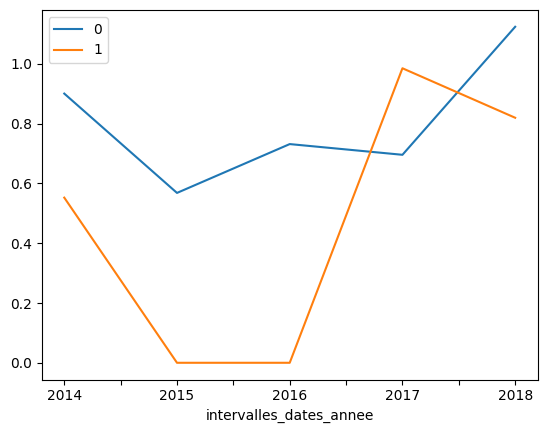

CODTYPE_PROJET_CRI


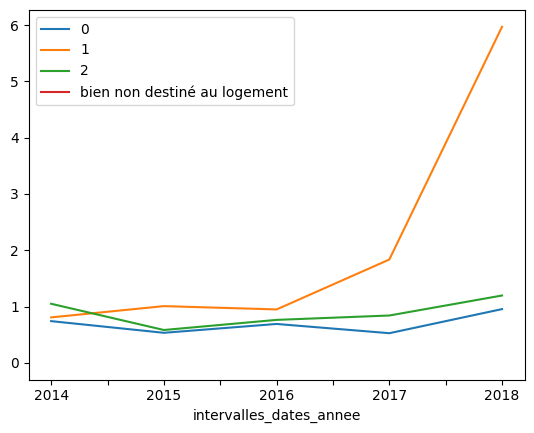

COD_ETA_BIEN_CRI


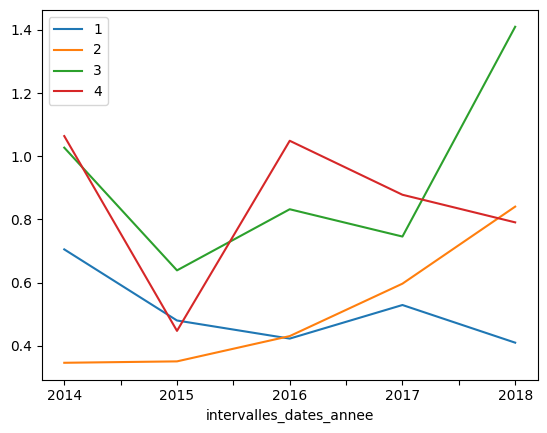

COD_USAGE_BIEN_CRI


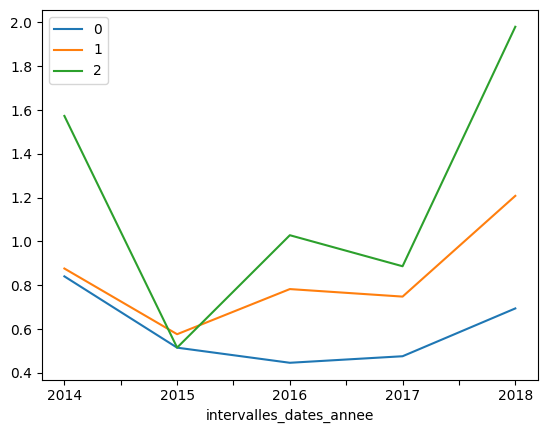

TOP_ETR_BRP


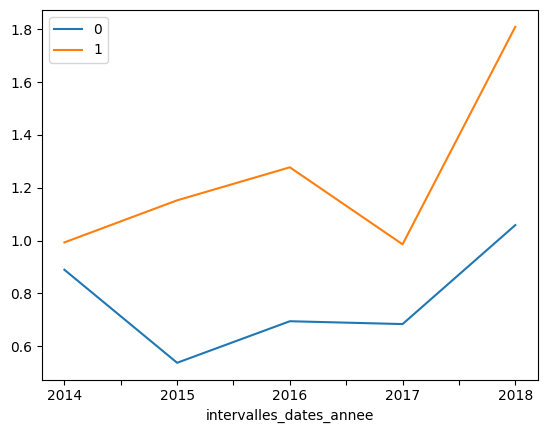

TOP_PRET_RELAIS_BRP


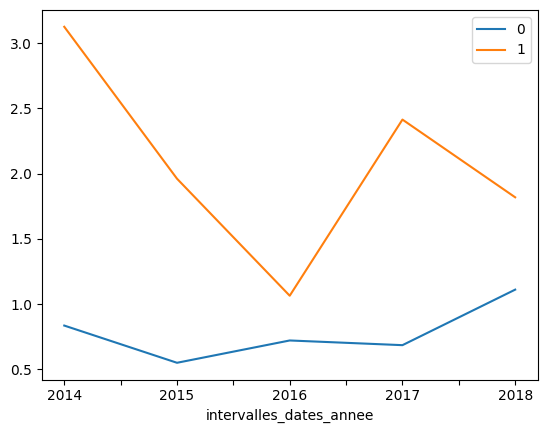

TOP_SURFINANCEMENT_BRP


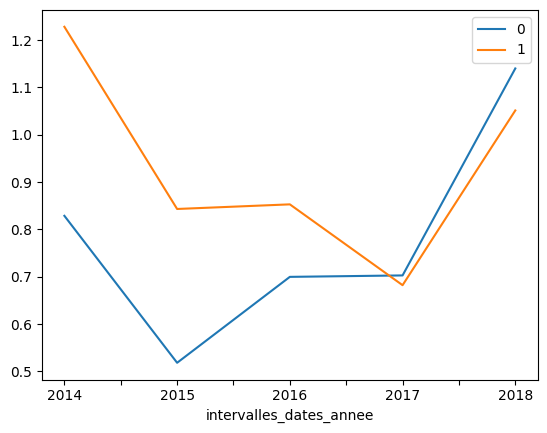

top_exist_conso_revo_BRP


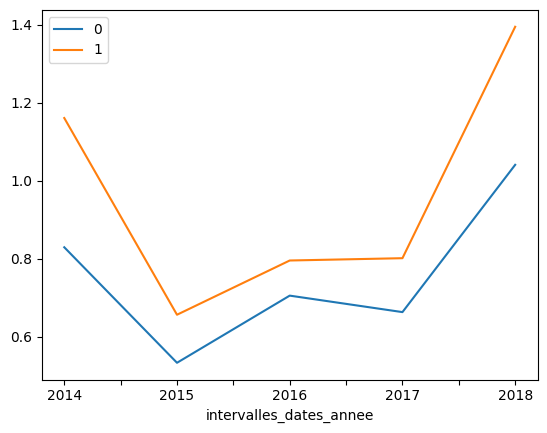

IRPAR_USAGE_V12_MAX


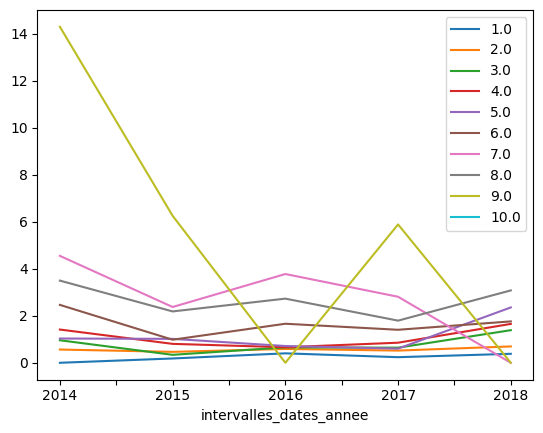

TOP_ASC_DESC_BRP


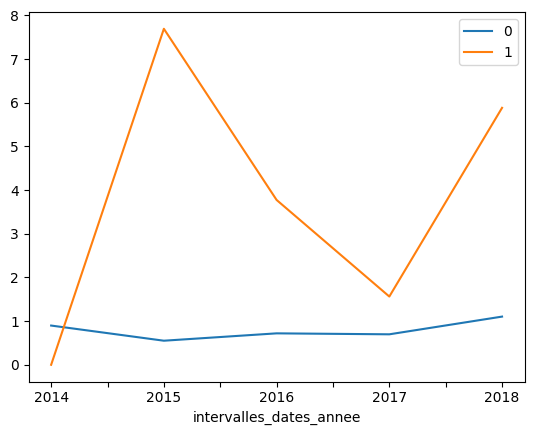

QUA_INT_1_BRP


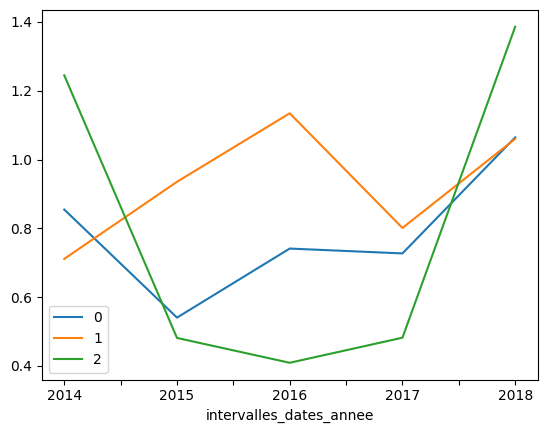

QUA_INT_MAX_BRP


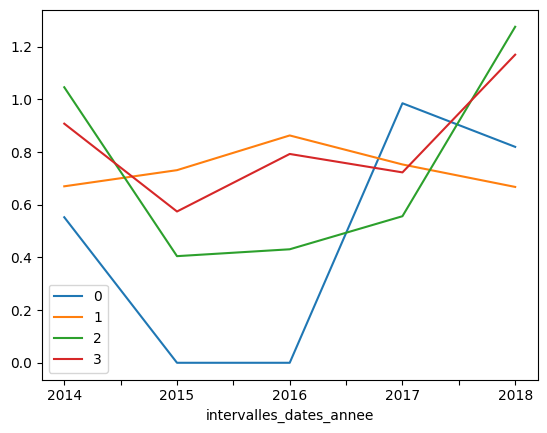

CODTYP_CRT_TRAVAIL_CRI


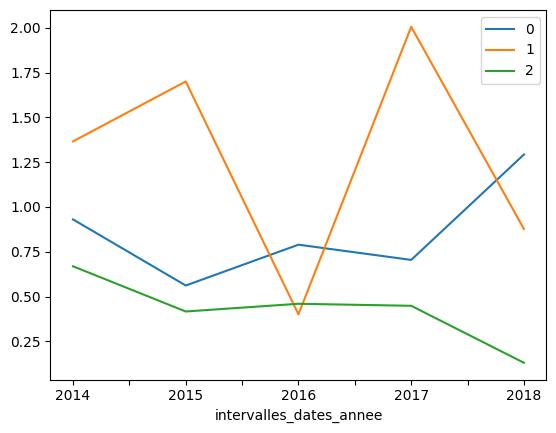

COD_SITU_LOGT_CRI


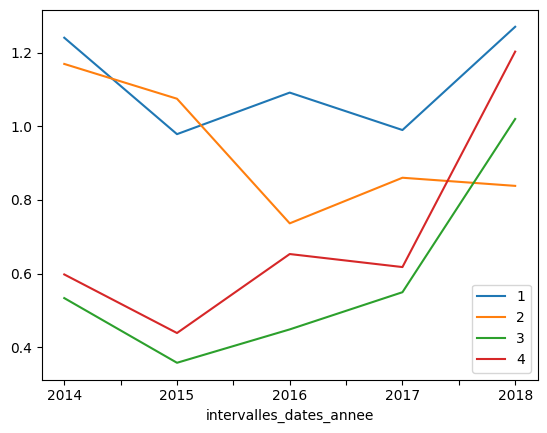

COD_SIT_FAM_EMPRUNTEUR_CRI


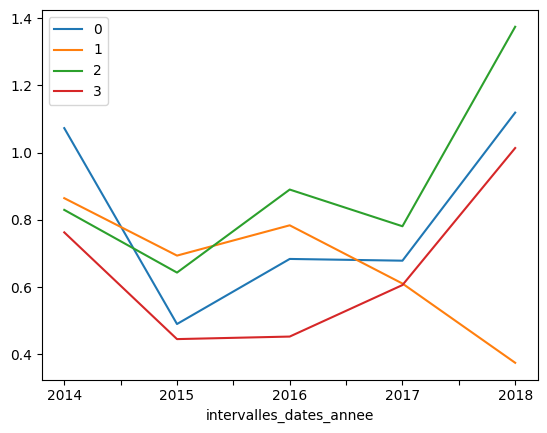

COD_TYPE_MARCHE_CRI


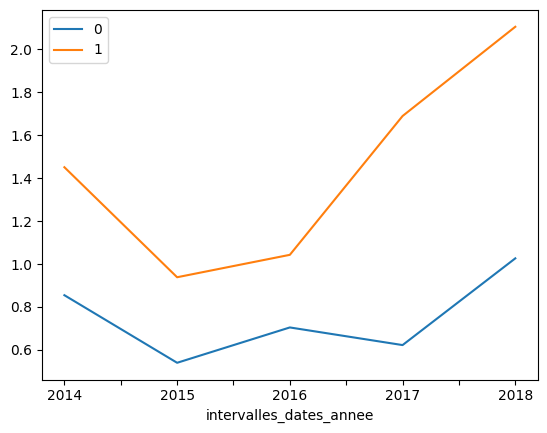

IND_INCIDENT_BDF_CRI


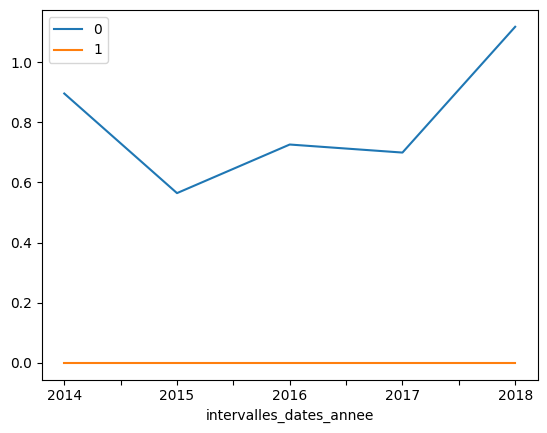

IND_PRIMO_ACCEDT_CRI


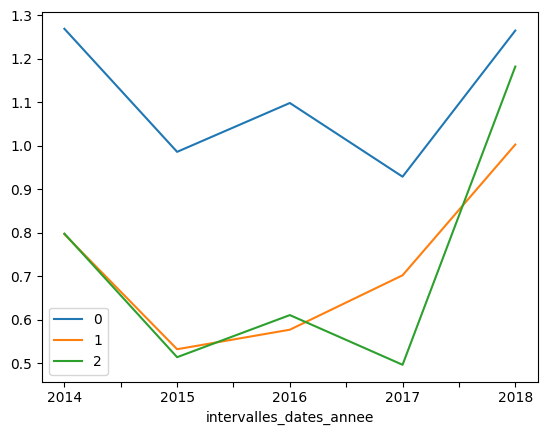

TOP_BIEN_FR_CRI


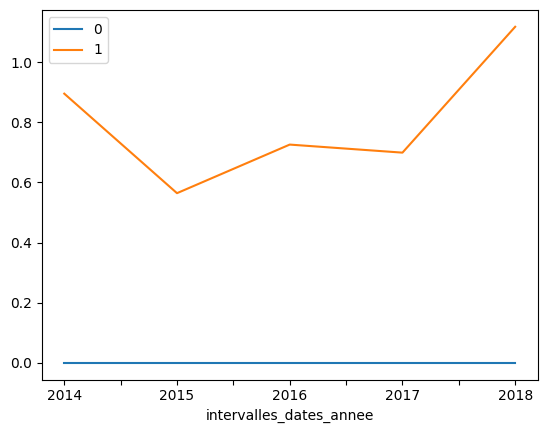

TOP_NAT_FR_CRI


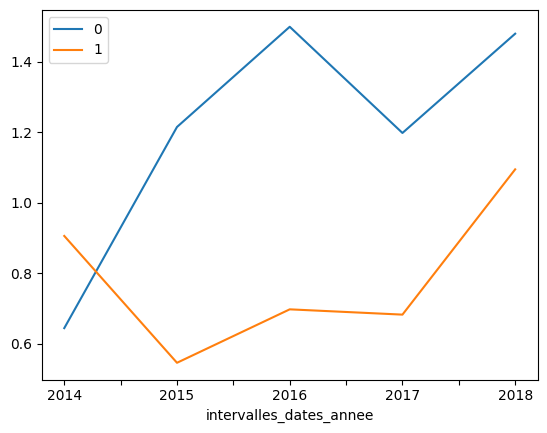

CSP_RGP_BRP


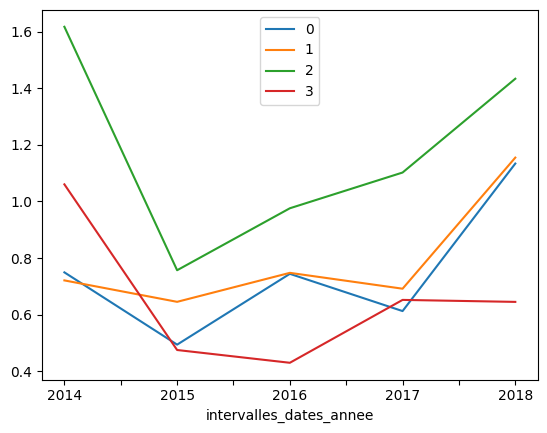

top_locatif


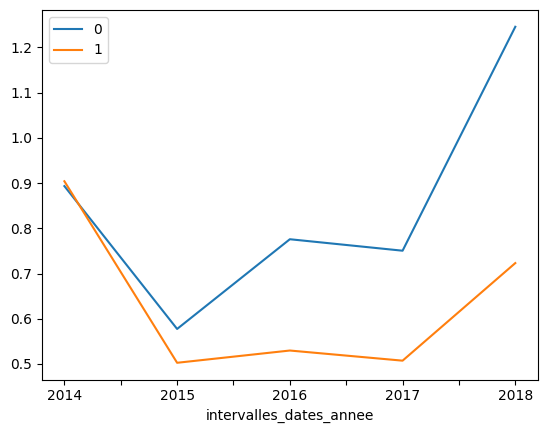

top_pret_int_ext


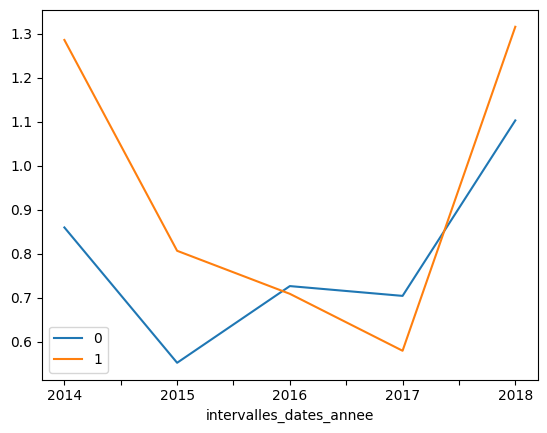

top_autre_pret_int


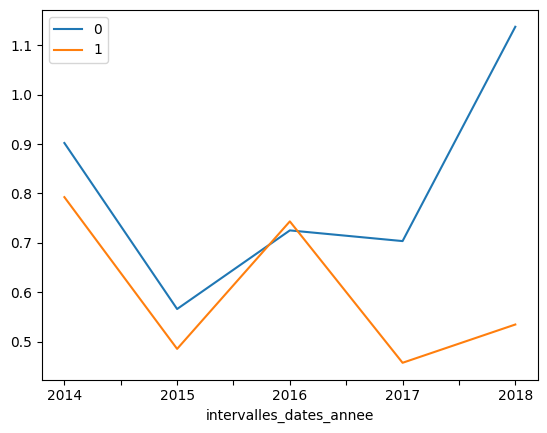

top_autre_pret_ext


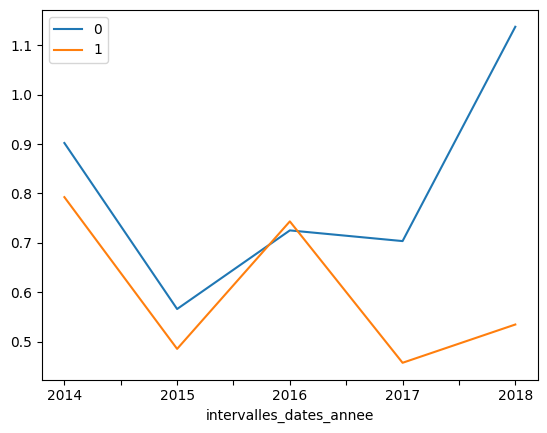

top_pers_seule


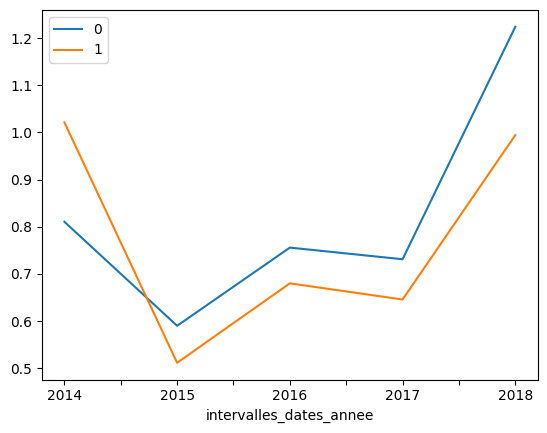

g_MNT_TOT_ASSURANCE_CRI


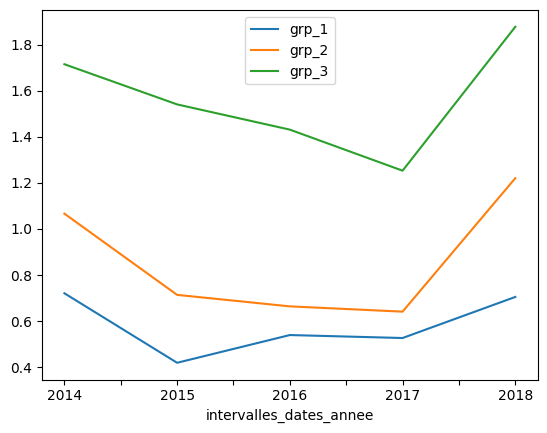

g_COUT_RACHAT_BRP


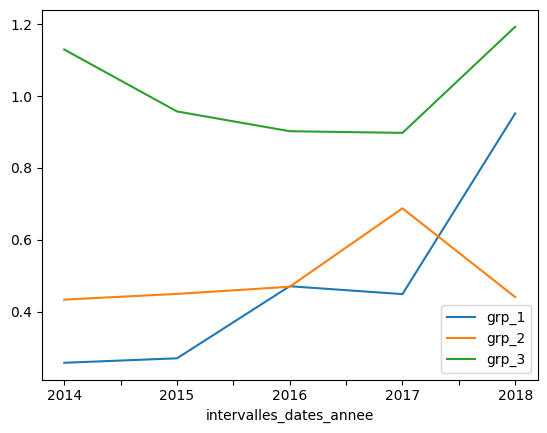

g_SUM_PATR_IMMO_BRP


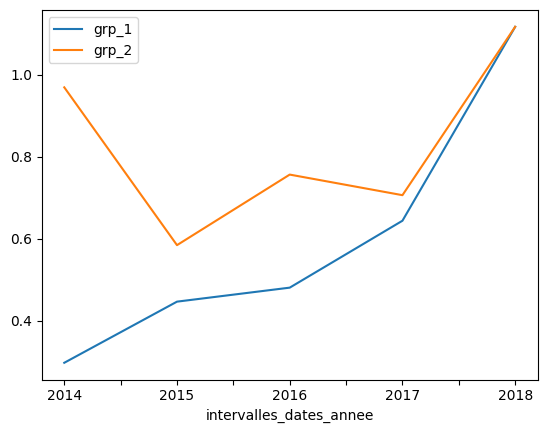

g_quotite


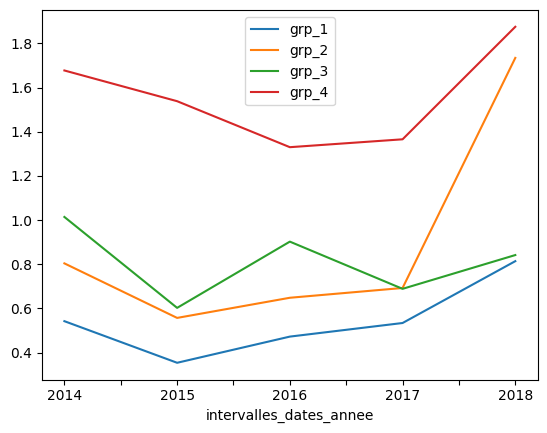

g_PCT_TEG_TAEG_CRI


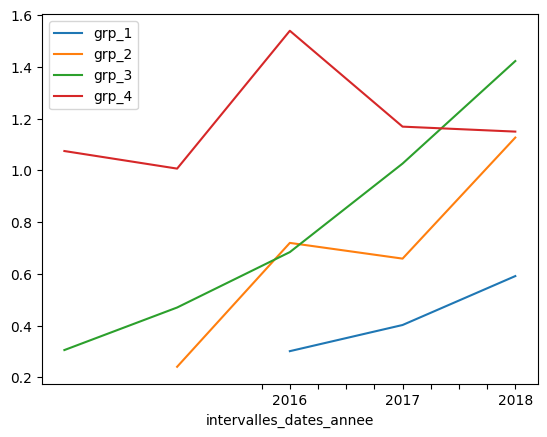

g_MOY_ANC_PROF_BRP


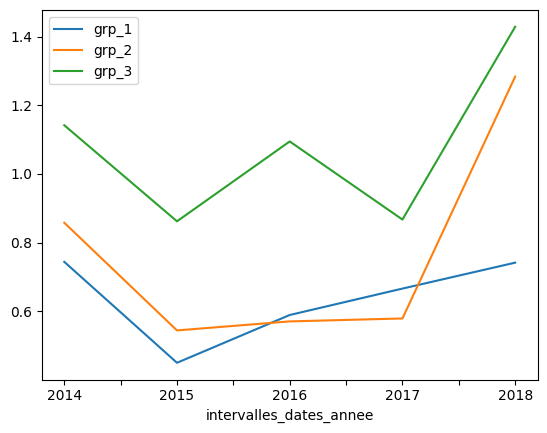

g_nb_pret


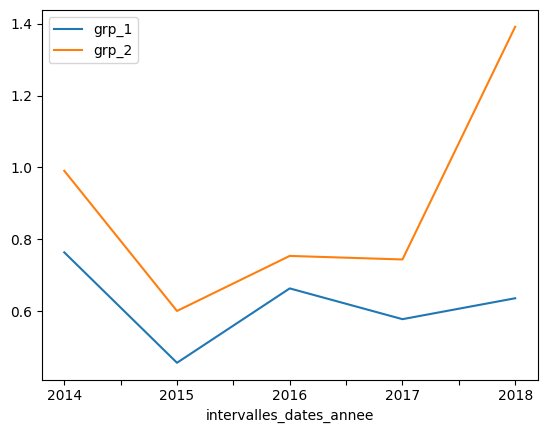

g_MNT_COUT_TOT_CREDIT_CRI


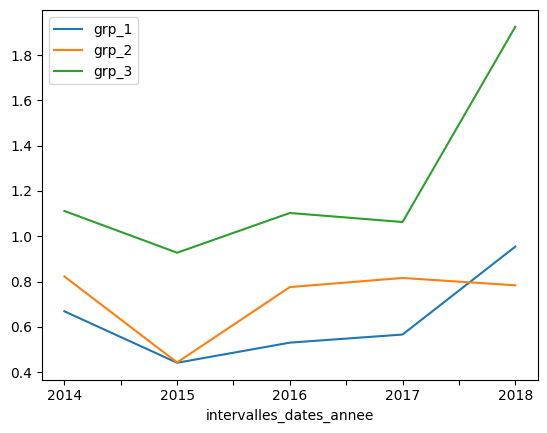

g_BEST_APPORT_TX_BRP


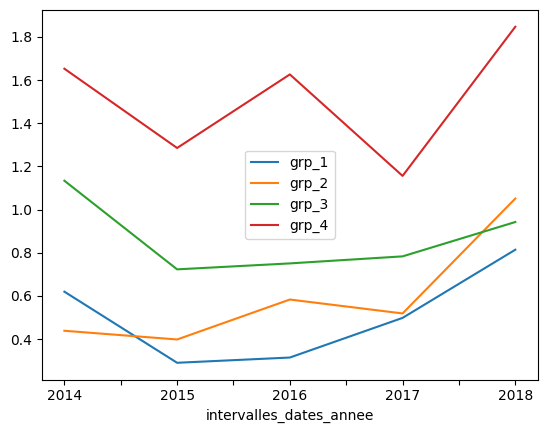

g_COUT_PROJET_HF_AT_BRP


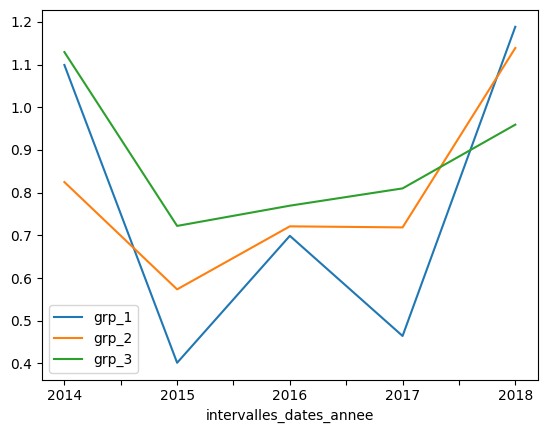

g_SUM_MTENCBIE_IMMO_BRP


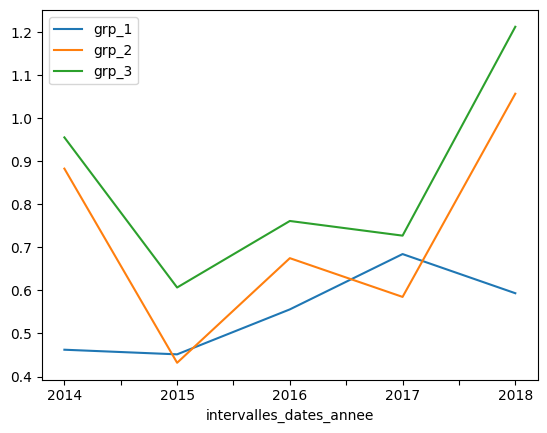

g_MNT_PRET_CRI


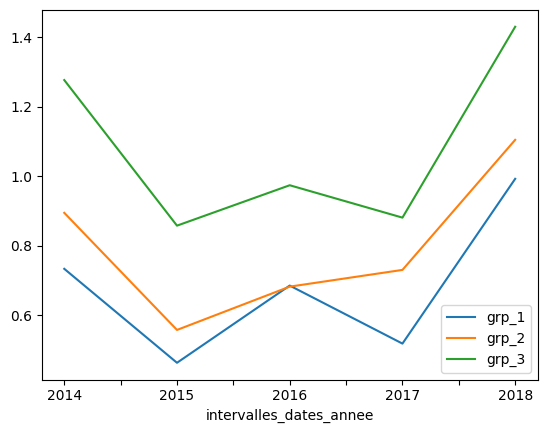

g_AGE_INT_MAX_BRP


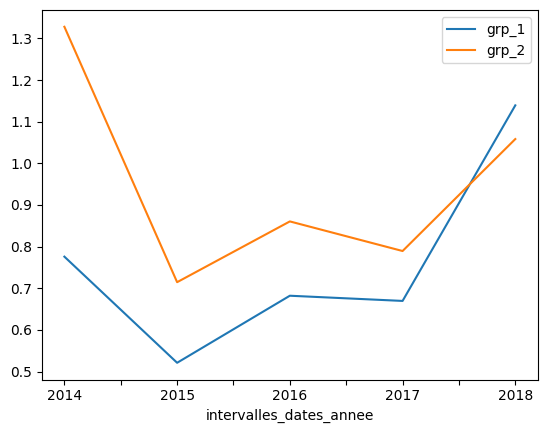

In [63]:
stability_according_to_the_target(stability_data.drop(['date_debloc_avec_crd'], axis=1), 'intervalles_dates_annee', 'intervalles_dates_semestre')

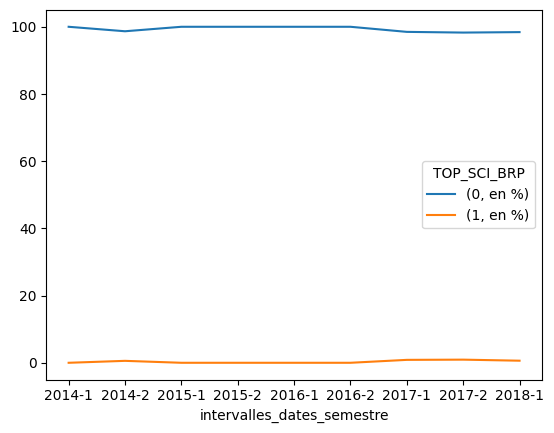

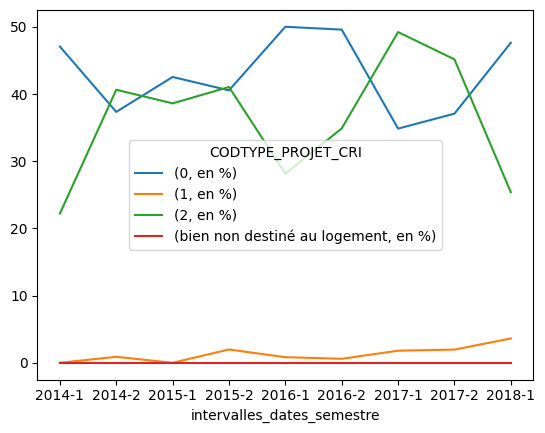

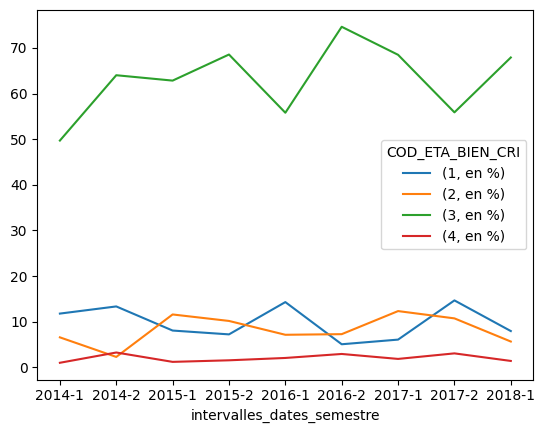

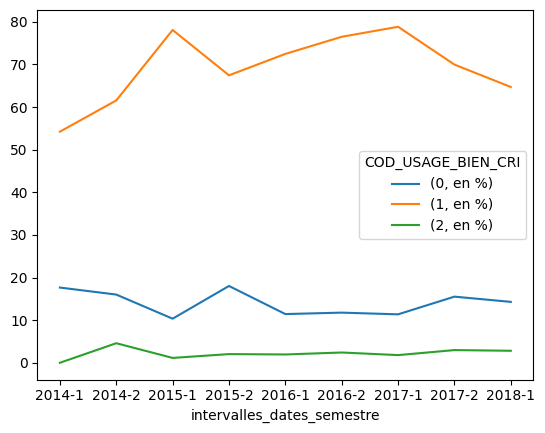

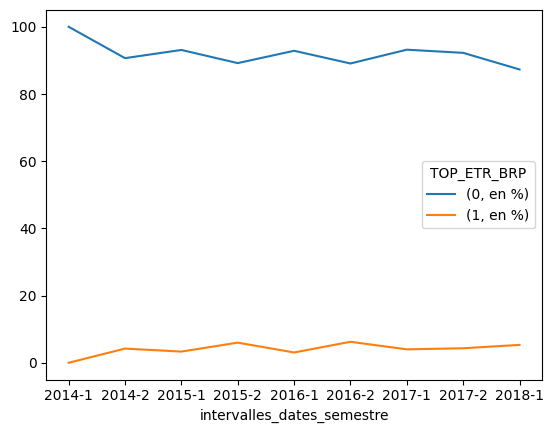

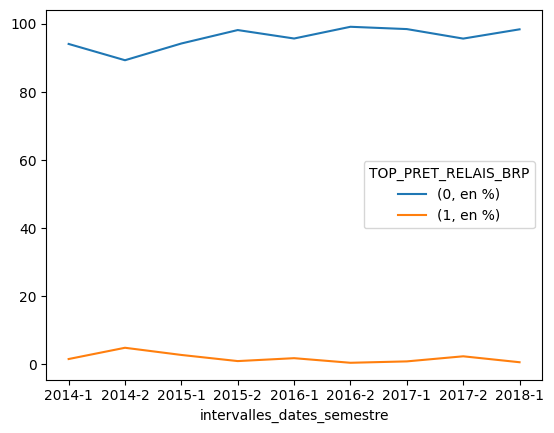

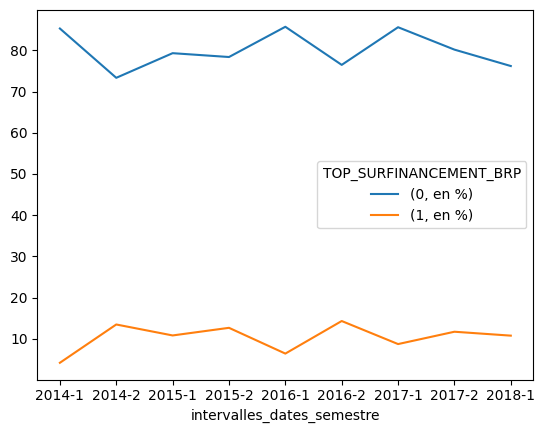

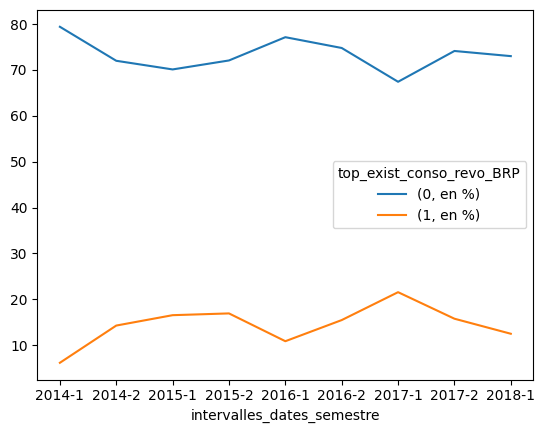

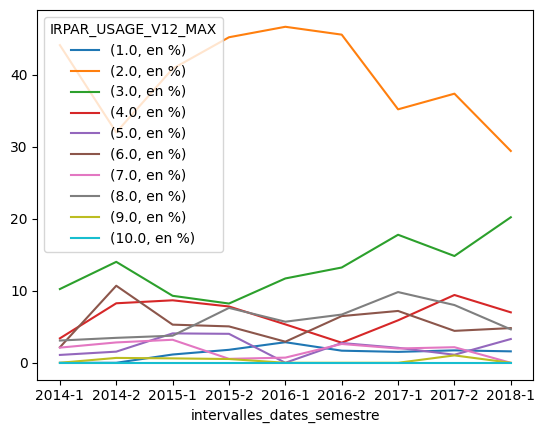

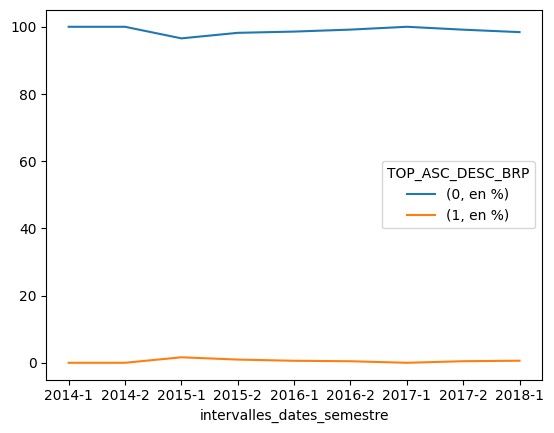

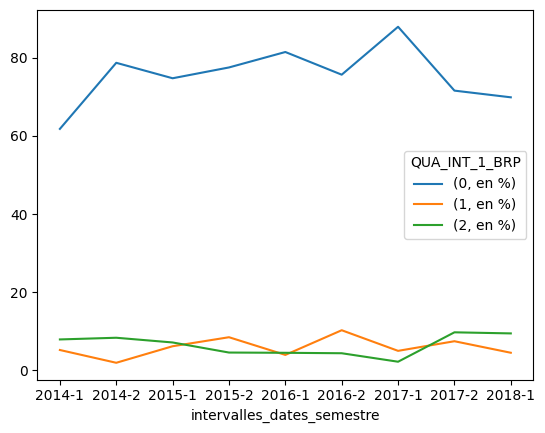

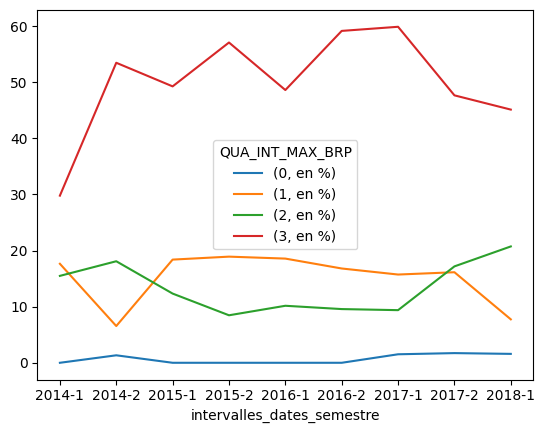

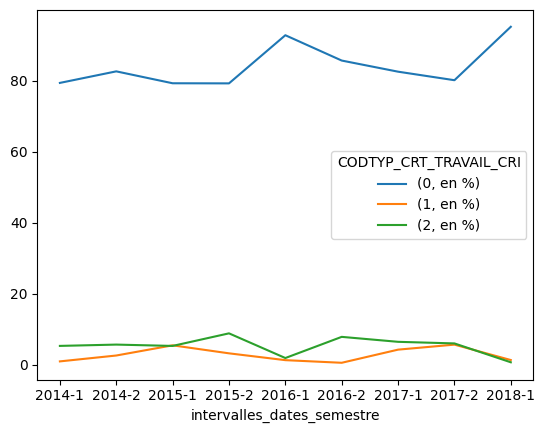

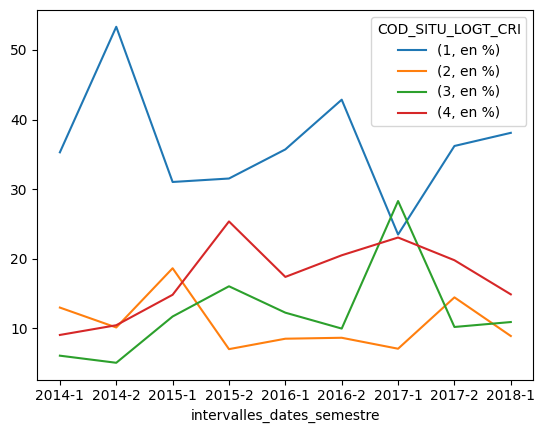

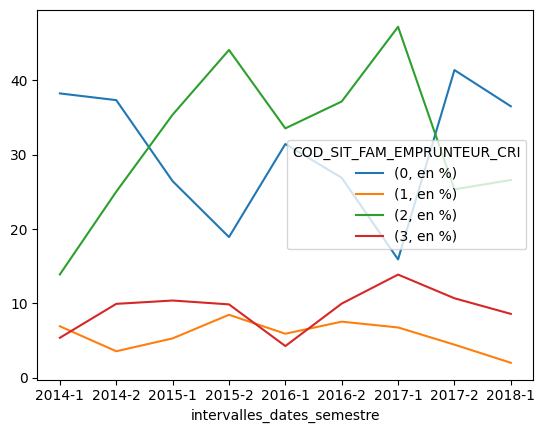

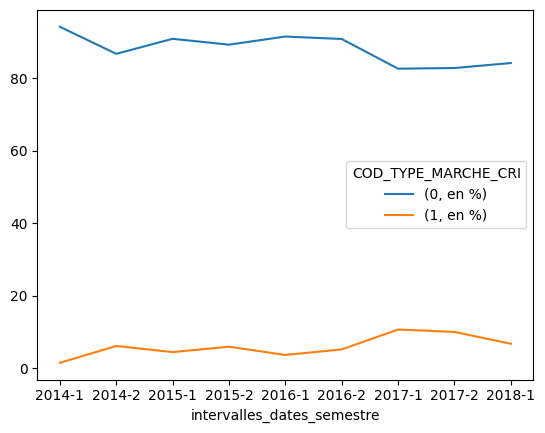

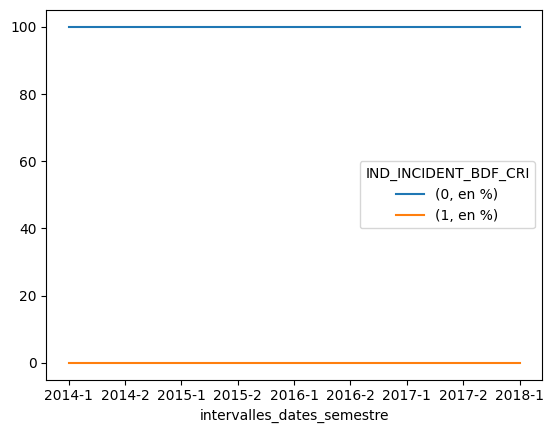

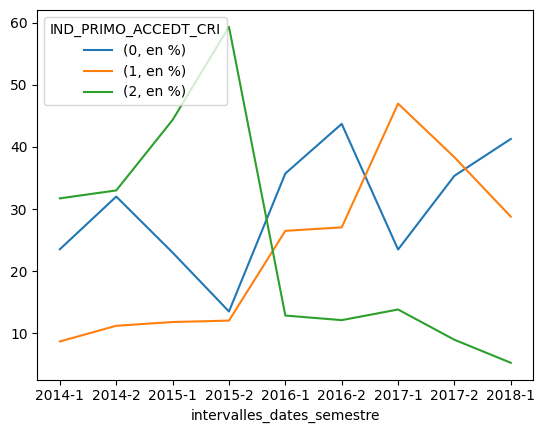

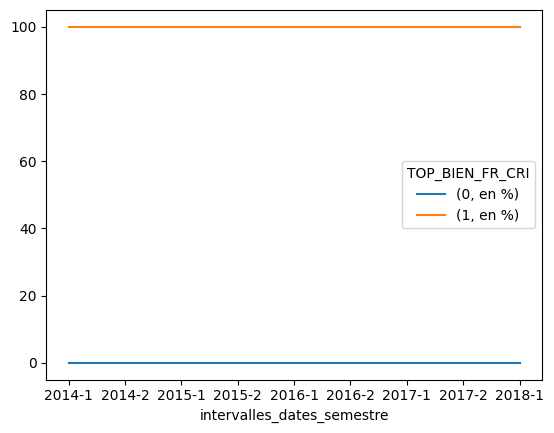

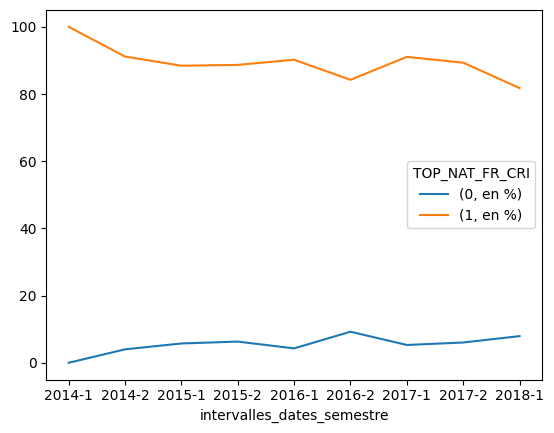

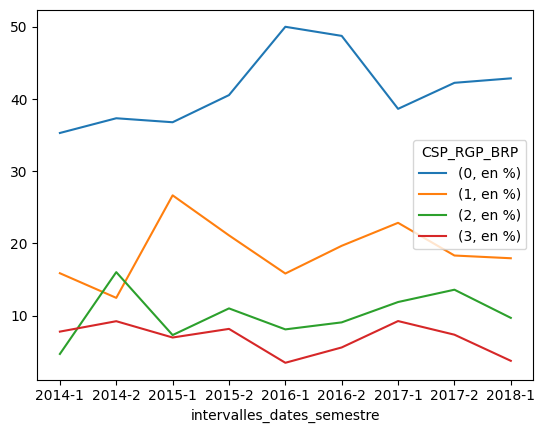

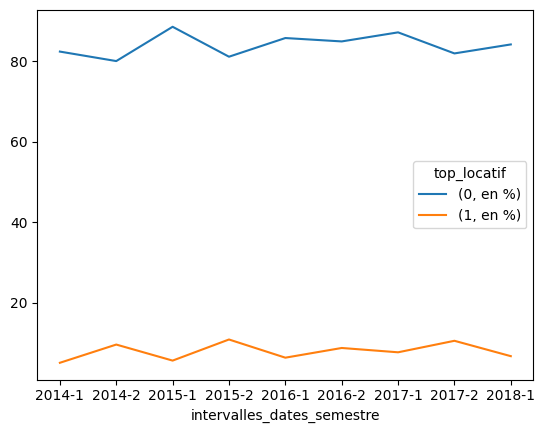

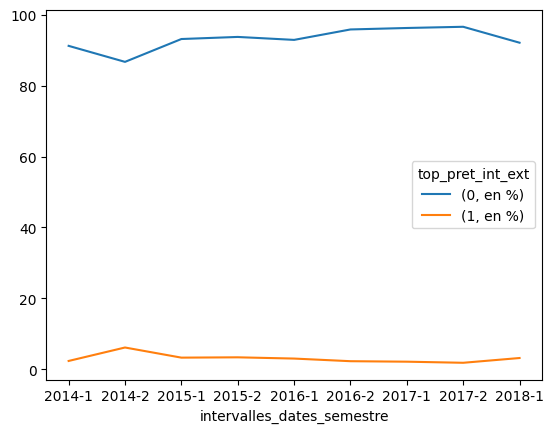

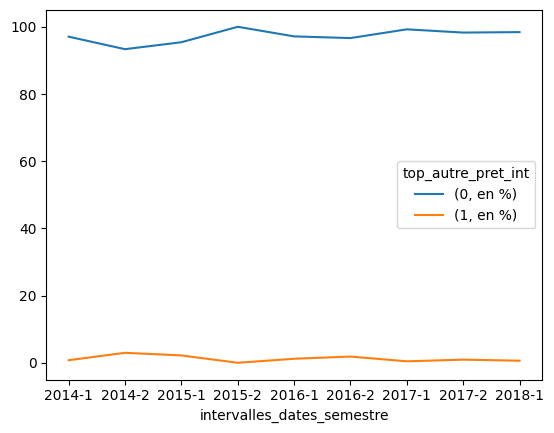

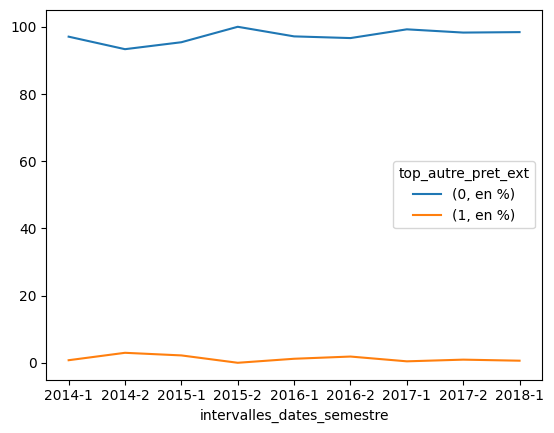

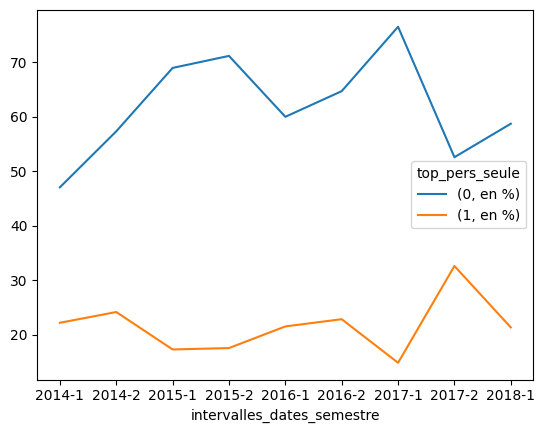

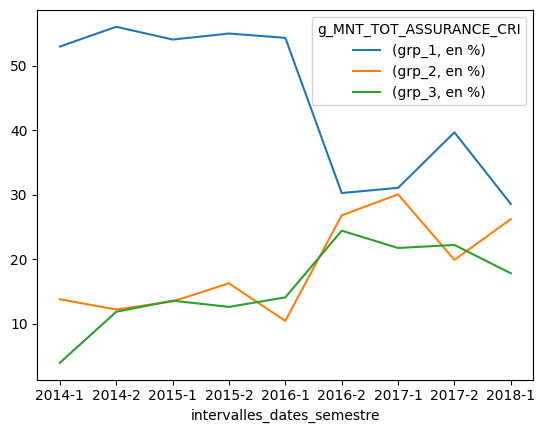

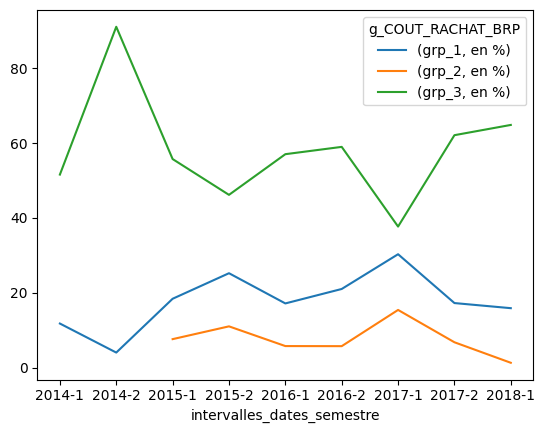

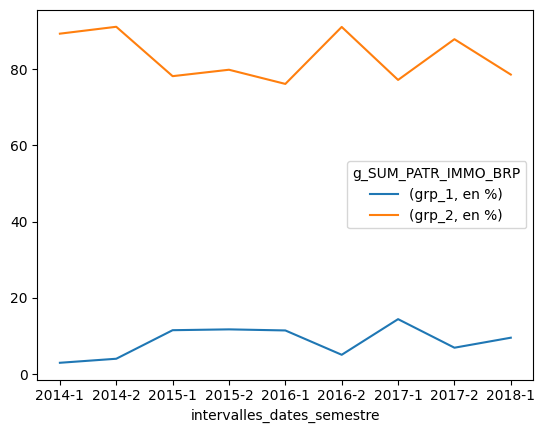

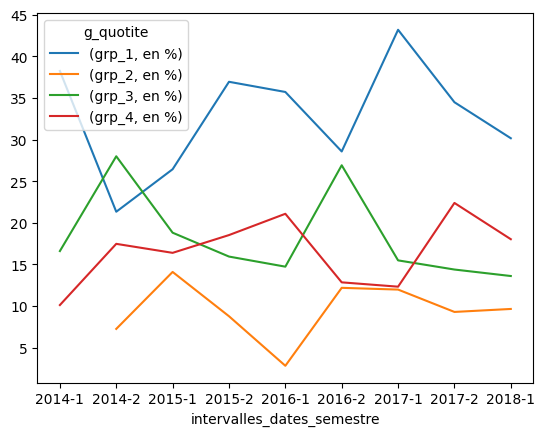

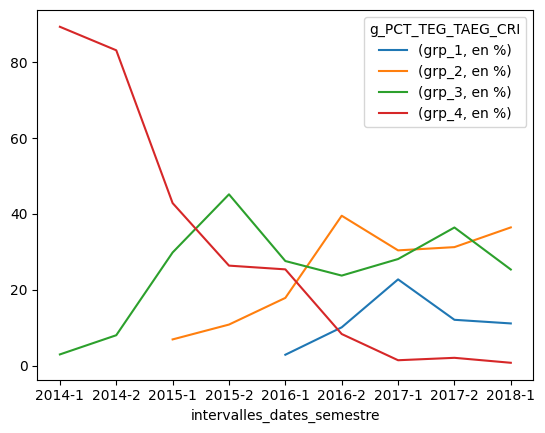

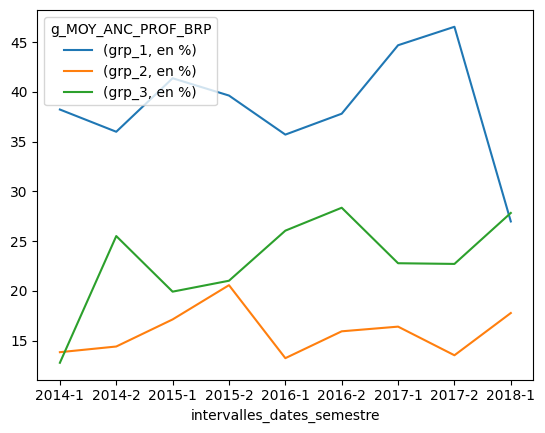

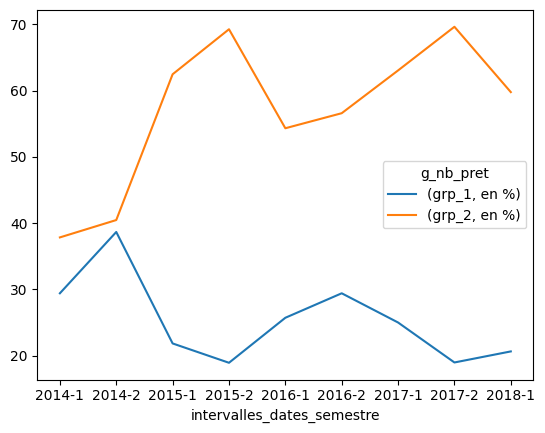

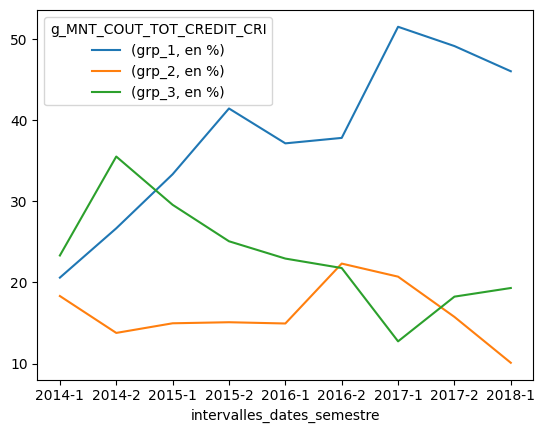

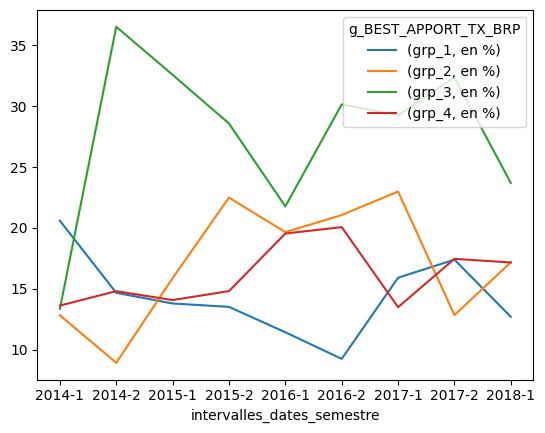

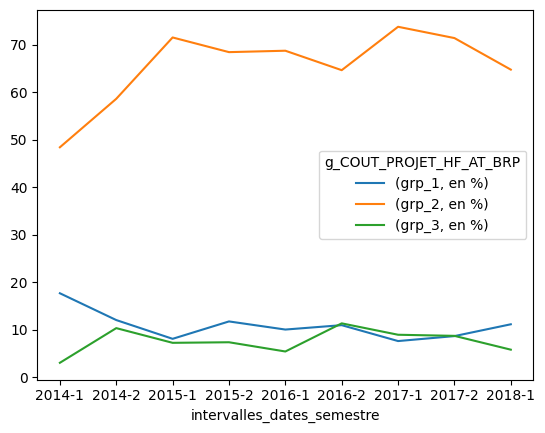

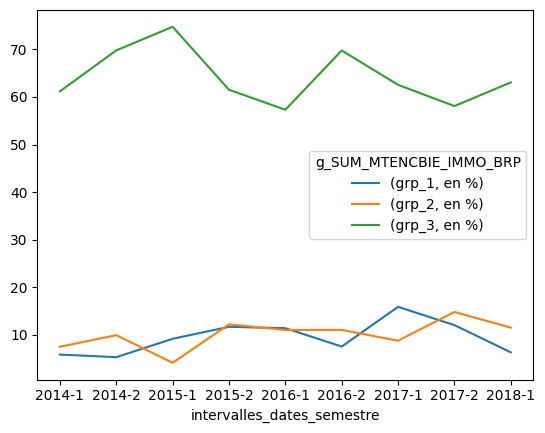

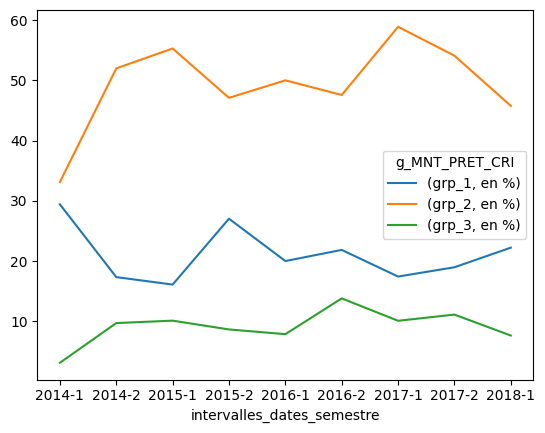

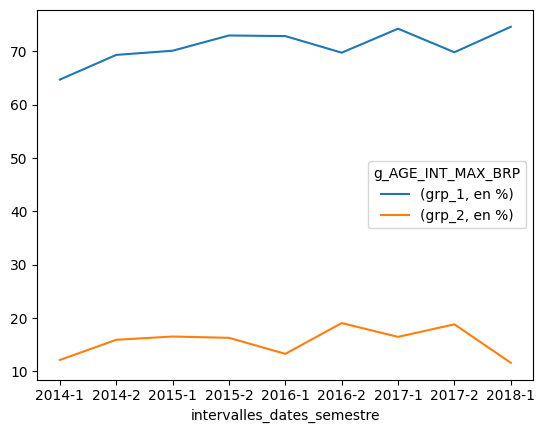

In [64]:
stability_by_repartition_of_defaults(stability_data.drop(['date_debloc_avec_crd'], axis=1), 'intervalles_dates_semestre', 'intervalles_dates_annee')

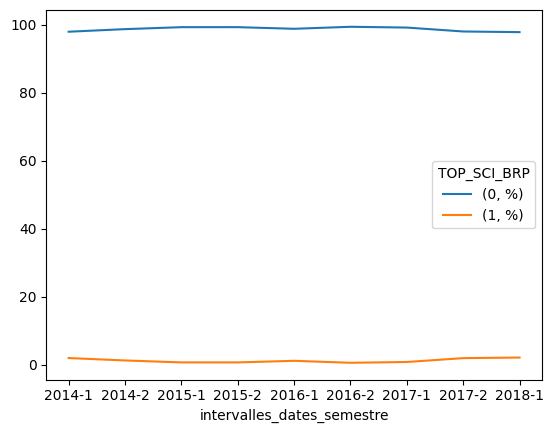

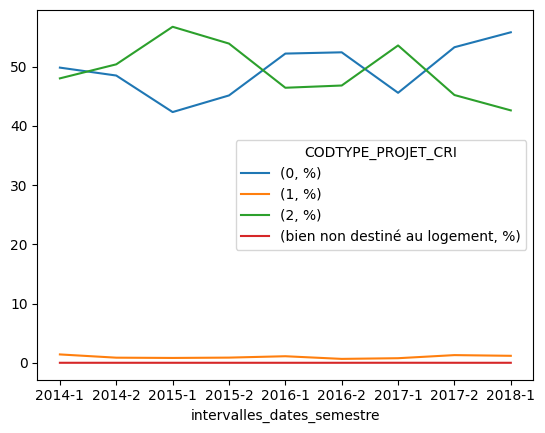

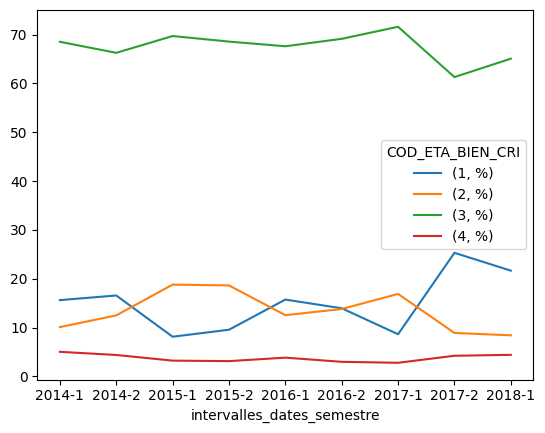

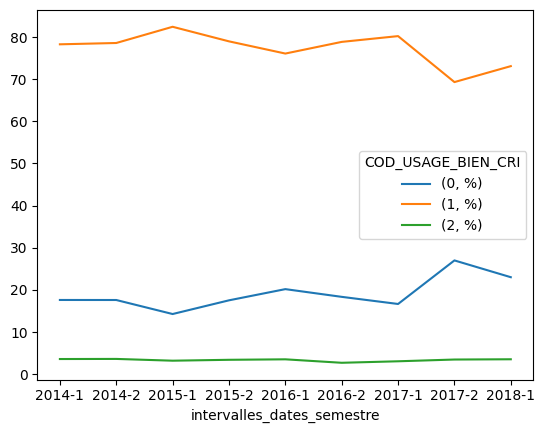

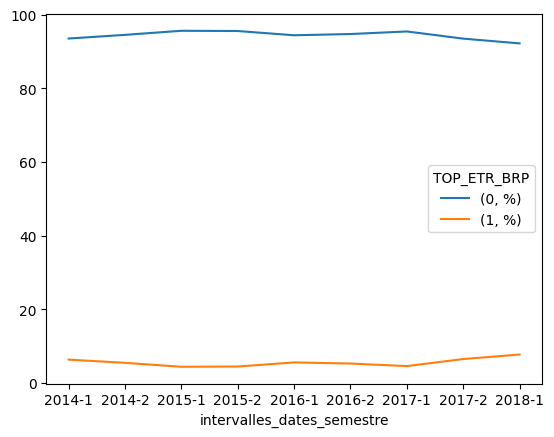

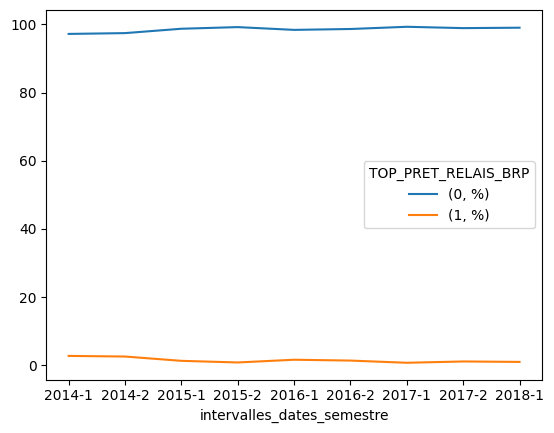

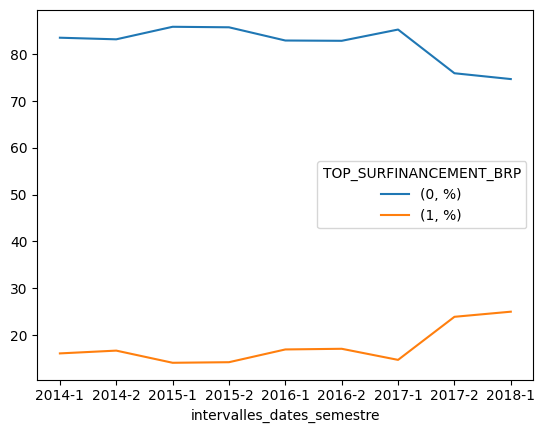

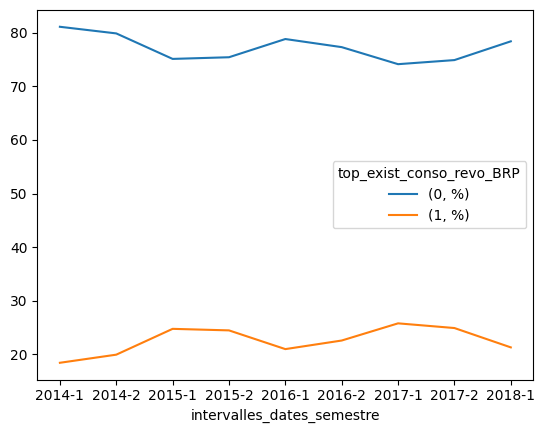

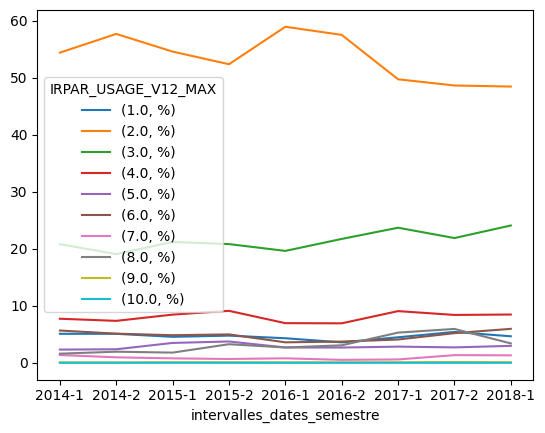

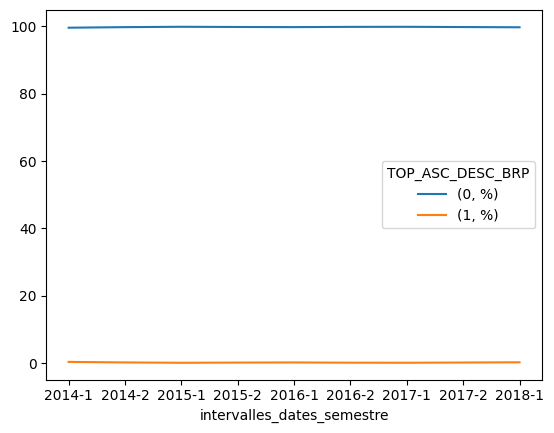

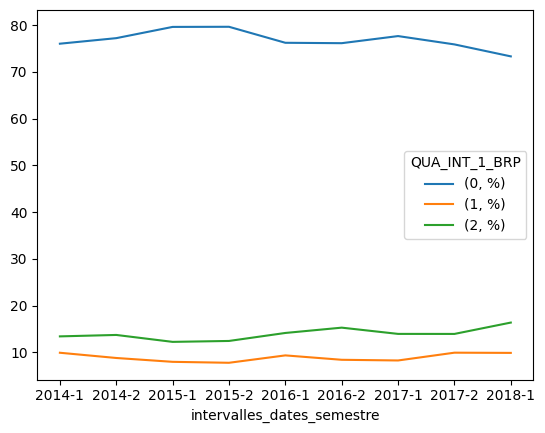

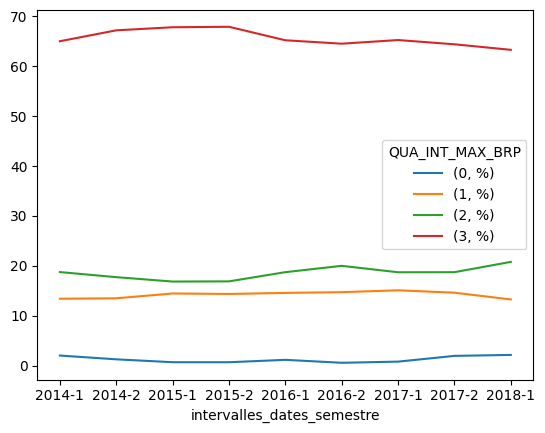

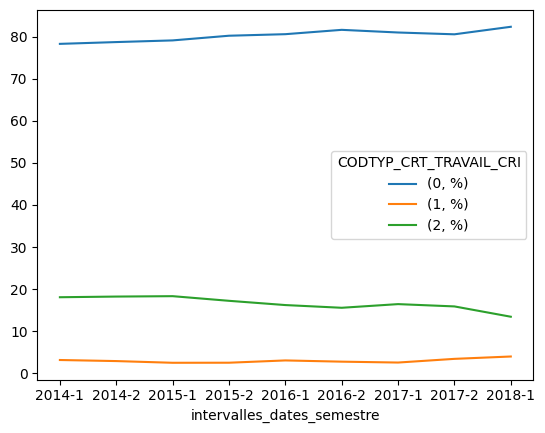

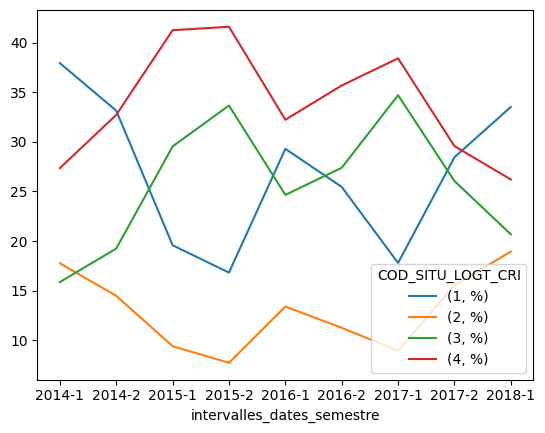

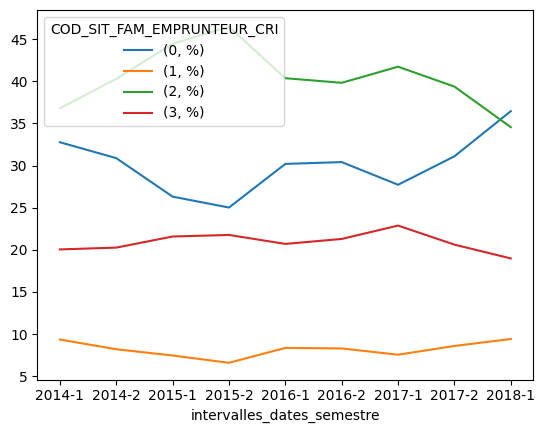

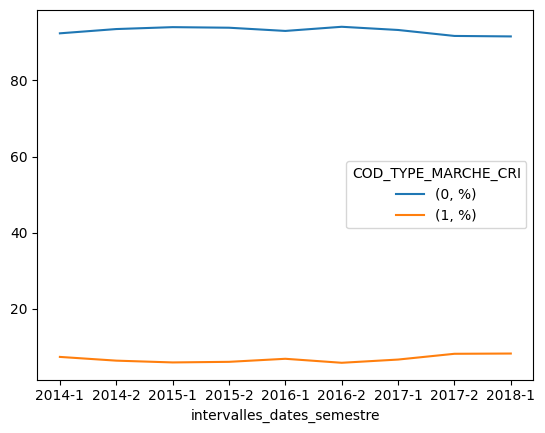

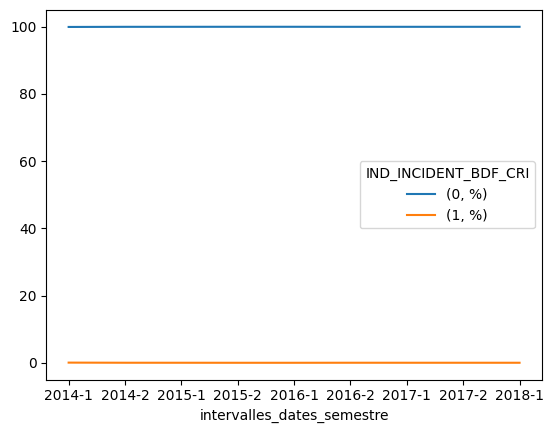

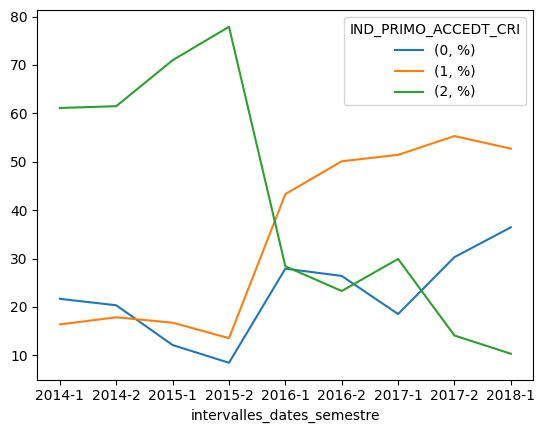

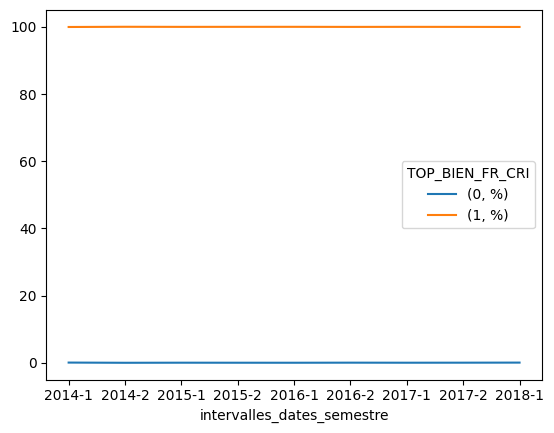

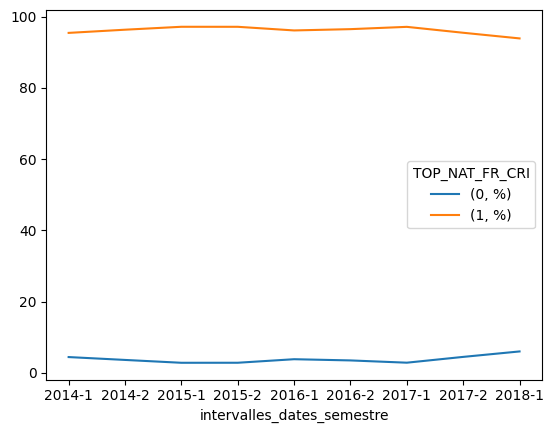

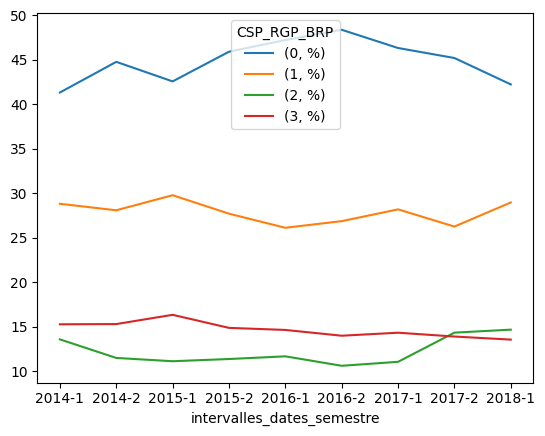

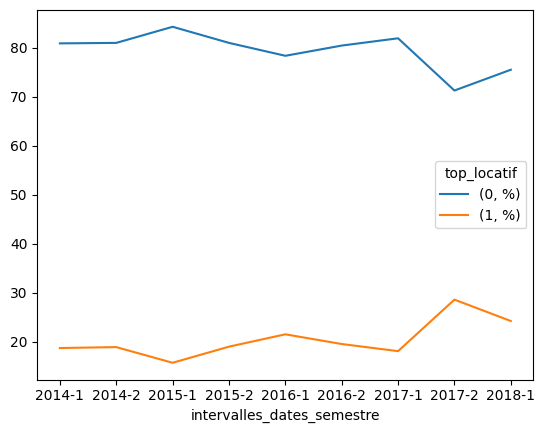

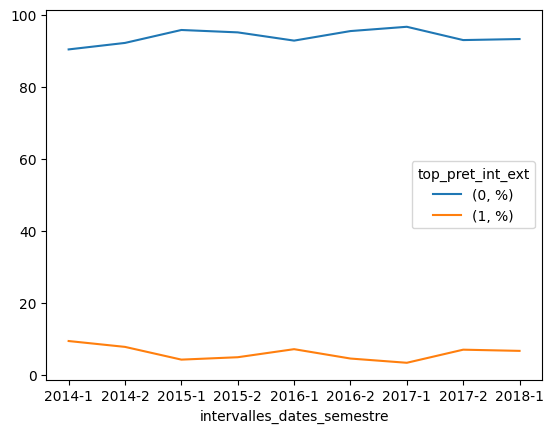

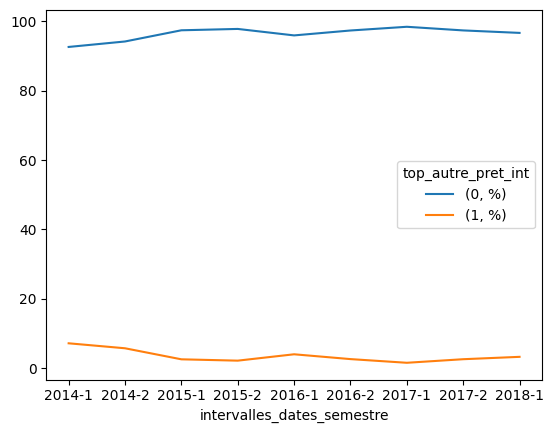

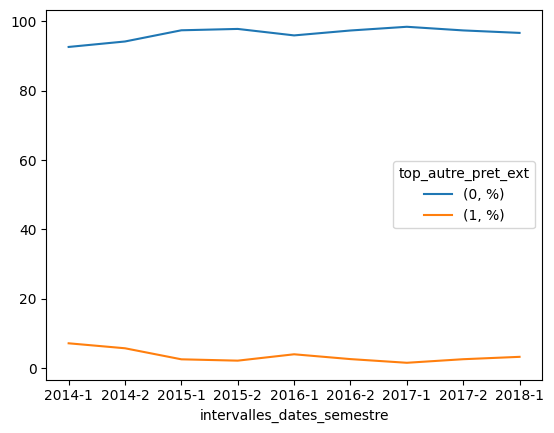

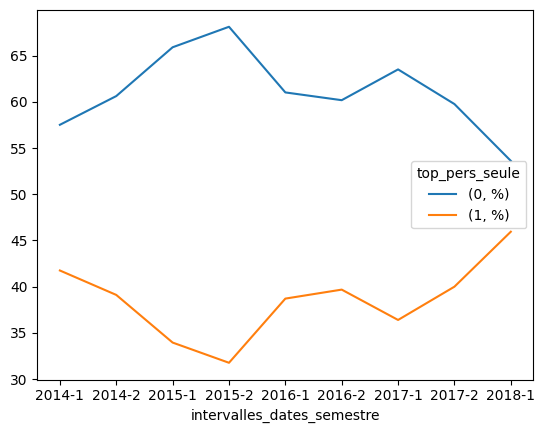

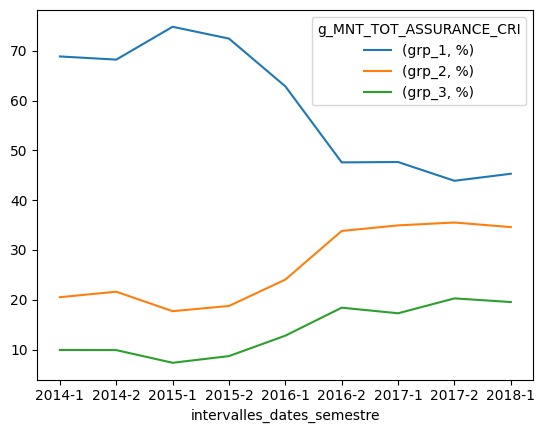

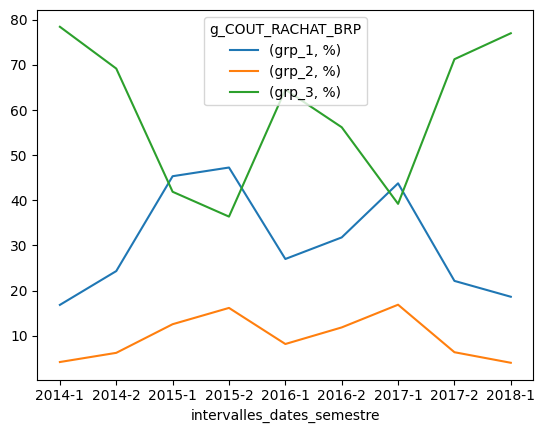

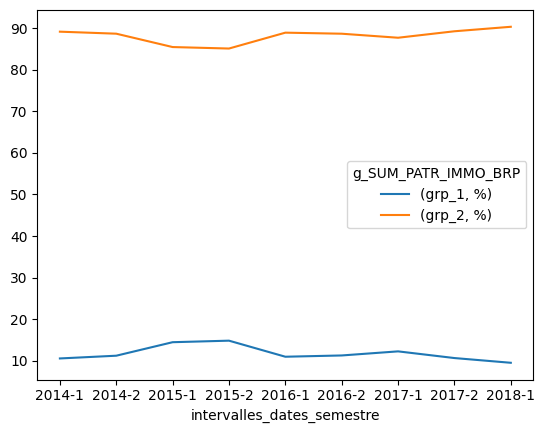

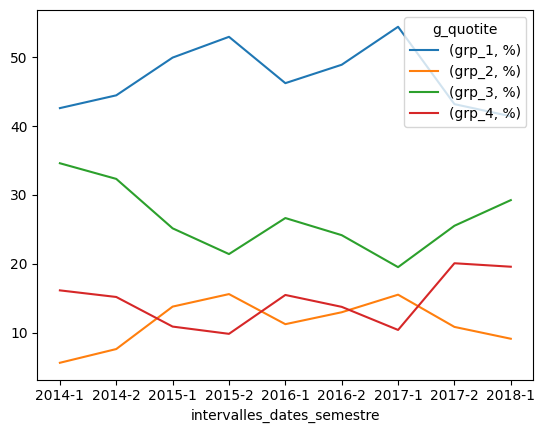

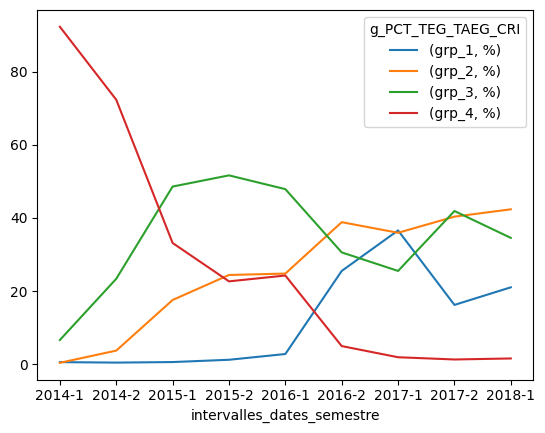

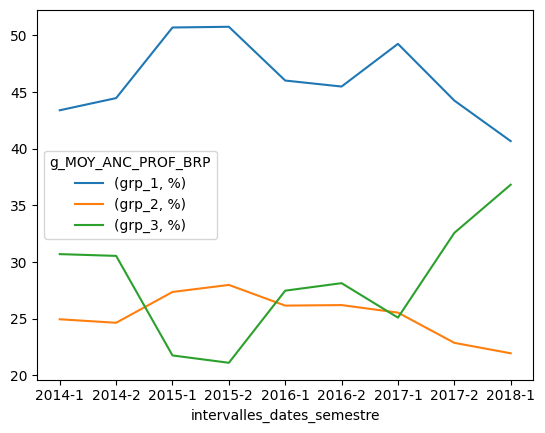

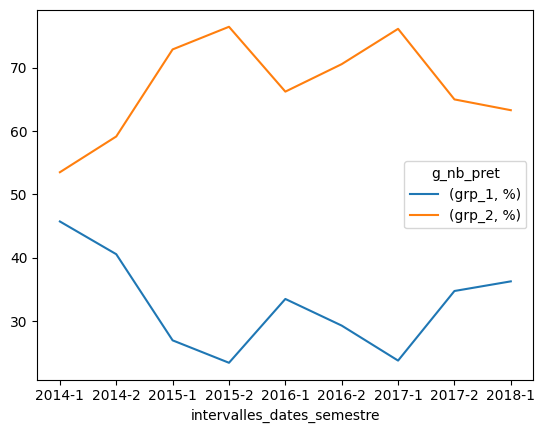

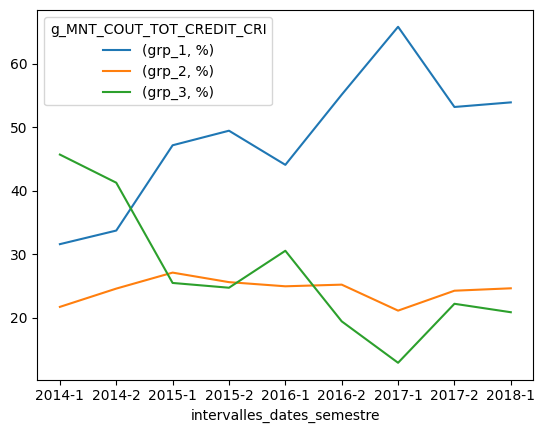

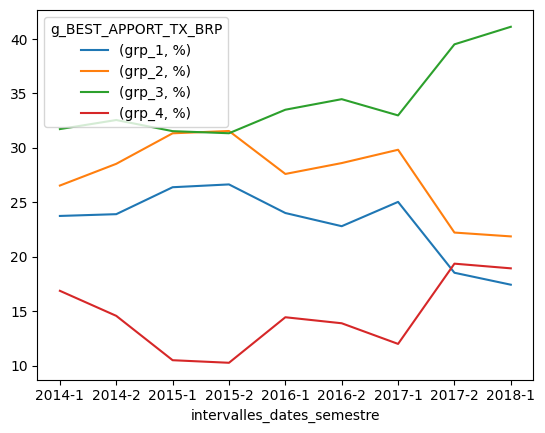

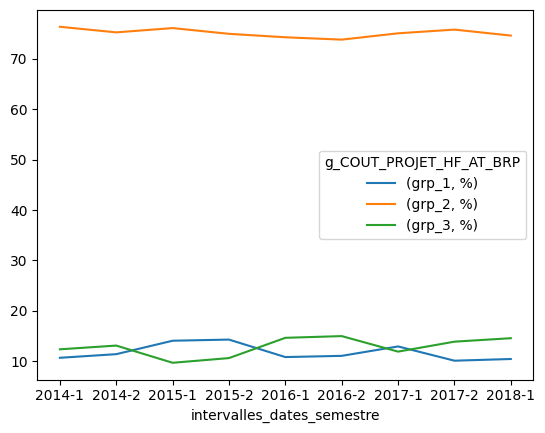

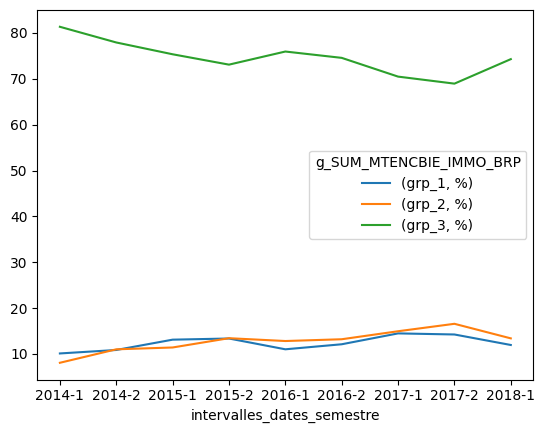

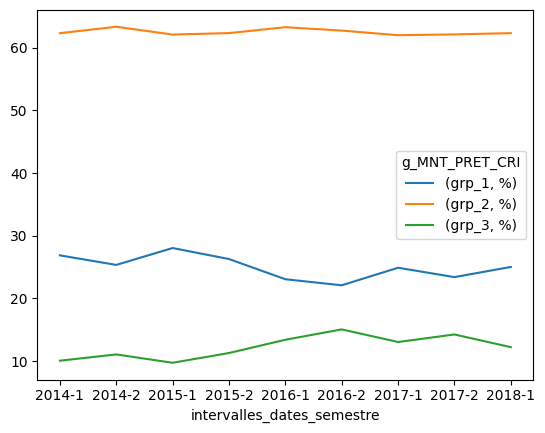

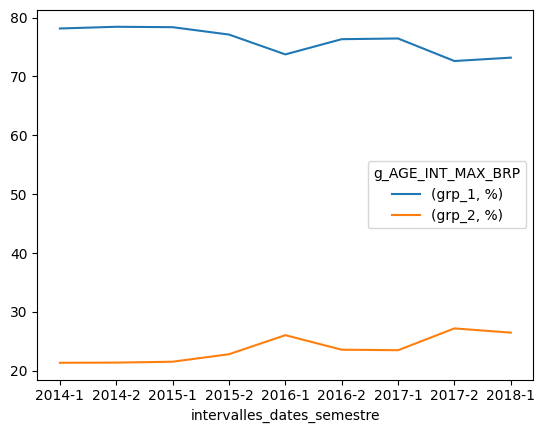

In [65]:
stability_by_repartition_of_modalities(stability_data.drop(['date_debloc_avec_crd'], axis=1), 'intervalles_dates_semestre', 'intervalles_dates_annee')

# Modélisation classique: régression logistique

In [66]:
X_train_dummies = pd.get_dummies(X_train_final, drop_first = True)

x_train, x_test, y_train, y_test = train_test_split(X_train_dummies , y_train, stratify = y_train ) 

param = {'penalty' : ['elasticnet', 'none', 'l2' ] , 
'C' : [0.01, 0.1 , 1, 10] ,
 'solver' :  ['saga' ,'lbfgs '], 
 'l1_ratio' : [ 0 , 0.1 , 0.01] } 
kfold = StratifiedKFold( n_splits = 3 ) 

logit = LogisticRegression(class_weight= 'balanced', random_state = 42)
model = GridSearchCV(logit, param, cv=kfold ,scoring = 'roc_auc') 
model.fit(x_train , y_train)

model.best_params_

{'C': 0.01, 'l1_ratio': 0, 'penalty': 'none', 'solver': 'saga'}

In [67]:
# entrainer le modele sur les meilleurs params trouvés grace au grid search cv 

logit_apres_grid_search = LogisticRegression(class_weight= 'balanced', random_state = 42 , 
                                            C= 0.01, l1_ratio =  0, penalty = 'l2', solver = 'lbfgs')

logit_apres_grid_search.fit(x_train , y_train)

LogisticRegression(C=0.01, class_weight='balanced', l1_ratio=0, random_state=42)

In [68]:
y_pred_train = logit_apres_grid_search.predict_proba(x_train) 
y_pred_train = pd.DataFrame(y_pred_train).iloc[: , 1]

score_auc_train = sklearn.metrics.roc_auc_score(y_train, y_pred_train)
score_auc_train


0.783508869887253

In [69]:
y_pred_test = logit_apres_grid_search.predict_proba(x_test) 
y_pred_test = pd.DataFrame(y_pred_test).iloc[: , 1]

score_auc_test = sklearn.metrics.roc_auc_score(y_test, y_pred_test)
score_auc_test

0.7276987295046786

In [70]:
# pd.DataFrame(abs( logit_apres_grid_search.coef_.T ), index = X_train_discretise.columns, columns= ['coef']).sort_values(by = 'coef', ascending = False)


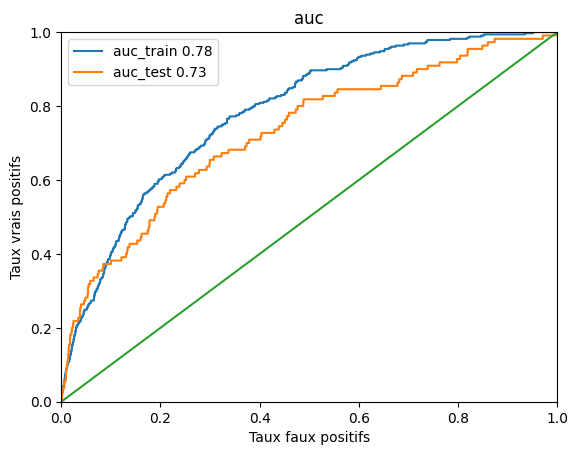

In [72]:
from sklearn.metrics import roc_curve 
import matplotlib.pyplot as plt 

fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train , pos_label = 1 )
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test , pos_label = 1 )

plt.plot(fpr_train, tpr_train, label = f'auc_train {score_auc_train.round(2)}') 
plt.plot(fpr_test, tpr_test, label = f'auc_test {score_auc_test.round(2)}') 
plt.plot([0,1], [0,1])
plt.title('auc')
plt.xlabel('Taux faux positifs')
plt.ylabel('Taux vrais positifs')
plt.xlim([0,1])
plt.ylim([0,1])




plt.legend()